In [ ]:
alpha, beta = 0., 0.
r_loop = 90.
k_grav = 0.75
rho = 1.225
h_ref = 80.
shear = 0.2
g = 9.81
eta_t2g = 0.66
v_w_refs = np.linspace(3., 20., 50)
temp_kite = copy.deepcopy(simple_config)
temp_kite['l_tether'] = 300.
baseline_result = P(temp_kite, alpha, beta, r_loop, h_ref, shear, rho, g, v_w_refs, eta_t2g, k_grav)


keys_c = ['C_TD','C_theta_e','C_shear','C_turn','C_eta','C_v_k', 'C_Tmax', 'C_pump']
# pp(result)

filters = [r['C_all']>=-0. for r in all_results_shear02]

plt.figure(figsize=(8,5))
plt.title('r_loop')
for l_t, results, f in zip(l_tethers, all_results_shear02, filters):
  plt.plot(v_w_refs[f], results['r_loop'][f], label=l_t)
plt.legend()

plt.figure(figsize=(8,5))
plt.title('k_grav')
for l_t, results, f in zip(l_tethers, all_results_shear02, filters):
  plt.plot(v_w_refs[f], results['k_grav'][f], label=l_t)
plt.legend()

plt.figure(figsize=(8,5))
plt.title('v_kL')
for l_t, results, f in zip(l_tethers, all_results_shear02, filters):
  plt.plot(v_w_refs[f], results['v_kL'][f], label=l_t)
plt.legend()

plt.figure(figsize=(8,5))
plt.title('P_pump')
for l_t, results, f in zip(l_tethers, all_results_shear02, filters):
  plt.plot(v_w_refs[f], results['P_pump'][f], label=l_t)
plt.legend()


plt.figure(figsize=(8,5))
plt.title('Power vs Wind Speed', size=16)
plt.xlabel('$v_{w_\mathrm{ref}}$ [m/s]', size=16)
plt.ylabel('Power [kW]', size=14)
plt.plot(v_w_refs, all_results_shear02[0]['p0']/1000.,
         label='$P_0$', color='k')
plt.plot(
    v_w_refs,
    (baseline_result['p']/1000.),
    label='$P_\mathrm{losses} @ l_t$ = 300m',
    color='b')
plt.plot([4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0],
         [-98.0, -23.0, 68.0, 164.0, 271.0, 394.0, 511.0, 628.0, 726.0, 829.0, 904.0, 962.0, 987.0, 999.0, 1003.0, 1004.0, 1005.0, 1006.0],
         label='Numerical @ $l_t$ = 300', color='green', linestyle='--', linewidth=3, alpha=0.5)
plt.ylim((0.,1200))
plt.xlim((3., 20))
plt.legend(fontsize=12)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(linewidth=0.5, linestyle=':')

plt.figure(figsize=(8,5))
plt.title('Power vs Wind Speed', size=16)
plt.xlabel('$v_{w_\mathrm{ref}}$ [m/s]', size=16)
plt.ylabel('Power [kW]', size=14)
for ii, (l_t, results, f) in enumerate(zip(l_tethers, all_results_shear02, filters)):
  color = cm.coolwarm(float(ii) / (len(l_tethers) - 1.))
  plt.plot(
      v_w_refs[f],
      (results['p']/1000.)[f],
      label='$P_\mathrm{losses} @ l_t$ = %d'%l_t,
      color=color)
plt.ylim((0.,1200))
plt.xlim((3., 20))
plt.legend(fontsize=12)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(linewidth=0.5, linestyle=':')

plt.figure(figsize=(8,5))
plt.xlabel('$v_{w_\mathrm{ref}}$ [m/s]', size=14)
plt.ylabel('$C_\mathrm{all}$', size=14)
for l_t, results, f in zip(l_tethers, all_results_shear02, filters):
  plt.plot(v_w_refs[f], results['C_all'][f], label='$C_{all} @ l_t$ = %d'%l_t)
plt.ylim((0,1))
plt.xlim((3., 20))
plt.legend()

plt.figure(figsize=(8,5))
plt.xlabel('$v_{w_\mathrm{ref}}$', size=14)
ii = 1
for k in keys_c:
  plt.plot(v_w_refs[filters[ii]], all_results_shear02[ii][k][filters[ii]], label=k)
plt.legend()
# plt.xlim((3., 20))
plt.ylim((0.,1.05))
plt.grid(linewidth=0.5, linestyle=':')

TypeError: ignored

# Setup and Import blocks

jupyter notebook --NotebookApp.allow_origin='https://colab.sandbox.google.com' --port=8888 --NotebookApp.port_retries=0

In [ ]:
#@title Python import block

%matplotlib inline

import numpy as np
import os
import scipy
from scipy import interpolate
import math
import json
from pprint import pprint as pp
import time
import copy
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import lines
from matplotlib import patches
import multiprocessing
from cycler import cycler
import itertools
import pandas as pd
import cProfile
import csv
import inspect
import IPython
import six

from scipy.optimize import curve_fit
from scipy.optimize import minimize
from scipy.optimize import minimize_scalar
from scipy.optimize import root_scalar
from scipy.optimize import fsolve

import sys
sys.path.insert(0, 'Code/mx_modeling/')


# overrides_varied['baseline'].update({'params': loaded_params['baseline_params']})



In [ ]:
#@title FBL import block

from power_calcs import power_calcs as makani_FBL
from power_calcs import kite_pose
from power_calcs import kite_loop
from power_calcs import kite_path
from lib import utils
from lib import fun

from tools import m600_fbl_config_manager as configs
from tools import resource_fbl_manager as resources
from tools import rotor_model_util
from tools import fbl_load_csim_database
reload(fbl_load_csim_database)
del(fbl_load_csim_database)

reload(makani_FBL)
reload(configs)
reload(resources)
reload(kite_path)
reload(kite_loop)
reload(kite_pose)
reload(utils)
reload(fun)
reload(rotor_model_util)


<module 'tools.rotor_model_util' from 'Code/mx_modeling/tools/rotor_model_util.pyc'>

In [ ]:
#@title Setup opt_params options
opt_params_accurate = {
    'maxiter': 8000,
    'tol': 0.001,
    'catol': 0.01,
    'constraint_stiffness': 0.001}
opt_params_accurate_no_converge_data = {
    'maxiter': 8000,
    'tol': 0.001,
    'catol': 0.01,
    'constraint_stiffness': 0.001,
    'store_converge_data': False}
opt_params_fast = {
    'tol': 0.05,
    'constraint_stiffness': 0.5,
    'maxiter': 2000,}
# Test is used to just do a few iterations.
opt_params_test = {
    'maxiter': 1}

In [ ]:
#@title Make resources

PR_no_shear = resources.MakeResourceByShearAndHref(0.0, 80., rho=1.026)
sea_level_no_shear = resources.MakeResourceByShearAndHref(0.0, 80.)
sea_level = resources.MakeResourceByShearAndHref(0.1, 80.)


# Make Kites



In [ ]:
#@title Make Configs
override_config = configs.MakeKiteFromOverride({'name':'BigM600_r07c_v02c', 'alpha_max':0.0000, 'alpha_min':-10.0000, 'beta_max':5.0000, 'beta_min':-5.0000, 'gs_position':[0., 0., 15.], 'incl_max':1.1000, 'bridle_y_offset':0.0000, 'bridle_radial_length':1.0000, 'power_shaft_max':1208000.0000, 'rotor_mach_limit':0.8000, 'torque_shaft_max':850.0000, 'rotor_thrust_axis':[1., 0., 0.], 'rotor_thrust_center':[2., 0., 0.], 'rotor_pitch':0.0000, 'a_rotors':35.0000, 'n_rotors':8.0000, 'h_min':70.0000, 'min_turn_r':90.0000, 'tether_roll_min':-0.7854, 'tether_roll_max':0.7854, 'v_a_min':27.3093, 'v_a_max':80.0000, 'cl_residual_max':0.0311, 'cl_residual_min':-0.0311, 'cm_residual_max':0.4394, 'cm_residual_min':-0.4394, 'cn_residual_max':0.0245, 'cn_residual_min':-0.0245, 'tension_max':250000.0000, 'm_tether':275.1000, 'ohms_per_m_tether':0.0023, 'v_tether':4200.0000, 'cD_tether':0.7000, 't_tether':0.0294, 'eta_motors':0.9400, 'eta_motor_ctrls':0.9600, 'eta_pad_trans':0.9750, 'description':'V02a, but w/o the drag increase (to verify the reason for power_curve drop)', 'm_kite':1850.0000, 's':54.0029, 'c':2.0770, 'b':26.0000, 'cD_offset':0.0051, 'l_tether':300.0000, 'inertia':[[43300.0,0., 0.],[0.,17600.0, 0.],[0., 0.,60000.0]], 'CG':[-0.57, 0.0, 0.0], 'tether_hardpoint':[-0.3, 0.0, 0.4], 'aero_db_file':'Big_M600_r07c_aero_w_flaps_zero_alpha_beta_Re5e6.json', })
BSF_TLG = configs.MakeKiteFromOverride({'name':'BigM600_r07c_v03a', 'alpha_max':0.0000, 'alpha_min':-10.0000, 'beta_max':5.0000, 'beta_min':-5.0000, 'gs_position':[0., 0., 15.], 'incl_max':1.1000, 'bridle_y_offset':0.0000, 'bridle_radial_length':1.0000, 'power_shaft_max':1208000.0000, 'rotor_mach_limit':0.8000, 'torque_shaft_max':850.0000, 'rotor_thrust_axis':[1., 0., 0.], 'rotor_thrust_center':[2., 0., 0.], 'rotor_pitch':0.0000, 'a_rotors':35.0000, 'n_rotors':8.0000, 'h_min':70.0000, 'min_turn_r':90.0000, 'tether_roll_min':-0.7854, 'tether_roll_max':0.7854, 'v_a_min':27.3093, 'v_a_max':80.0000, 'cl_residual_max':0.0311, 'cl_residual_min':-0.0311, 'cm_residual_max':0.4394, 'cm_residual_min':-0.4394, 'cn_residual_max':0.0245, 'cn_residual_min':-0.0245, 'tension_max':250000.0000, 'm_tether':275.1000, 'ohms_per_m_tether':0.0023, 'v_tether':4200.0000, 'cD_tether':0.7000, 't_tether':0.0294, 'eta_motors':0.9400, 'eta_motor_ctrls':0.9600, 'eta_pad_trans':0.9750, 'description':'V02a, but CG and hardpoint x locations adjusted for stability. Targeting 12% SM and HP ~2% forward of CG.', 'm_kite':1850.0000, 's':54.0029, 'c':2.0770, 'b':26.0000, 'cD_offset':0.0056, 'l_tether':300.0000, 'inertia':[[43300.0,0., 0.],[0.,17600.0, 0.],[0., 0.,60000.0]], 'CG':[-0.37, 0.0, 0.0], 'tether_hardpoint':[-0.32, 0.0, 0.4], 'aero_db_file':'Big_M600_r07c_aero_w_flaps_zero_alpha_beta_Re5e6.json', })
del m600
m600 = copy.deepcopy(configs.GetConfigByName('baseline_faired_fluted'))
m600['t_tether'] = 0.0295
m600['cD_tether'] = 0.7

m600_intent = copy.deepcopy(m600)
m600_intent['m_kite'] = 1310.
m600_intent['cD_offset'] = 0.04
m600_intent['cL_offset'] = 0.
m600_intent['h_min'] = 85.
m600_intent['m_tether'] = 315.
m600_intent['l_tether'] = 400.
m600_intent['t_tether'] = 0.025
m600_intent['v_a_min'] = 30.
m600_intent['tension_max'] = 280000.

m600['v_a_min'] = 35.
m600['h_min'] = 110.
m600['gs_position'][2]=5.
m600['tension_max'] = 240000.
print m600['gs_position']

[0.0, 0.0, 5.0]


In [ ]:
#@title Make Simple Config
def no_cY_aero_wrapper(f):
  def no_cY(*args, **kwargs):
    result = f(*args, **kwargs)
    result['cy'] = np.array(0.)
    return result
  return no_cY

simple_config = copy.deepcopy(override_config)
simple_config['shaft_power_from_drag_power'] = (
    lambda rho, c_sound, v_ax, rotor_force:
    {'power_shaft': -rotor_force * v_ax})
simple_config['body_coeff_from_alpha_beta'] = (
    no_cY_aero_wrapper(simple_config['body_coeff_from_alpha_beta']))
# simple_config['tension_max'] = 1e7
simple_config['v_a_max'] = 200.
simple_config['rotor_area'] = 33.
simple_config['power_shaft_max'] = 1e9
simple_config['eta_shaft_to_pad'] = lambda x: 1.
for k in ['torque_shaft_max', 'incl_max',
          'min_turn_r', 'v_a_max',
          'tether_roll_max', 'tether_roll_min']:
  simple_config.pop(k)
for k in ['cl', 'cm', 'cn']:
  simple_config.pop(k + '_residual_max')
  simple_config.pop(k + '_residual_min')
pp(simple_config)

simple_config2 = copy.deepcopy(simple_config)
simple_config2.pop('h_min')
simple_config2['tension_max'] = 1e12
simple_config2['shaft_power_from_drag_power'] = (
    lambda rho, c_sound, v_ax, rotor_force:
    {'power_shaft': -rotor_force * v_ax * 0.8})
simple_config2['eta_shaft_to_pad'] = lambda x: 0.8

{'CG': [-0.57, 0.0, 0.0],
 'a_rotors': 35.0,
 'aero_db_file': 'Big_M600_r07c_aero_w_flaps_zero_alpha_beta_Re5e6.json',
 'alpha_max': 0.0,
 'alpha_min': -10.0,
 'b': 26.0,
 'beta_max': 5.0,
 'beta_min': -5.0,
 'body_coeff_from_alpha_beta': <function no_cY at 0x7ffa1adc0578>,
 'bridle_moment_from_tether_pitch_roll': <bound method BridleMoments.CalculateMomentFromPitchRoll of <lib.utils.BridleMoments object at 0x7ffa1ae6ae10>>,
 'bridle_radial_length': 1.0,
 'bridle_y_offset': 0.0,
 'c': 2.077,
 'cD_eff_tether': 0.02858179838490155,
 'cD_offset': 0.0051,
 'cD_tether': 0.7,
 'description': 'V02a, but w/o the drag increase (to verify the reason for power_curve drop)',
 'eta_motor_ctrls': 0.96,
 'eta_motors': 0.94,
 'eta_pad_trans': 0.975,
 'eta_shaft_to_pad': <function <lambda> at 0x7ffa1adc0848>,
 'gs_position': [0.0, 0.0, 15.0],
 'h_min': 70.0,
 'inertia': [[43300.0, 0.0, 0.0], [0.0, 17600.0, 0.0], [0.0, 0.0, 60000.0]],
 'l_tether': 300.0,
 'm_kite': 1850.0,
 'm_tether': 275.1,
 'n_rotors

In [ ]:
#@title Make degraded M600 PC

coeff_limit = {
    'cl_residual_max': 0.11,
    'cl_residual_min': -0.1,
    'cm_residual_max': 0.4,
    'cm_residual_min': -0.6,
    'cn_residual_max': 0.02,
    'cn_residual_min': -0.02}
# multipliers = np.array([0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3])
multipliers = np.array([0.8])

coeff_limits = []
for m in multipliers:
    temp_lim = {}
    for k, v in coeff_limit.iteritems():
        temp_lim[k] = m * v
    coeff_limits.append(temp_lim)

powers = []
pose_states = []
playbooks = []

for m, lims in zip(multipliers, coeff_limits):
    temp_kite = copy.deepcopy(m600)
    temp_kite.pop('aero_device')
    temp_kite['incl_max'] = 1.1 # up from 1.0 rad
    temp_kite['alpha_max'] = 4. # down from 5 deg
    temp_kite['rotor_mach_limit'] = 0.8
    # temp_kite['tension_max'] = 240000. # down from 260kN
    # temp_kite['v_a_min'] = 38. # up from 35
    # temp_kite['v_a_max'] = 68. # down from 70
    
    for k, v in lims.iteritems():
        temp_kite[k] = v
    print utils.TextFormat.BOLD
    print 'Now solving for cl and cn with %0.1f effectiveness.' % m, utils.TextFormat.END
    pp(temp_kite)

    temp_pc = makani_FBL.KitePowerCurve(
        PR_no_shear, temp_kite, v_w_at_h_ref_range=(4.0, 21.0), v_w_step=2.0, verbose=False,
        vars_to_opt={'lift_roll_angle':{'param_type': 'each',
                                        'values': np.array([-0.1]*18),
                                        'max_step': -0.05},
                     'beta': {'param_type': 'constant',
                              'values': -2.5,
                              'max_step': 1.}},
        opt_params={'maxiter':7000,
                    'tol': 0.005,
                    'catol':0.01,
                    'constraint_stiffness':0.001,
                    'store_converge_data': False})
    temp_pc.solve()
    
    pose_states.append(temp_pc.pose_states_output)
    playbooks.append(utils.fbl_to_csim_playbook(temp_pc))
    powers.append(np.round(np.array(temp_pc.powers)/1000., 3))


Now solving for cl and cn with 0.8 effectiveness. 
{'CG': array([-0.085,  0.037,  0.108]),
 'aero_thrust_p_max': 650000.0,
 'aero_thrust_p_min': -1000000.0,
 'alpha_max': 4.0,
 'alpha_min': -8.0,
 'b': 25.66,
 'beta_max': 5.0,
 'beta_min': -5.0,
 'body_coeff_from_alpha_beta': <function _aswing_body_coeff_baseline at 0x7ffa1adc0e60>,
 'bridle_moment_from_tether_pitch_roll': <bound method BridleMoments.CalculateMomentFromPitchRoll of <lib.utils.BridleMoments object at 0x7ffa1ae78c10>>,
 'c': 1.28,
 'cD_eff_tether': 0.06756,
 'cD_offset': 0.0901,
 'cD_tether': 0.7,
 'cL_offset': -0.125,
 'cl_residual_max': 0.08800000000000001,
 'cl_residual_min': -0.08000000000000002,
 'cm_residual_max': 0.32000000000000006,
 'cm_residual_min': -0.48,
 'cn_residual_max': 0.016,
 'cn_residual_min': -0.016,
 'description': 'SN05, baseline aswing aero, faired gear, unfaired bridle, fluted stranded tether, alpha max 5deg',
 'eta_shaft_to_pad': <function <lambda> at 0x7ffa1ae140c8>,
 'gs_position': [0.0, 0.0,

KeyboardInterrupt: ignored

In [ ]:
m600['cL_offset']

-0.125

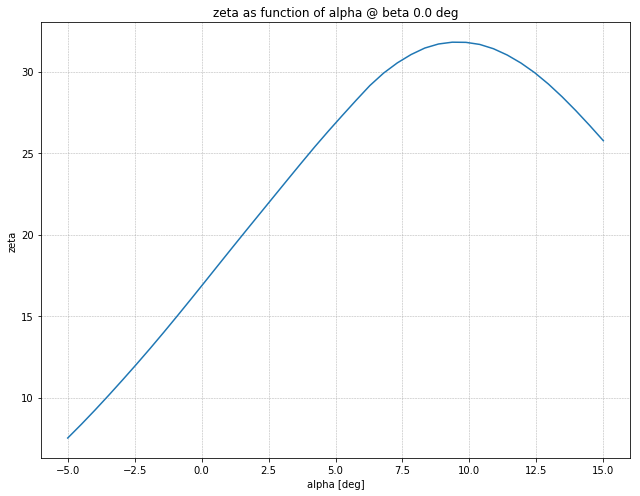

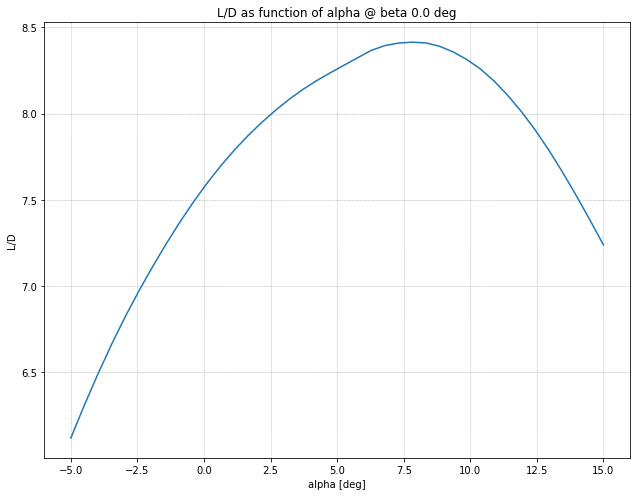

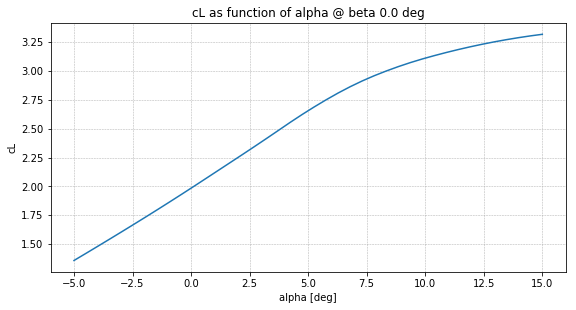

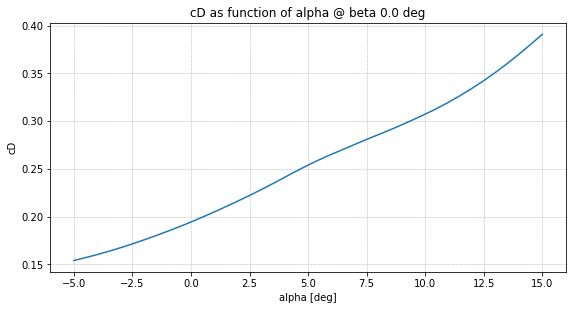

In [ ]:
#@title Explore Aero tables
override_config['body_coeff_from_alpha_beta'](-15., -0.61)
plots = configs.PlotKiteAero(m600,
                     alpha_linspace=(-5, 15.,40),
                     beta_linspace=(0., 0., 1),
                     keys=['zeta', 'L/D', 'cL', 'cD'],
                     omega_hat=[0., 0., 0.],
                     )
fig = plots['cL']
fig.set_size_inches(8,4)
fig = plots['cD']
fig.set_size_inches(8,4)
# ax = fig.gca()
# ax.set_title(r'$\zeta_{_L}$ vs $\alpha$ at nominal $\hat{\omega}$', size=16)
# ax.set_xlabel(r'$\alpha$ [deg]', size=14)
# ax.set_ylabel(r'$\zeta_{_L}$', size=14)
# # ax.clabel(fontsize=12)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.grid(linewidth=0.5, linestyle=':')
# ax.set_ylim(bottom=0)
# ax.set_xlim(-15)
# ax.text(-2,3, '$\zeta_{_L}$ includes effective tether drag')

# Make PC

In [ ]:
#@title Make solve_kwargs
pc_solve_kwargs = {
    'vars_to_opt':{
        'lift_roll_angle': {'param_type': 'each',
                            'values': [-0.1]*18,
                            'max_step': -0.1},
        'beta': {'param_type': 'constant',
                 'values': -2.5,
                 'max_step': 1.}},
    'v_w_at_h_ref_range':(4.0, 20.0),
    'v_w_step':2.0,
    'opt_params': opt_params_accurate_no_converge_data,
    'pose_solve_options': {'contol_norm': 0.0125}}
loop_solve_kwargs = {
    'vars_to_opt':{
        'lift_roll_angle': {'param_type': 'each',
                            'values': [-0.1]*18,
                            'max_step': -0.1},
        'beta': {'param_type': 'constant',
                 'values': -2.5,
                 'max_step': 1.}},
    'opt_params': opt_params_accurate_no_converge_data,
    'pose_solve_options': {'contol_norm': 0.0125}}

pc_solve_kwargs_test = utils.deepcopy_lite(pc_solve_kwargs)
pc_solve_kwargs_test['opt_params'] = opt_params_test

In [ ]:
#@title Make PowerCurve
pc = makani_FBL.KitePowerCurve(
    sea_level_no_shear, override_config,
    verbose=True, grav_mult=0.01,
    **pc_solve_kwargs)
pc.solve()


NameError: ignored

# Analysis for Paper

In [ ]:
#@title Analytical Func
def Height(theta_e, l_tether):
  return np.sin(theta_e) * l_tether

def ThetaEMin(r_loop, l_tether, h_min, h_tower):
  return np.arcsin(r_loop/l_tether) + np.arcsin((h_min - h_tower)/l_tether)

def ThetaEIdeal(shear):
  # solution including tower height
  # theta_ideal = 2*np.arctan(
  #   -np.sqrt(-4 + (h_tower + np.sqrt(
  #       4*shear**2*l_tether**2 + 4*shear*l_tether**2 + h_tower**2))**2
  #       /(shear**2*l_tether**2))/2
  #   + h_tower/(2*shear*l_tether)
  #   + np.sqrt(4*shear**2*l_tether**2 + 4*shear*l_tether**2 + h_tower**2)/(2*shear*l_tether))
  return np.arctan(np.sqrt(shear)) if shear != 0. else 0.

def ThetaEBest(r_loop, config, shear):
  l_tether = config['l_tether']
  h_min = config['h_min']
  h_tower = config['gs_position'][2]
  
  if l_tether == 0.:
    theta_best = 0.
  else:
    theta_min = ThetaEMin(r_loop, l_tether, h_min, h_tower)
    theta_ideal = ThetaEIdeal(shear)
    theta_best = max(theta_ideal, theta_min)
  return theta_best

def K_TDR(config, alpha, beta, omega_hat=None):
  """Get the k_TDR for a given config and operating point."""
  aero_coeff = GetAeroCoeff(
      config, alpha, beta, incl_tether=False, omega_hat=omega_hat)
  cL, cDk = aero_coeff['cL'], aero_coeff['cD']
  d_tether, cD_t = config['t_tether'], config['cD_tether']
  S = config['s']

  return cD_t * d_tether / (cDk * S)

def CD(config, alpha, beta, omega_hat=None, k_tdr=None, static_tether_ratio=0.):
  """Get the drag from the k_TDR and tether length.
  Ignores the c_d_tether_eff in the config so all you need to update is the
  tether length rather than the tether drag."""
  aero_coeff = GetAeroCoeff(
      config, alpha, beta, incl_tether=False, omega_hat=omega_hat)
  cDk = aero_coeff['cD']
  k_tdr = K_TDR(config, alpha, beta, omega_hat=omega_hat) if k_tdr is None else k_tdr
  l_tether = config['l_tether'] * (1. - static_tether_ratio)

  return cDk * (1. + 0.25 * k_tdr * l_tether)

def C_TD(config, alpha, beta, omega_hat=None, k_tdr=None, static_tether_ratio=0.):
  aero_coeff = GetAeroCoeff(
      config, alpha, beta, incl_tether=False, omega_hat=omega_hat)
  cDk = aero_coeff['cD']
  return (cDk/CD(
      config, alpha, beta, omega_hat=omega_hat, k_tdr=k_tdr,
      static_tether_ratio=static_tether_ratio))**2

def C_theta_e(theta_e):
  return np.cos(theta_e)**3

def C_shear(config, theta_e, shear, h_ref):
  h_tower = config['gs_position'][2]
  l_tether = config['l_tether']
  return ((l_tether * np.sin(theta_e) + h_tower)/ h_ref)**(3.*shear)

def C_turn(config, alpha, beta, rho, r_loop, omega_hat=None,
           static_tether_ratio=0.):
  aero_coeff = GetAeroCoeff(
      config, alpha, beta, omega_hat=omega_hat,
      static_tether_ratio=static_tether_ratio)
  cL = aero_coeff['cL']
  cY = aero_coeff['cY']
  m_eff = config['m_kite'] + config['m_tether'] / 3.
  S = config['s']
  l_tether = config['l_tether'] * (1. - static_tether_ratio)

  c_r_loop = (
      (1. - (2.*m_eff/(rho * cL * S * r_loop)
      - r_loop/l_tether - cY/cL)**2)**(3./2.)
  )
  return c_r_loop

def C_eta(eta):
  return eta

def ZetaV(
    config, alpha, beta, v_k, v_w_eff, omega_hat=None, incl_tether=True, static_tether_ratio=0.):
  aero_coeff = GetAeroCoeff(
      config, alpha, beta, incl_tether, omega_hat, static_tether_ratio=static_tether_ratio)
  cL, cD = aero_coeff['cL'], aero_coeff['cD']
  vk_over_v_w = v_k / v_w_eff
  return cL * vk_over_v_w**2 - cD * vk_over_v_w**3

def ZetaL(
  config, alpha, beta, omega_hat=None, incl_tether=True, static_tether_ratio=0.):
  aero_coeff = GetAeroCoeff(
      config, alpha, beta, incl_tether, omega_hat,
      static_tether_ratio=static_tether_ratio)
  cL, cD = aero_coeff['cL'], aero_coeff['cD']
  return (4./27.)*cL**3/cD**2

def Zeta0(config, alpha, beta, omega_hat=None):
  return ZetaL(
      config, alpha, beta, omega_hat=None, incl_tether=False)
  
def VwEff(config, theta_e, shear, v_w_ref):
  v_w_vh = VwVH(config, theta_e, shear, v_w_ref)
  return v_w_vh * np.cos(theta_e)
  
def VwVH(config, theta_e, shear, v_w_ref):
  h_tower = config['gs_position'][2]
  l_tether = config['l_tether']
  return v_w_ref * ((l_tether * np.sin(theta_e) + h_tower)/ h_ref)**shear


def VkL(config, alpha, beta, v_w_eff, incl_tether=True, omega_hat=None, static_tether_ratio=0.):
  aero_coeff = GetAeroCoeff(
      config, alpha, beta, incl_tether, omega_hat,
      static_tether_ratio=static_tether_ratio)
  cL, cD = aero_coeff['cL'], aero_coeff['cD']
  
  l_over_d = cL/cD
  return (2./3.) * l_over_d * v_w_eff

def DeltaVk(r_loop, g, k_grav, theta_e, v_kL):
  return 2. * r_loop * g * k_grav * np.cos(theta_e) / v_kL

def ZetaVBar(
    config, alpha, beta, k_grav, v_k_bar, Dv_k, v_w_eff,
    incl_tether=True, omega_hat=None, static_tether_ratio=0.):
  state = GetAeroCoeff(
      config, alpha, beta, incl_tether=incl_tether,
      omega_hat=omega_hat, static_tether_ratio=static_tether_ratio)
  cL, cD = state['cL'], state['cD']

  vkm_over_vw = v_k_bar / v_w_eff
  u = Dv_k**2 / (8. * v_k_bar**2)

  return cL * vkm_over_vw**2 * (u + 1.) - cD * vkm_over_vw**3 * (math.pi * u + 1.)

def C_v_k(config, alpha, beta, zeta_v_bar, omega_hat=None, static_tether_ratio=0.):
  return zeta_v_bar / ZetaL(
      config, alpha, beta, omega_hat=omega_hat,
      static_tether_ratio=static_tether_ratio)

def C_pump(
    config, g, theta_e, eta_pump,
    k_grav, v_k_bar, C_other, p0):

  m_effg = config['m_kite'] + 0.5 * config['m_tether']

  return (
      1. + (
          m_effg * g * np.cos(theta_e) * eta_pump
          * (1. - k_grav) * v_k_bar)
      / (C_other * math.pi * p0))
  
def Ppump(config, g, theta_e, eta_pump,
          k_grav, v_k_bar):
  m_effg = config['m_kite'] + 0.5 * config['m_tether']
  return (
      m_effg * g * np.cos(theta_e) * eta_pump
      * (1. - k_grav) * v_k_bar) / math.pi


def VkTmax(config, alpha, beta, rho, omega_hat=None):
  state = GetAeroCoeff(
      config, alpha, beta, omega_hat=omega_hat)
  cL = state['cL']
  return np.sqrt(
      2. * config['tension_max']
      / (rho * cL * config['s']))

def VwTmaxEff(
    config, alpha, beta, T_max, rho, omega_hat=None, static_tether_ratio=0.):
  return (
      np.sqrt(2. * T_max /
              (3. * rho * config['s']
               * ZetaL(
                   config, alpha, beta, omega_hat=omega_hat,
                   static_tether_ratio=static_tether_ratio))))

def C_Tmax(
    T_max, v_w_eff, v_w_eff_T_max, p0, c_theta_e, c_shear, c_td):
    return np.where(
        v_w_eff >= v_w_eff_T_max,
        T_max * (v_w_eff - (2./3.) * v_w_eff_T_max)
        / (p0 * c_theta_e * c_shear * c_td),
        1.)

# def C_vk_min(config, alpha, beta, v_w_eff, omega_hat=None):
#   state = GetAeroCoeff(
#       config, alpha, beta, incl_tether=True,
#       omega_hat=omega_hat)
#   cL, cD = state['cL'], state['cD']
#   v_w_eff_vk_min = (3./2.) * (cD/cL) * config['v_a_min']

#   return np.where(
#       v_w_eff >= v_w_eff_vk_min,
#       1.,
#       ZetaV(
#           config, alpha, beta, config['v_a_min'], v_w_eff,
#           omega_hat=omega_hat)
#       / ZetaL(config, alpha, beta, omega_hat=omega_hat))
  
def C_thrust(c_td, c_theta_e, c_shear, c_turn, c_vk, c_tmax):
  return c_td * c_theta_e * c_shear * c_turn * c_vk * c_tmax

def C_i(a_swept, s, zeta_0, c_shear, c_thrust, multi=1.):
  return (4. * a_swept * c_shear/ (4. * a_swept * c_shear + s * zeta_0 * multi * c_thrust))**3

def RLoopIdeal(config, alpha, beta, rho, omega_hat=None):
  aero_coeffs = GetAeroCoeff(config, alpha, beta, omega_hat=omega_hat)
  cL = aero_coeffs['cL']
  m_effa = M_eff_a(config)
  return (
      np.sqrt(2. * config['l_tether'] * m_effa / (rho * cL * config['s'])))

def GetAeroCoeff(
    config, alpha, beta, incl_tether=True, omega_hat=None, k_tdr=None, static_tether_ratio=0.):
  state = {}
  state['alpha'] = alpha
  state['beta'] = beta

  # Get body coeff and calc aero coeff.
  state.update(config['body_coeff_from_alpha_beta'](
      alpha, beta, omega_hat))
  kite_pose.KitePose._aero_coeff_from_body_coeff(state)
  kite_pose.KitePose._apply_aero_offsets(state, config)
  if incl_tether:
    state['cD'] = CD(
        config, alpha, beta, omega_hat, k_tdr,
        static_tether_ratio=static_tether_ratio)
  return state

def EtaPump(eta_t2g, p_thrust, p_pump_max):
  p_pump_max_fudge = np.where(p_pump_max==0., 1e-8, p_pump_max)
  ratio = np.where(p_thrust >= p_pump_max, 1., p_thrust/p_pump_max_fudge)
  eta_pump = (eta_t2g - 1./eta_t2g)*(1. - np.sin(math.pi * ratio / 2.))
  # eta_pump = np.where(p_thrust/p_pump_max_fudge <= 1., eta_pump, 0.)
  # if p_pump_max == 0.:
  #   eta_pump = 0.
  # else:
  #   eta_pump = (
  #     # (eta_t2g - 1./eta_t2g)*(1. - np.sin(p_thrust * math.pi/(2.*p_pump_max)))
  #     (eta_t2g - 1./eta_t2g)*(1. - p_thrust/p_pump_max))
  #   eta_pump = np.where(p_thrust/p_pump_max <= 1., eta_pump, 0.)
  return eta_pump

def PpumpMax(config, g, theta_e, k_grav, v_k_bar):
  m_effg = config['m_kite'] + 0.5 * config['m_tether']
  return (
      m_effg * g * np.cos(theta_e)
      * (1. - k_grav) * v_k_bar)

def P(
    config, alpha, beta, r_loop, h_ref, shear, rho, g,
    v_w_ref, eta_t2g, k_grav, omega_hat=None, induced=False, static_tether_ratio=0., multi=1., v_a_max=None):
  o = {}

  o['zeta_0'] = Zeta0(config, alpha, beta, omega_hat=omega_hat)
  o['p0'] = P0(config, alpha, beta, rho, v_w_ref, omega_hat=omega_hat)

  o['C_TD'] = C_TD(
      config, alpha, beta, omega_hat=omega_hat,
      static_tether_ratio=static_tether_ratio)
  o['theta_e'] = ThetaEBest(r_loop, config, shear)

  o['C_theta_e'] = C_theta_e(o['theta_e'])
  o['C_shear'] = C_shear(config, o['theta_e'], shear, h_ref)
  o['C_turn'] = C_turn(
      config, alpha, beta, rho, r_loop, omega_hat=omega_hat,
      static_tether_ratio=static_tether_ratio)
  o['C_eta'] = eta_t2g
  o['v_w_eff'] = VwEff(config, o['theta_e'], shear, v_w_ref)
  o['v_k_bar'] = VkL(
      config, alpha, beta, o['v_w_eff'], omega_hat=omega_hat,
      static_tether_ratio=static_tether_ratio)
  o['Dv_k'] = DeltaVk(r_loop, g, k_grav, o['theta_e'], o['v_k_bar'])
  # Account for v_a_min losses
  o['v_k_bar'] = np.where(
      o['v_k_bar'] - 0.5 * o['Dv_k'] <= config['v_a_min'],
       0.5 * (
          np.sqrt(
              config['v_a_min']**2 + 4. * r_loop * g
              * k_grav * np.cos(o['theta_e']))
          + config['v_a_min']),
      o['v_k_bar'])
  # Recompute Dv_k
  o['Dv_k'] = DeltaVk(r_loop, g, k_grav, o['theta_e'], o['v_k_bar'])
  # Account for max airspeed
  if v_a_max is not None:
    o['v_k_bar'] = np.where(
        o['v_k_bar'] + 0.5 * o['Dv_k'] >= v_a_max,
        0.5 * (
            np.sqrt(
                v_a_max**2 - 4. * r_loop * g
                * k_grav * np.cos(o['theta_e']))
            + v_a_max),
        o['v_k_bar'])
    # Recompute Dv_k
    o['Dv_k'] = DeltaVk(r_loop, g, k_grav, o['theta_e'], o['v_k_bar'])
  # Incorporate into speed losses
  o['zeta_vbar'] = ZetaVBar(
      config, alpha, beta, k_grav, o['v_k_bar'],
      o['Dv_k'], o['v_w_eff'], omega_hat=omega_hat, static_tether_ratio=static_tether_ratio)
  o['C_v_k'] = C_v_k(config, alpha, beta, o['zeta_vbar'], omega_hat=None, static_tether_ratio=static_tether_ratio)
  o['v_w_eff_Tmax'] = VwTmaxEff(
      config, alpha, beta, config['tension_max'], rho,
      omega_hat=omega_hat, static_tether_ratio=static_tether_ratio)
  o['C_Tmax'] = C_Tmax(
      config['tension_max'], o['v_w_eff'], o['v_w_eff_Tmax'],
      o['p0'], o['C_theta_e'], o['C_shear'], o['C_TD'])
  o['C_other'] = (
      o['C_TD'] * o['C_theta_e'] * o['C_shear'] * o['C_turn']
      * o['C_eta'] * o['C_v_k'] * o['C_Tmax'])
  o['C_thrust'] = C_thrust(
      o['C_TD'], o['C_theta_e'], o['C_shear'], o['C_turn'], o['C_v_k'], o['C_Tmax'])
  o['A_swept'] = Aswept(o['theta_e'], r_loop, config['b'])
  o['C_i'] = (C_i(
      o['A_swept'], config['s'], o['zeta_0'], o['C_shear'],
      o['C_thrust'], multi=multi) if induced else 1.)
  o['C_thrust_i'] = o['C_thrust'] * o['C_i']
  o['P_thrust'] = o['p0'] * o['C_thrust_i'] * multi

  o['P_pump_max'] = PpumpMax(
      config, g, o['theta_e'], k_grav, o['v_k_bar'])
  o['eta_pump'] = EtaPump(eta_t2g, o['P_thrust'], o['P_pump_max'])
  o['P_pump'] = Ppump(config, g, o['theta_e'], o['eta_pump'], k_grav, o['v_k_bar']) * multi

  o['C_pump'] = C_pump(
      config, g, o['theta_e'], o['eta_pump'], k_grav, o['v_k_bar'],
      o['C_other'], o['p0'])
    
  o['C_all'] = o['C_other'] * o['C_pump'] * o['C_i']
  o['p'] = o['C_all'] * o['p0'] * multi

  big_shape = None
  for k, v in o.iteritems():
    if hasattr(v, 'shape'):
      if v.shape > big_shape:
        big_shape = v.shape
  if big_shape is not None:
    # if big_shape[0] > 0:
    for k, v in o.iteritems():
      o[k] = np.broadcast_to(v, big_shape)
  return o

def P_HAWT(config, alpha, beta, eta, r_loop, rho, shear, h_ref, v_w_ref, omega_hat=None, induced=True):
  o = {}
  o['zeta_0'] = Zeta0(config, alpha, beta, omega_hat=omega_hat)
  o['p0'] = P0(config, alpha, beta, rho, v_w_ref, omega_hat=omega_hat)
  o['C_shear'] = C_shear(config, 0., shear, h_ref)
  o['A_swept'] = Aswept(0., r_loop, config['b'])
  o['C_i'] = C_i(o['A_swept'], config['s'], o['zeta_0'], o['C_shear'], o['C_shear'])
  o['C_eta'] = eta
  o['C_all'] = o['C_shear'] * o['C_i'] * o['C_eta']
  o['p_hawt'] = o['p0'] * o['C_all']
  o['C_iZS/C_betz'] =  o['C_i'] * o['zeta_0'] * config['s'] / (o['A_swept'] *C_Betz)
  return o

def P0(config, alpha, beta, rho, v_w, omega_hat=None):
  zeta_0 = Zeta0(config, alpha, beta, omega_hat=omega_hat)
  return 0.5 * rho * zeta_0 * config['s'] * v_w**3

C_Betz = 16./27.

def Aswept(theta, r_loop, b):
  return (
      math.pi * 2. * b * r_loop
      * math.cos(theta))

def P_w_induced(
    r_loop, config, alpha, beta, theta, h_ref,
    shear, rho, v_w0, incl_tether=True):
  s_swept = S_swept(theta, r_loop, config['b'])
  p_f = C_turn(r_loop, config, alpha, beta, theta, h_ref, shear, rho)
  zeta = makani_FBL.calc_loyd(
      config, alpha, beta, model_tether_drag=incl_tether)[0]
  p_betz = betz_limit(s_swept, rho, v_w0)
  v_w = (4. * s_swept * v_w0
         / (4. * s_swept + config['s'] * zeta * p_f))
  p = 0.5 * rho * p_f * zeta * config['s'] * v_w**3
  p_wo_induced = P(r_loop, config, alpha, beta, h_ref,
             shear, rho, v_w0, incl_tether=True)
  return p, v_w, p/p_wo_induced, p/p_betz

def P_ratio_with_induced(s_swept, c, c_0, zeta, zeta_0, s):
  return (
      (64. * s_swept**3 * c * zeta)
      / (c_0 * zeta_0 * (4. * s_swept + c * s * zeta)**3))
  
def Vk_from_Psi(v_k_bar, d_vk, psi):
  return v_k_bar - 0.5 * d_vk * np.cos(psi)

def Va_from_VkVw(v_k, v_w_vh, theta, loop_angle):
  return np.sqrt(
      v_k**2 + v_w_vh**2 - 2.*v_w_vh*v_k*np.cos(math.pi/2. - np.sin(loop_angle)*theta))

def P_grav(loop_angle, m_eff, g, theta_ele, k_grav, v_k, eta):
  return (
      np.sin(loop_angle) * np.cos(theta_ele) * m_eff
      * (1. - k_grav) * g * v_k * eta)
  
def M_eff_g(config):
  return config['m_kite'] + 0.5 * config['m_tether']

def M_eff_a(config):
  return config['m_kite'] +  config['m_tether'] / 3.

def roll_angle_sa(
    config, alpha, beta, rho, g, v_k, theta, r_loop, loop_angle,
    v_w_vh=None, r_curv=None):
    l_tether = config['l_tether']
    s = config['s']
    m_eff = config['m_kite'] + config['m_tether']/3.

    if r_curv is None:
      r_curv = r_loop

    half_cone = np.arcsin(r_loop/l_tether)

    state = {'alpha': alpha,
             'beta': beta}
    state.update(config['body_coeff_from_alpha_beta'](alpha, beta))
    kite_pose.KitePose._aero_coeff_from_body_coeff(state)
    kite_pose.KitePose._apply_aero_offsets(state, config)
    state['cD'] += config['cD_eff_tether']
    cL, cD, cY = state['cL'], state['cD'], state['cY']
    
    if v_w is None:
      v_a = v_k
    else:
      v_a = Va_from_VkVw(v_k, v_w_vh, theta, loop_angle)
    
    lift = 0.5*rho*s*cL*v_a**2
    side_lift = 0.5*rho*cY*s*v_a**2
    
    roll = ((m_eff*v_k**2/r_curv #centrifugal force
             - ((r_loop/l_tether) * lift / np.cos(half_cone)) #component of tension pulling in
             + lift * half_cone #component of lift, broken apart into half cone and roll portions
             + side_lift #component of side force
             - np.cos(loop_angle) * m_eff * g * np.cos(theta)) #gravity
            / lift) #divide by lift to get roll
    
    return roll

def roll_angle(config, alpha, beta, rho, g, v_k, theta, r_loop, loop_angle, v_w=None, r_curv=None):
  l_tether = config['l_tether']
  s = config['s']
  m_eff = config['m_kite'] + config['m_tether']/3.

  if r_curv is None:
    r_curv = r_loop

  half_cone = np.arcsin(r_loop/l_tether)

  state = {'alpha': alpha,
            'beta': beta}
  state.update(config['body_coeff_from_alpha_beta'](alpha, beta))
  kite_pose.KitePose._aero_coeff_from_body_coeff(state)
  kite_pose.KitePose._apply_aero_offsets(state, config)
  state['cD'] += config['cD_eff_tether']
  cL, cD, cY = state['cL'], state['cD'], state['cY']
  
  if v_w is None:
      v_a = v_k
  else:
      v_a = va_from_vkvw(v_k, v_w, theta, loop_angle)
  
  lift = 0.5*rho*s*cL*v_a**2
  side_lift = 0.5*rho*cY*s*v_a**2
  
  def err(roll):
    forces_parr_crosswind_plane = (
      m_eff*v_k**2/r_curv #centrifugal force
      - ((r_loop/l_tether) * lift * np.cos(half_cone - roll)/np.cos(half_cone)) #component of tension pulling in
      + lift * np.sin(half_cone - roll) #component of lift pulling in
      + (side_lift * np.cos(half_cone - roll)) #component of side force
      - np.cos(loop_angle) * m_eff * g * np.cos(theta)) #gravity
    return abs(forces_parr_crosswind_plane)
  
  roll_angle = minimize_scalar(
      err, bracket=(half_cone, half_cone*1.1),
      method='bounded',
      bounds=(-math.pi, math.pi))['x']
  return roll_angle

def MinTurn(
    config, alpha, beta, rho, g, v_k, theta,
    r_loop, loop_angle, roll, v_w_vh=None):
  l_tether = config['l_tether']
  s = config['s']
  m_eff = config['m_kite'] + config['m_tether']/3.

  half_cone = np.arcsin(r_loop/l_tether)

  state = {'alpha': alpha,
            'beta': beta}
  state.update(config['body_coeff_from_alpha_beta'](alpha, beta))
  kite_pose.KitePose._aero_coeff_from_body_coeff(state)
  kite_pose.KitePose._apply_aero_offsets(state, config)
  state['cD'] += config['cD_eff_tether']
  cL, cD, cY = state['cL'], state['cD'], state['cY']
  
  if v_w is None:
      v_a = v_k
  else:
      v_a = Va_from_VkVw(v_k, v_w_vh, theta, loop_angle)
  
  lift = 0.5*rho*s*cL*v_a**2
  side_lift = 0.5*rho*cY*s*v_a**2
  
  min_turn = (
      m_eff*v_k**2
      / ((r_loop/l_tether) * lift * np.cos(half_cone - roll)/np.cos(half_cone)
         - lift * np.sin(half_cone - roll)
         - (side_lift * np.cos(half_cone - roll))
         + np.cos(loop_angle) * m_eff * g * np.cos(theta)))
  return min_turn

In [ ]:
#@title Analytical Model, Trial 1
#@markdown 40m min radius, no shear

np.seterr(all='warn')

l_tethers = np.array([200., 300., 400., 600.])
alpha, beta = 0., 0.
r_loop_min = 40. # bound for optimization
rho = 1.225
h_ref = 80.
shear = 0.
g = 9.81
eta_t2g = 0.66
v_w_refs = np.linspace(4., 20., 50)
temp_kite = copy.deepcopy(simple_config)

all_results = []
for l_tether in l_tethers:
  temp_kite['l_tether'] = l_tether
  results = []
  for v_w_ref in v_w_refs:
    def opt(args):
      r_loop = args[0]
      k_grav = args[1]
      
      return -P(
          temp_kite, alpha, beta, r_loop, h_ref, shear, rho, g,
          v_w_ref, eta_t2g, k_grav)['p']
    rr = scipy.optimize.minimize(
        opt, (80., 0.7),
        bounds=((r_loop_min,0.5*l_tether),(0., 1.)))#options={'epsilon':0.001},)
    if not rr['success']:
      print(l_tether, v_w_ref, rr['message'], rr['x'])
    r_loop, k_grav = rr['x']
    r = P(
        temp_kite, alpha, beta, r_loop, h_ref, shear, rho, g,
        v_w_ref, eta_t2g, k_grav)
    r['r_loop'], r['l_tether'], r['k_grav'] = r_loop, l_tether, k_grav
    results.append(r)
  all_results.append(results)

for ii, result in enumerate(all_results):
  all_results[ii] = utils.ld_to_dl(result)
  for k, v in all_results[ii].iteritems():
    all_results[ii][k] = np.array(v)

In [ ]:
#@title Analytical Model, Trial 1.5
#@markdown 75m min radius, no shear
l_tethers = np.array([200., 300., 400., 600.])
alpha, beta = 0., 0.
r_loop_min = 90.
rho = 1.225
h_ref = 80.
shear = 0.
g = 9.81
eta_t2g = 0.66
v_w_refs = np.linspace(4., 20., 50)
temp_kite = copy.deepcopy(simple_config)

all_results_75 = []
for l_tether in l_tethers:
  temp_kite['l_tether'] = l_tether
  results = []
  for v_w_ref in v_w_refs:
    def opt(args):
      r_loop = args[0]
      k_grav = args[1]
      
      return -P(
          temp_kite, alpha, beta, r_loop, h_ref, shear, rho, g,
          v_w_ref, eta_t2g, k_grav)['p']
    rr = scipy.optimize.minimize(
        opt, (80., 0.7),
        bounds=((r_loop_min,0.5*l_tether),(0., 1.)))
    if not rr['success']:
      print(l_tether, v_w_ref, rr['message'], rr['x'])
    r_loop, k_grav = rr['x']
    r = P(
        temp_kite, alpha, beta, r_loop, h_ref, shear, rho, g,
        v_w_ref, eta_t2g, k_grav)
    r['r_loop'], r['l_tether'], r['k_grav'] = r_loop, l_tether, k_grav
    results.append(r)
  all_results_75.append(results)

for ii, result in enumerate(all_results_75):
  all_results_75[ii] = utils.ld_to_dl(result)
  for k, v in all_results_75[ii].iteritems():
    all_results_75[ii][k] = np.array(v)

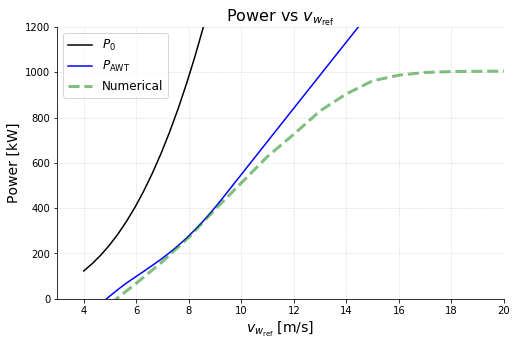

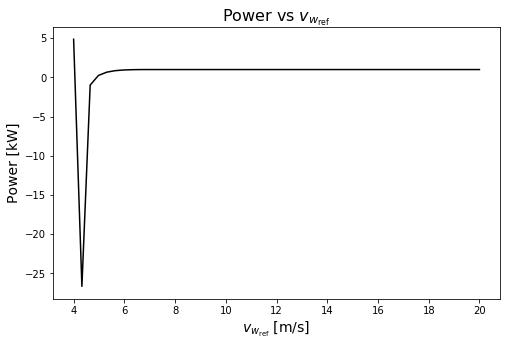

In [ ]:
#@title Plot Comparison with FBL
#@markdown 90m radius, no shear, fixed k_grav
alpha, beta = 0., 0.
r_loop = 90.
k_grav = 0.7
rho = 1.225
h_ref = 80.
shear = 0.
g = 9.81
eta_t2g = 0.66
v_w_refs = np.linspace(4., 20., 50)
temp_kite = copy.deepcopy(simple_config)
temp_kite['l_tether'] = 300.
# baseline_result = P(temp_kite, alpha, beta, r_loop, h_ref, shear, rho, g, v_w_refs, eta_t2g, np.linspace(0.5,1.5,50))
baseline_result = P(temp_kite, alpha, beta, r_loop, h_ref, shear, rho, g, v_w_refs, eta_t2g, k_grav)

plt.figure(figsize=(8,5))
plt.title('Power vs $v_{w_\mathrm{ref}}$', size=16)
plt.xlabel('$v_{w_\mathrm{ref}}$ [m/s]', size=14)
plt.ylabel('Power [kW]', size=14)
plt.plot(v_w_refs, all_results[0]['p0']/1000.,
         label='$P_0$', color='k')
plt.plot(
    v_w_refs,
    (baseline_result['p']/1000.),
    label='$P_\mathrm{AWT}$',
    color='b')
plt.plot([4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0],
         [-98.0, -23.0, 68.0, 164.0, 271.0, 394.0, 511.0, 628.0, 726.0, 829.0, 904.0, 962.0, 987.0, 999.0, 1003.0, 1004.0, 1005.0, 1006.0],
         label='Numerical', color='green', linestyle='--', linewidth=3, alpha=0.5)
plt.ylim((0.,1200))
plt.xlim((3., 20))
plt.legend(fontsize=12)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(linewidth=0.5, linestyle=':')

plt.figure(figsize=(8,5))
plt.title('Power vs $v_{w_\mathrm{ref}}$', size=16)
plt.xlabel('$v_{w_\mathrm{ref}}$ [m/s]', size=14)
plt.ylabel('Power [kW]', size=14)
plt.plot(v_w_refs, baseline_result['C_pump'],
         label='$P_0$', color='k')



Text(8.5,0.05,'$l_t$ = 300m')

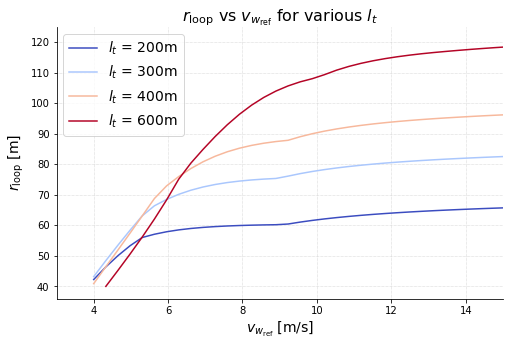

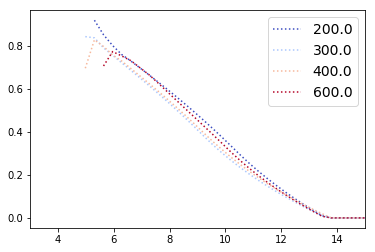

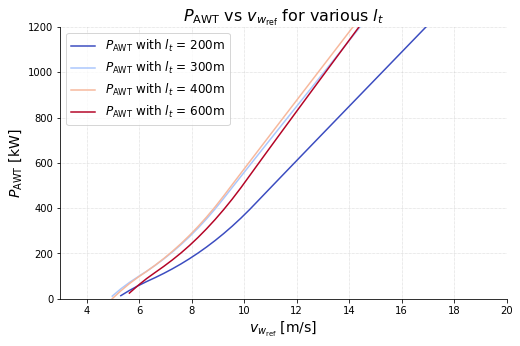

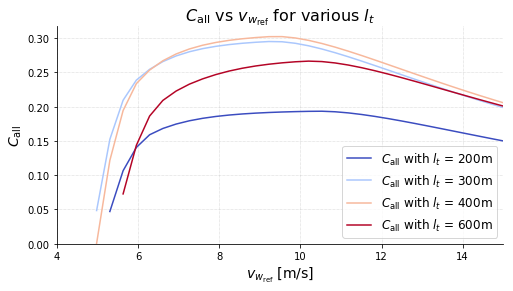

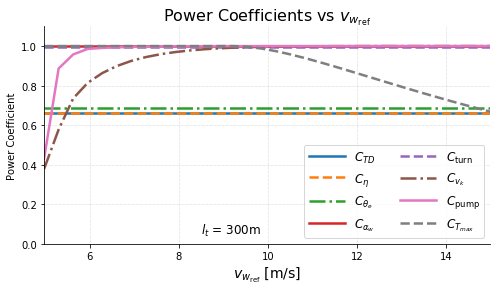

In [ ]:
#@title Plot Trial 1 and 1.5
#@markdown 40m min radius, no shear
alpha, beta = 0., 0.
r_loop = 80.
k_grav = 0.75
rho = 1.225
h_ref = 80.
shear = 0.
g = 9.81
eta_t2g = 0.66
v_w_refs = np.linspace(4., 20., 50)
temp_kite = copy.deepcopy(simple_config)
temp_kite['l_tether'] = 300.
baseline_result = P(temp_kite, alpha, beta, r_loop, h_ref, shear, rho, g, v_w_refs, eta_t2g, k_grav)

keys_c = ['C_TD','C_eta','C_theta_e','C_shear','C_turn','C_v_k', 'C_pump', 'C_Tmax']
key_to_eqn = {'C_TD': r'$C_{TD}$',
              'C_theta_e': r'$C_{\theta_e}$',
              'C_shear': r'$C_{\alpha_w}$',
              'C_turn': r'$C_\mathrm{turn}$',
              'C_eta': r'$C_\eta$',
              'C_v_k': r'$C_{v_k}$',
              'C_pump': r'$C_\mathrm{pump}$',
              'C_Tmax': r'$C_{T_{max}}$'}

f = (
  [r['C_all']>=0. for r in all_results],
  [r['C_all']>=0. for r in all_results_75])


plt.figure(figsize=(8,5))
plt.title('$r_\mathrm{loop}$ vs $v_{w_\mathrm{ref}}$ for various $l_t$', size=16)
plt.xlabel('$v_{w_\mathrm{ref}}$ [m/s]', size=14)
plt.ylabel('$r_\mathrm{loop}$ [m]', size=14)
for ii, l_t in enumerate(l_tethers):
  temp_kite['l_tether'] = l_t
  r_loop_ideal = RLoopIdeal(temp_kite, alpha, beta, rho)
  color = cm.coolwarm(float(ii) / (len(l_tethers) - 1.))
  plt.plot(v_w_refs[f[0][ii]], all_results[ii]['r_loop'][f[0][ii]],
           color=color, label='$l_t$ = %dm'%l_t)
  # plt.plot(v_w_refs[f[1][ii]], all_results_75[ii]['r_loop'][f[1][ii]],
  #          color=color, label=l_t, linestyle=':')
  # plt.hlines(r_loop_ideal, min(v_w_refs), max(v_w_refs), color=color)
plt.legend(fontsize=14)
plt.xlim((3., 15))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(linewidth=0.5, linestyle=':')

plt.figure()
for ii, l_t in enumerate(l_tethers):
  color = cm.coolwarm(float(ii) / (len(l_tethers) - 1.))
  # plt.plot(v_w_refs[f[0][ii]], all_results[ii]['k_grav'][f[0][ii]],
  #          color=color, label='$l_t$ = %dm'%l_t)
  plt.plot(v_w_refs[f[1][ii]], all_results_75[ii]['k_grav'][f[1][ii]],
           color=color, label=l_t, linestyle=':')
  # plt.hlines(r_loop_ideal, min(v_w_refs), max(v_w_refs), color=color)
plt.legend(fontsize=14)
plt.xlim((3., 15))

# Plot contrained loop size results
plt.figure(figsize=(8,5))
plt.title('$P_\mathrm{AWT}$ vs $v_{w_\mathrm{ref}}$ for various $l_t$', size=16)
plt.xlabel('$v_{w_\mathrm{ref}}$ [m/s]', size=14)
plt.ylabel('$P_\mathrm{AWT}$ [kW]', size=14)
for ii, l_t in enumerate(l_tethers):
  color = cm.coolwarm(float(ii) / (len(l_tethers) - 1.))
  # plt.plot(
      # v_w_refs[f[0][ii]],
      # (all_results[ii]['p']/1000.)[f[0][ii]],
      # label='$P_\mathrm{losses} @ l_t$ = %d'%l_t,
      # color=color, alpha=0.1)
  plt.plot(
      v_w_refs[f[1][ii]],
      (all_results_75[ii]['p']/1000.)[f[1][ii]],
      label='$P_\mathrm{AWT}$ with $l_t$ = %dm'%l_t,
      color=color)
plt.ylim((0.,1200))
plt.xlim((3., 20))
plt.legend(fontsize=12)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(linewidth=0.5, linestyle=':')

plt.figure(figsize=(8,4))
plt.title('$C_\mathrm{all}$ vs $v_{w_\mathrm{ref}}$ for various $l_t$', size=16)
plt.xlabel('$v_{w_\mathrm{ref}}$ [m/s]', size=14)
plt.ylabel('$C_\mathrm{all}$', size=14)
for ii, l_t in enumerate(l_tethers):
  c = cm.coolwarm(float(ii) / (len(l_tethers) - 1.))
  # plt.plot(v_w_refs[f[0][ii]], all_results[ii]['C_all'][f[0][ii]],
  #          label='$C_{all} @ l_t$ = %d'%l_t, color=c)
  plt.plot(v_w_refs[f[1][ii]], all_results_75[ii]['C_all'][f[1][ii]],
           color=c, label='$C_\mathrm{all}$ with $l_t$ = %dm'%l_t)
plt.ylim((0,None))
plt.xlim((4., 15))
plt.legend(fontsize=12)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(linewidth=0.5, linestyle=':')

plt.figure(figsize=(8,4))
plt.title('Power Coefficients vs $v_{w_\mathrm{ref}}$', size=16)
plt.xlabel('$v_{w_\mathrm{ref}}$ [m/s]', size=14)
plt.ylabel('Power Coefficient')
l_t_idx = 1 # pick which tether length
linestyler = itertools.cycle(['-', '--', '-.'],)
for ii, k in enumerate(keys_c):
  c = 'C%d'%ii
  style = linestyler.next()
  plt.plot(v_w_refs[f[1][l_t_idx]],
           all_results_75[l_t_idx][k][f[1][l_t_idx]],
           label=key_to_eqn[k], color=c, linestyle=style, linewidth=2.5)
plt.legend(handlelength=3, fontsize=12, ncol=2)
plt.xlim((min(v_w_refs[f[1][l_t_idx]]), 15))
plt.ylim((0.,1.1))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(linewidth=0.5, linestyle=':')
plt.text(8.5, 0.05, '$l_t$ = 300m', fontsize=12)

In [ ]:
#@title Analytical Model, Trial 2
#@markdown 80m min radius, 0.2 shear
l_tethers = np.array([200., 300., 400., 600.])
alpha, beta = 0., 0.
r_loop_min = 80. # bound for optimization
rho = 1.225
h_ref = 80.
shear = 1./7.
g = 9.81
eta_t2g = 0.66
v_w_refs = np.linspace(4., 20., 50)
temp_kite = copy.deepcopy(simple_config)

all_results_shear02 = []
for l_tether in l_tethers:
  temp_kite['l_tether'] = l_tether
  results = []
  for v_w_ref in v_w_refs:
    def opt(args):
      r_loop = args[0]
      k_grav = args[1]
      
      return -P(
          temp_kite, alpha, beta, r_loop, h_ref, shear, rho, g,
          v_w_ref, eta_t2g, k_grav)['p']
    rr = scipy.optimize.minimize(
        opt, (80., 0.7),
        bounds=((r_loop_min, 0.5*l_tether),(0., 1.)))
    if not rr['success']:
      print(l_tether, v_w_ref, rr['message'])
    r_loop, k_grav = rr['x']
    r = P(
        temp_kite, alpha, beta, r_loop, h_ref, shear, rho, g,
        v_w_ref, eta_t2g, k_grav)
    r['r_loop'], r['l_tether'], r['k_grav'] = r_loop, l_tether, k_grav
    results.append(r)
  all_results_shear02.append(results)

for ii, result in enumerate(all_results_shear02):
  all_results_shear02[ii] = utils.ld_to_dl(result)
  for k, v in all_results_shear02[ii].iteritems():
    all_results_shear02[ii][k] = np.array(v)

Text(8.5,0.05,'$l_t$ = 300m')

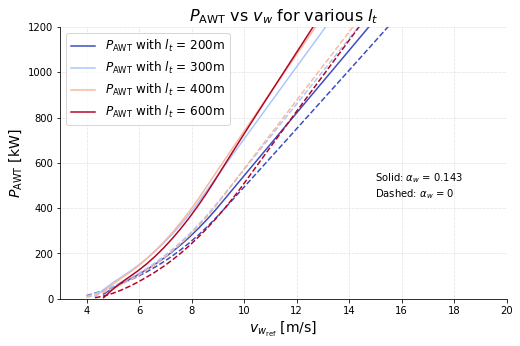

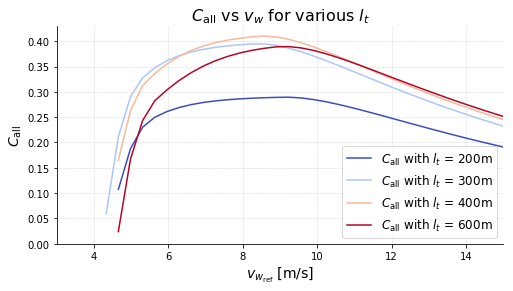

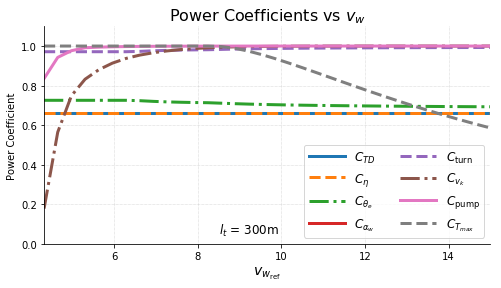

In [ ]:
#@title Plot Trial 2
#@markdown 40m min radius, 0.2 shear

alpha, beta = 0., 0.
r_loop = 90.
k_grav = 0.75
rho = 1.225
h_ref = 80.
shear = 1./7.
g = 9.81
eta_t2g = 0.66
v_w_refs = np.linspace(4., 20., 50)
temp_kite = copy.deepcopy(simple_config)
temp_kite['l_tether'] = 300.
baseline_result = P(temp_kite, alpha, beta, r_loop, h_ref, shear, rho, g, v_w_refs, eta_t2g, k_grav)

keys_c = ['C_TD','C_eta','C_theta_e','C_shear','C_turn','C_v_k', 'C_pump', 'C_Tmax']
key_to_eqn = {'C_TD': r'$C_{TD}$',
              'C_theta_e': r'$C_{\theta_e}$',
              'C_shear': r'$C_{\alpha_w}$',
              'C_turn': r'$C_\mathrm{turn}$',
              'C_eta': r'$C_\eta$',
              'C_v_k': r'$C_{v_k}$',
              'C_pump': r'$C_\mathrm{pump}$',
              'C_Tmax': r'$C_{T_{max}}$'}

f = (
  [r['C_all']>=0. for r in all_results],
  [r['C_all']>=0. for r in all_results_shear02])

plt.figure(figsize=(8,5))
plt.title('$P_\mathrm{AWT}$ vs $v_w$ for various $l_t$', size=16)
plt.xlabel('$v_{w_\mathrm{ref}}$ [m/s]', size=14)
plt.ylabel('$P_\mathrm{AWT}$ [kW]', size=14)
for ii, l_t in enumerate(l_tethers):
  color = cm.coolwarm(float(ii) / (len(l_tethers) - 1.))
  plt.plot(
      v_w_refs[f[1][ii]],
      (all_results_shear02[ii]['p']/1000.)[f[1][ii]],
      label='$P_\mathrm{AWT}$ with $l_t$ = %dm'%l_t,
      color=color)
  plt.plot(
      v_w_refs[f[0][ii]],
      (all_results[ii]['p']/1000.)[f[0][ii]],
      color=color, linestyle='--')
plt.ylim((0.,1200))
plt.xlim((3., 20))
plt.legend(fontsize=12)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(linewidth=0.5, linestyle=':')
plt.text(15, 450, r'Solid: $\alpha_w$ = 0.143'+'\n' + r'Dashed: $\alpha_w$ = 0')

plt.figure(figsize=(8,4))
plt.title('$C_\mathrm{all}$ vs $v_w$ for various $l_t$', size=16)
plt.xlabel('$v_{w_\mathrm{ref}}$ [m/s]', size=14)
plt.ylabel('$C_\mathrm{all}$', size=14)
for ii, l_t in enumerate(l_tethers):
  c = cm.coolwarm(float(ii) / (len(l_tethers) - 1.))
  # plt.plot(v_w_refs[f[0][ii]], all_results[ii]['C_all'][f[0][ii]],
  #          label='$C_{all} @ l_t$ = %d'%l_t, color=c)
  plt.plot(v_w_refs[f[1][ii]], all_results_shear02[ii]['C_all'][f[1][ii]],
           color=c, label='$C_\mathrm{all}$ with $l_t$ = %dm'%l_t)
plt.ylim((0,None))
plt.xlim((3., 15))
plt.legend(fontsize=12)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(linewidth=0.5, linestyle=':')

plt.figure(figsize=(8,4))
plt.title('Power Coefficients vs $v_w$', size=16)
plt.xlabel('$v_{w_\mathrm{ref}}$', size=14)
plt.ylabel('Power Coefficient')
l_t_idx = 1 # pick which tether length
linestyler = itertools.cycle(['-', '--', '-.'],)
for ii, k in enumerate(keys_c):
  c = 'C%d'%ii
  style = linestyler.next()
  plt.plot(v_w_refs[f[1][l_t_idx]],
           all_results_shear02[l_t_idx][k][f[1][l_t_idx]],
           label=key_to_eqn[k], color=c, linestyle=style, linewidth=3)
plt.legend(handlelength=3, fontsize=12, ncol=2)
plt.xlim((min(v_w_refs[f[1][l_t_idx]]), 15))
plt.ylim((0.,1.1))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(linewidth=0.5, linestyle=':')
plt.text(8.5, 0.05, '$l_t$ = 300m', fontsize=12)

In [ ]:
#@title Analytical Model, Trial 3 - vary mass
#@markdown 80m min radius, zero shear
m_kites = np.array([1000., 1500., 2000., 2500., 3000.])
alpha, beta = 0., 0.
r_loop_min = 60. # bound for optimization
rho = 1.225
h_ref = 80.
shear = 0.143
g = 9.81
eta_t2g = 0.66
v_w_refs = np.linspace(4., 20., 50)
temp_kite = copy.deepcopy(simple_config)

all_results_mass = []
for m_kite in m_kites:
  temp_kite['m_kite'] = m_kite
  results = []
  r_loop_min = 60.#max(80. * m_kite / simple_config['m_kite'], 60.)
  for v_w_ref in v_w_refs:
    def opt(args):
      r_loop = args[0]
      k_grav = args[1]
      
      return -P(
          temp_kite, alpha, beta, r_loop, h_ref, shear, rho, g,
          v_w_ref, eta_t2g, k_grav)['p']
    rr = scipy.optimize.minimize(
        opt, (80., 0.7),
        bounds=((r_loop_min, 0.5*300),(0., 1.)))
    if not rr['success']:
      print(m_kite, v_w_ref, rr['message'])
    r_loop, k_grav = rr['x']
    r = P(
        temp_kite, alpha, beta, r_loop, h_ref, shear, rho, g,
        v_w_ref, eta_t2g, k_grav)
    r['r_loop'], r['m_kite'], r['k_grav'] = r_loop, m_kite, k_grav
    results.append(r)
  all_results_mass.append(results)

for ii, result in enumerate(all_results_mass):
  all_results_mass[ii] = utils.ld_to_dl(result)
  for k, v in all_results_mass[ii].iteritems():
    all_results_mass[ii][k] = np.array(v)

(0, 122.60187135950427)

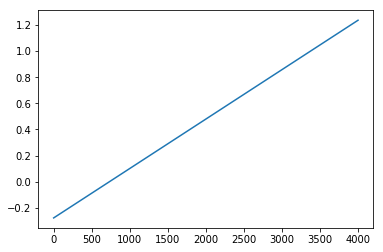

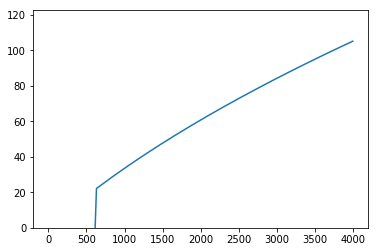

In [ ]:
rolls = []
r_loops = []
m_kites = np.linspace(0., 4000., 20)
for m in m_kites:
  v_k = 30.
  r_loop = 80.
  l_t = 300.
  theta = 0.45
  half_cone = math.asin(r_loop/l_t,)
  c_l = 1.

  l = 0.5 * 1.225 * 54 * c_l * v_k**2

  rolls.append(m*v_k**2/(l * r_loop) - r_loop / (l_t * np.cos(half_cone) + half_cone - m * 9.81 * np.cos(theta)*np.cos(2.*math.pi/3.)/l))

  def t_roll(r_loop):
    return m*v_k**2/(l * r_loop) - r_loop / (l_t * np.cos(half_cone) + half_cone - m * 9.81 * np.cos(theta)*np.cos(math.pi/3.)/l) - 0.785
  r_loops.append(scipy.optimize.root_scalar(t_roll, x0=30., x1=35., ).root)
  
plt.plot(m_kites, rolls)

plt.figure()
plt.plot(m_kites, r_loops)
plt.ylim((0,None))

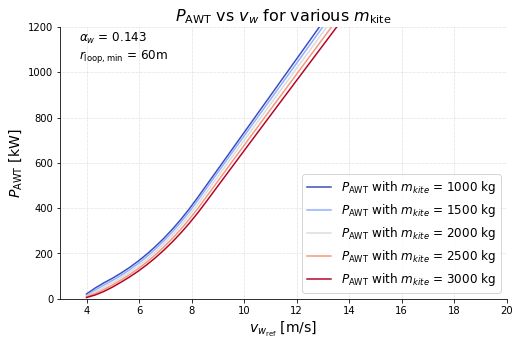

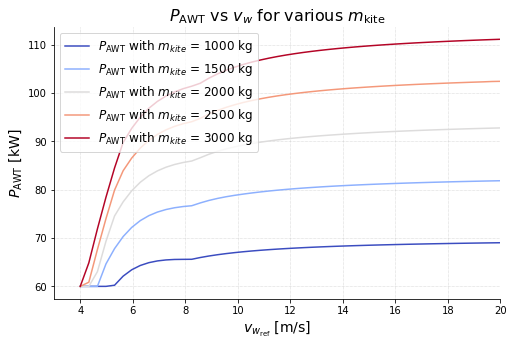

In [ ]:
f = (
  0,
  [r['C_all']>=0. for r in all_results_mass])

plt.figure(figsize=(8,5))
plt.title('$P_\mathrm{AWT}$ vs $v_w$ for various $m_\mathrm{kite}$', size=16)
plt.xlabel('$v_{w_\mathrm{ref}}$ [m/s]', size=14)
plt.ylabel('$P_\mathrm{AWT}$ [kW]', size=14)
for ii, m_kite in enumerate(m_kites):
  color = cm.coolwarm(float(ii) / (len(m_kites) - 1.))
  plt.plot(
      v_w_refs[f[1][ii]],
      (all_results_mass[ii]['p']/1000.)[f[1][ii]],
      label='$P_\mathrm{AWT}$ with $m_{kite}$ = %d kg'%m_kite,
      color=color)
plt.ylim((0.,1200))
plt.xlim((3., 20))
plt.legend(fontsize=12)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(linewidth=0.5, linestyle=':')
plt.text(3.7, 1050, r'$\alpha_w$ = 0.143'+'\n' + '$r_\mathrm{loop, min}$ = 60m', size=12)

plt.figure(figsize=(8,5))
plt.title('$P_\mathrm{AWT}$ vs $v_w$ for various $m_\mathrm{kite}$', size=16)
plt.xlabel('$v_{w_\mathrm{ref}}$ [m/s]', size=14)
plt.ylabel('$P_\mathrm{AWT}$ [kW]', size=14)
for ii, m_kite in enumerate(m_kites):
  color = cm.coolwarm(float(ii) / (len(m_kites) - 1.))
  plt.plot(
      v_w_refs[f[1][ii]],
      all_results_mass[ii]['r_loop'][f[1][ii]],
      label='$P_\mathrm{AWT}$ with $m_{kite}$ = %d kg'%m_kite,
      color=color)
# plt.ylim((0.,1200))
plt.xlim((3., 20))
plt.legend(fontsize=12)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(linewidth=0.5, linestyle=':')

{'azim': 0.2194150952303651,
 'crosswind_xy': array([-63.63961031, -63.63961031]),
 'e_path_tangent': array([-0.30756708,  0.70710678,  0.63671225]),
 'e_tether_incl': array([ 0.21854857,  0.0487375 , -0.97460822]),
 'e_tether_rad': array([-0.93961943, -0.20954016, -0.22118113]),
 'incl': 0.22583167688192693,
 'loop_angle': 3.9269908169872414,
 'loop_angle_csim': 0.7853981633974483,
 'r_curv': 89.99999999999991,
 'r_curv_hat': array([-0.30756708, -0.70710678,  0.63671225]),
 'segment_length': 35.11625796290304,
 'xyz': array([285.37257401,  63.63961031,  82.17509958])}
'Min Height: 58.44'


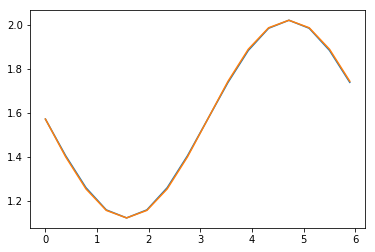

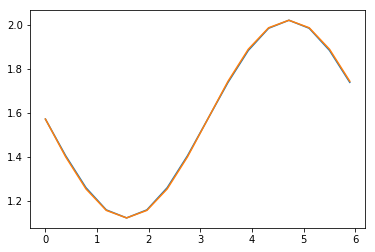

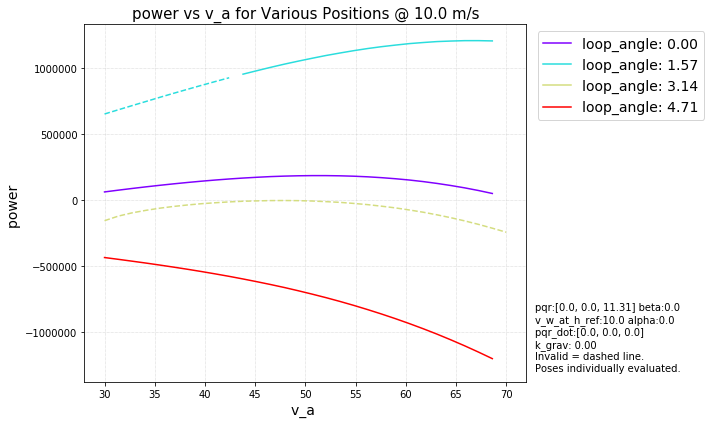

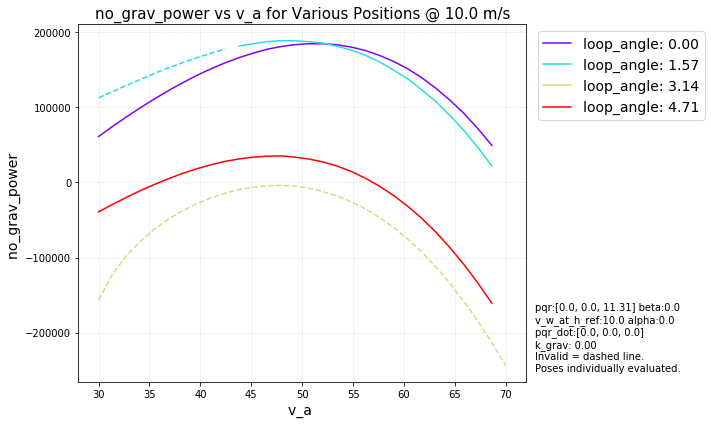

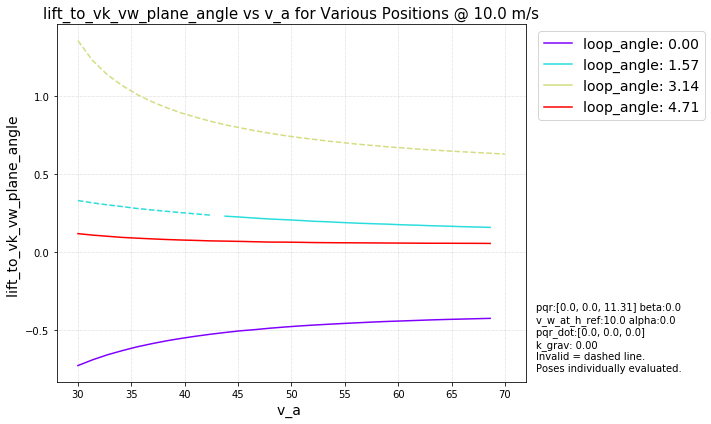

In [ ]:
#@title Path Scratch space
temp_path_location_params = {
    'incl': 0.45, 'azim': 0.}
temp_path_shape_params = {
    'type': 'circle',
    # 'r_loop': np.arcsin(np.deg2rad(30.)) * override_config['l_tether'],
    'r_loop': 90.,
    'num_pos': 16}
temp_path = kite_path.KitePath(
    temp_path_shape_params, temp_path_location_params, simple_config)
pp(temp_path.positions[10])
pp('Min Height: %0.2f'% min([p['xyz'][2] for p in temp_path.positions]))

plt.figure()
temp = []
for p in temp_path.positions:
  wind_hat = np.array([1., 0., 0])
  temp.append(np.arccos(np.dot(wind_hat, p['e_path_tangent'])))
loop_angles = np.array([p['loop_angle'] for p in temp_path.positions])
plt.plot(loop_angles, temp)
plt.plot(loop_angles, (math.pi/2. - np.sin(loop_angles)*0.45))

plt.figure()
temp = []
for p in temp_path.positions:
  wind_hat = np.array([1., 0., 0])
  temp.append(np.arccos(np.dot(wind_hat, p['e_path_tangent'])))
loop_angles = np.array([p['loop_angle'] for p in temp_path.positions])
plt.plot(loop_angles, temp)
plt.plot(loop_angles, (math.pi/2. - np.sin(loop_angles)*0.45))

temp_plot = kite_loop.plot_var_sweep(
    temp_path.positions, sea_level_no_shear, simple_config,
    accel_along_path=None, k_grav=0., grav_mult=1.0,
    vars_to_plot=['power', 'no_grav_power', 'lift_to_vk_vw_plane_angle'],
    alpha=0., beta=0., pqr=[0., 0., 2*math.pi*90./50.],
    var_range=(30., 70., 30),
    every_nth=4, legend_key='loop_angle', v_w_at_h_ref=10.)

In [ ]:
#@title Plot Omega Hat Sweep

# configs.PlotKiteAero(simple_config, keys=['zeta'], )

def OmegaSweep(
    config, alpha_linspace, omega_base, omega_linspace, omega_idx,
    keys=['zeta', 'cL'], beta=0., **kwargs):
  plots = kwargs.get('plots', {})
  levels = kwargs.get('levels', 30)
  colormap = kwargs.get('colormap', 'viridis')
  color = kwargs.get('color', 'C0')
  label = kwargs.get('label', None)
  figsize = kwargs.get('figsize', (9,7))
  linestyle = kwargs.get('linestyle', '-')
  plot_by_radius = kwargs.get('plot_by_radius', None)

  alphas = np.linspace(*alpha_linspace)
  omega_hat_vars = np.linspace(*omega_linspace)

  if plot_by_radius is not None:
    ys = plot_by_radius / (2. * omega_hat_vars)
  else:
    ys = omega_hat_vars

  o = {}
  for k in keys:
    o[k] = []
    for omega_v in omega_hat_vars:
      row = []
      for alpha in alphas:
        omega_hat = np.array(omega_base)
        omega_hat[omega_idx] = omega_v
        state = {}
        state['alpha'] = alpha
        state['beta'] = beta
        state.update(
            config['body_coeff_from_alpha_beta'](alpha, beta, omega_hat))
        kite_pose.KitePose._aero_coeff_from_body_coeff(state)
        kite_pose.KitePose._apply_aero_offsets(state, config)
        # Being lazy and only adjusting the y offset from roll moment.
        cop_offset = state['cl'] * config['b'] / -state['cL']
        radius = config['b']/ (2. * omega_hat[2])
        adjusted_speed = (radius - cop_offset) / radius
        coeff_adjuster = (1. / adjusted_speed)**2
        state['cL_adjust'] = state['cL'] * coeff_adjuster
        state['cD_adjust'] = state['cD'] * coeff_adjuster
        if k == 'zeta':
          row.append(
              (4./27.) * state['cL']**3
               / (state['cD'] + config['cD_eff_tether'])**2)
        elif k == 'zeta_adjust':
          row.append(
              (4./27.) * state['cL_adjust']**3
               / (state['cD_adjust'] + config['cD_eff_tether'])**2)
        elif k == 'cop_offset':
          row.append(cop_offset)
        elif k == 'coeff_adjuster':
          row.append(coeff_adjuster)
        elif k == 'adjusted_speed':
          row.append(adjusted_speed)
        else:
          row.append(state[k])
      o[k].append(row)
  for k in keys:
    plots[k] = plt.figure(figsize=figsize)
    ax = plots[k].gca()
    CS = ax.contour(
        alphas, ys, o[k], levels, cmap=colormap)
    ax.clabel(CS, inline=1, fontsize=11)
    title = (k + ' as function of alpha and omega_hat ')
    ax.set_title(title)
    ax.set_xlabel('alpha [deg]')
    ax.set_ylabel('omega_hat[%d]'%omega_idx)
    ax.grid(linestyle='--', linewidth=0.5)
  return plots

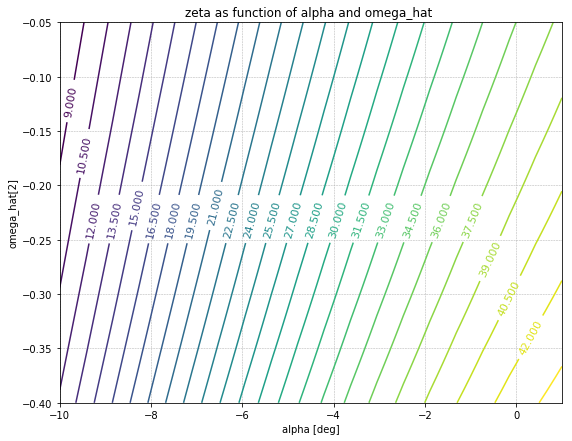

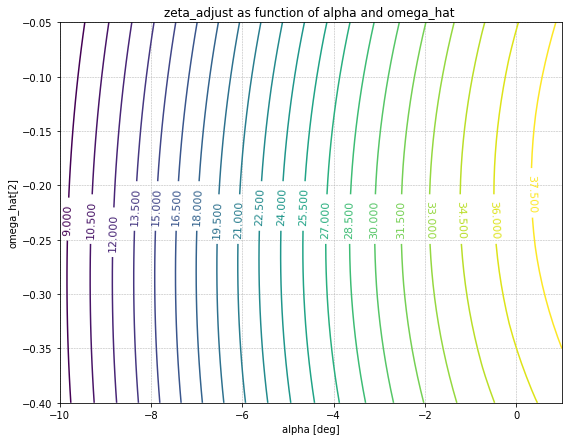

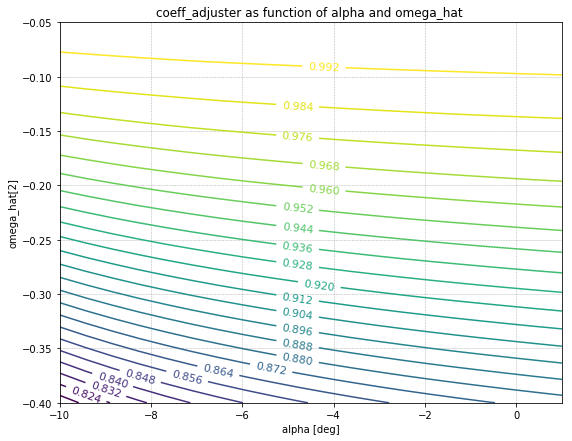

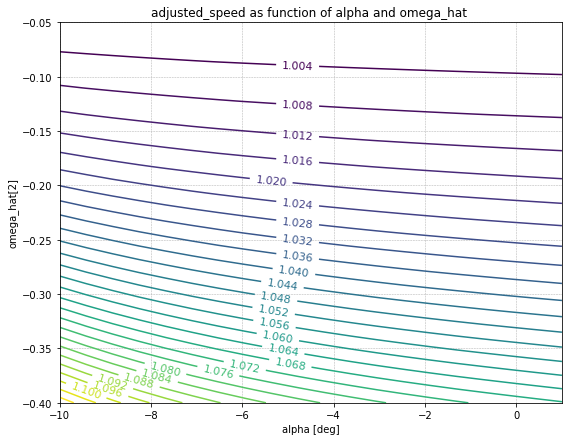

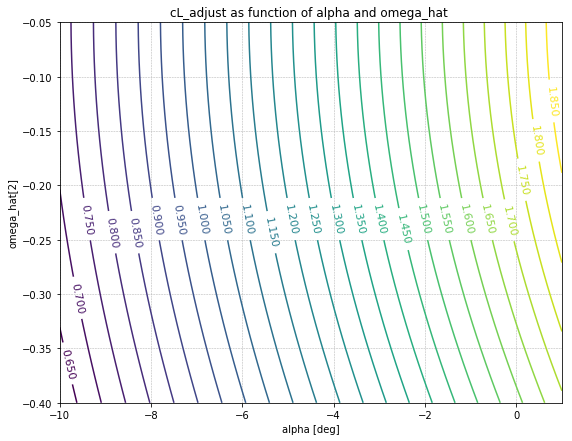

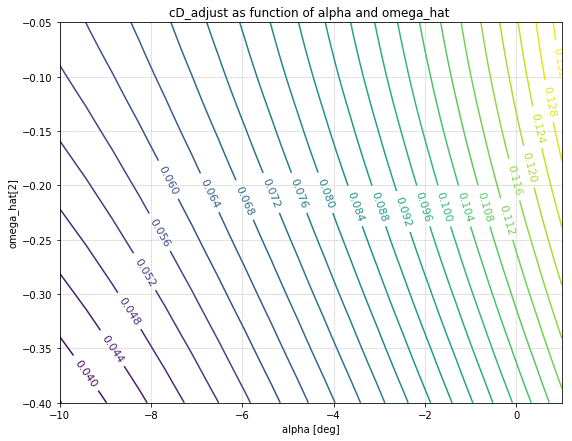

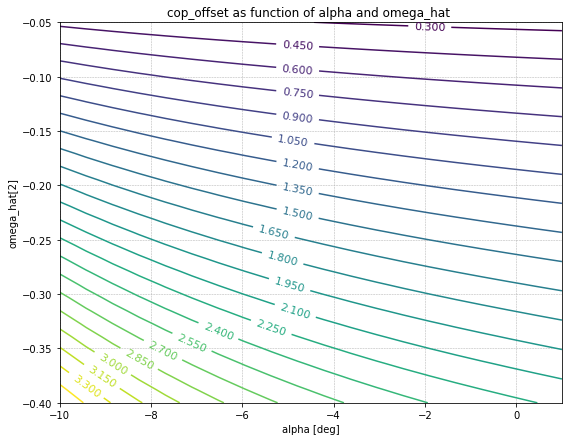

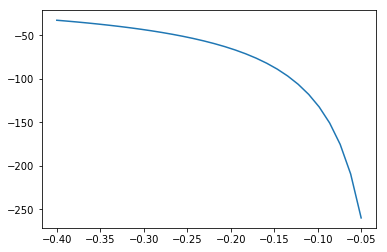

In [ ]:
omega_hat_linspace = (-0.4, -0.05, 30)
alpha_linspace = (-10., 1., 20)# (0., 0., 1)#

omega_plt = OmegaSweep(
    override_config, alpha_linspace, (0., 0.000, 0.), omega_hat_linspace, 2,
    plot_by_radius=None,
    keys=['zeta', 'zeta_adjust', 'coeff_adjuster', 'adjusted_speed', 'cL_adjust', 'cD_adjust', 'cop_offset'])

alphas = np.linspace(*alpha_linspace)
omega_hat_zs = np.linspace(*omega_hat_linspace)
rs = 26. / (2. * omega_hat_zs)
plt.figure()
plt.plot(omega_hat_zs, rs)
# pp(rs)
# for k, fig in omega_plt.iteritems():
#   ax = fig.get_axes()[0]
#   ax2 = ax.twinx()
#   ax2.set_ylim((min(rs), max(rs)))
  # ct = ax.contour(alphas, omega_hat_zs, rs)
  # ax.clabel(ct, inline=1, fontsize=11)

In [ ]:
#@title Make Elevation & Azimuth Positions

incl_sweep = np.linspace(0., np.pi/2., 50)
azi_sweep = np.linspace(-np.pi/6., np.pi/6., 3)

path_params = {'type': 'circle',
               'r_loop': 0.01,
               'num_pos': 4}

positions_ele = []

for incl in incl_sweep:
  path_location_params = {'incl': incl,
                          'azim': 0.}
  path = kite_path.KitePath(
      path_params, path_location_params, simple_config)
  for position in path.positions:
    position['r_curv'] = 10000.
  positions_ele.append(path.positions[2])


In [ ]:
#@title Pose Optimization Functions
def optimize_pose(
    position, resource, config, inputs,
    var='v_a', init_guess=50., opt_var='power', opt_max=True):
  
  def eval_pose_net(lift_roll_angle):
    inputs['lift_roll_angle'] = lift_roll_angle
    pose = kite_pose.KitePose(
        position, resource, config, **inputs)
    pose.solve()

    for c in pose.state['constraints']:
          if c['name'] == 'net_margin':
            out = c['value']
    return out

  def eval_pose_var(v):
    inputs[var] = v
    # print round(v,3),

    # Optimize to find the lift_roll_angle that best meets the force
    # balance. The bracket specifies the initial steps.
    result = minimize_scalar(
        eval_pose_net, bounds=(-math.pi, math.pi), tol=0.0001,
        bracket=(-0.25, -0.2), options={'maxiter': 12},
        method='bounded')
    pose = kite_pose.KitePose(
      position, resource, config, **inputs)
    pose.solve()

    sign = -1. if opt_max else 1.
    return sign * pose.state[opt_var]
  result = minimize_scalar(
      eval_pose_var, tol=0.0001,
      bounds=(20., 200.),
      bracket=(init_guess, 1.01*init_guess),
      method='bounded'
  )

  # Create the final pose to extract the data out of.
  pose = kite_pose.KitePose(
      position, resource, config, **inputs)
  pose.solve()
  return pose

def GetConfigAlphaBetaAtAero(
    config, c_l, c_y,
    alpha_bounds=(-15., 15.), beta_bounds=(-5., 5.)):

  def aero_coeff_error(alpha_beta):
    alpha, beta = alpha_beta
    state = {'alpha': alpha,
            'beta': beta}
    state.update(config['body_coeff_from_alpha_beta'](alpha, beta))
    kite_pose.KitePose._aero_coeff_from_body_coeff(state)
    kite_pose.KitePose._apply_aero_offsets(state, config)
    state['cD'] += config['cD_eff_tether']
    cL, cD, cY = state['cL'], state['cD'], state['cY']
    return max(abs(cL - c_l), abs(cY - c_y))

  return minimize(aero_coeff_error, (0., 0.), bounds=(alpha_bounds, beta_bounds))['x']



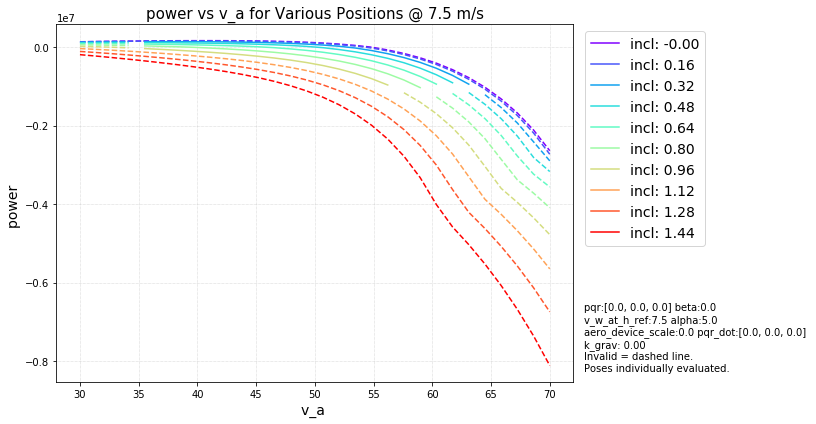

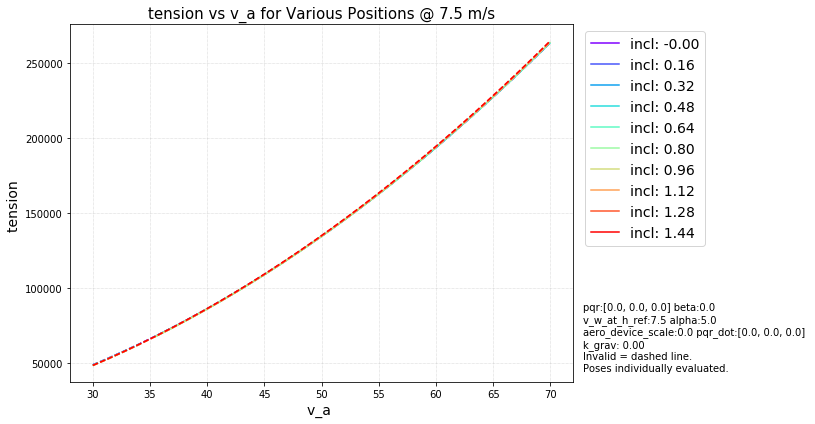

In [ ]:
#@title Plot airspeed sweep vs elevation
temp_plot = kite_loop.plot_var_sweep(
    positions_ele, sea_level_no_shear, m600,
    accel_along_path=None, k_grav=0., grav_mult=0.00001,
    vars_to_plot=['power', 'tension'],
    alpha=5., beta=0.,
    var_range=(30., 70., 30),
    every_nth=5, legend_key='incl', v_w_at_h_ref=7.5)

In [ ]:
#@title Position sweep elevation
keys = ['power',
        'rotor_force',
        'drag_kite', 'lift',
        'lift_roll_angle',
        'tension',
        'azim',
        'v_a',
        'v_w',
        'cL', 'cY', 'cD']

out_ele = {}
for k in keys:
  out_ele[k] = np.zeros(len(incl_sweep))

print 'Solving...'
for ii, position in enumerate(positions_ele):
  print round(position['incl'], 3),
  inputs = {
      'alpha': 0.,
      'beta': 0.,
      'v_a': 50.,
      'accel_along_path': 0.,
      'pqr': np.array([0., 0., 0.]),
      'pqr_dot': np.array([0., 0., 0.]),
      'v_w_at_h_ref': 7.5,
      'grav_mult': 0.001}
  pose = optimize_pose(
      position, sea_level_no_shear, simple_config, inputs,
      var='v_a',
      opt_var='power', opt_max=True)

  for k in keys:
    out_ele[k][ii] = pose.state[k]


Solving...
-0.0 0.032

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/optimize/_minimize.py:761: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)


 0.064 0.096 0.128 0.16 0.192 0.224 0.256 0.288 0.321 0.353 0.385 0.417 0.449 0.481 0.513 0.545 0.577 0.609 0.641 0.673 0.705 0.737 0.769 0.801 0.833 0.866 0.898 0.93 0.962 0.994 1.026 1.058 1.09 1.122 1.154 1.186 1.218 1.25 1.282 1.314 1.346 1.378 1.41 1.443 1.475 1.507 1.539 1.571


In [ ]:
#@title Position sweep turning effort

sea_level_no_shear = resources.MakeResourceByShearAndHref(0.0, 80.)

r_curvs = np.linspace(50., simple_config['l_tether']*0.7, 20)
k_curvs = 1./r_curvs
# k_curvs = np.linspace(-0.015, 0.02, 40)
# r_curvs = 1./k_curvs 

keys = ['power',
        'lift_roll_angle',
        'tension',
        'azim',
        'v_a', 'v_k',
        'v_w']

out_r_curv = {}
for k in keys:
  out_r_curv[k] = np.zeros(len(r_curvs))

print 'Solving...'
for ii, r_curv in enumerate(r_curvs):
  print round(r_curv, 3),
  temp_path_location_params = {
      'incl': 0., 'azim': 0.}
  temp_path_shape_params = {
      'type': 'circle',
      # 'r_loop': np.arcsin(np.deg2rad(30.)) * override_config['l_tether'],
      'r_loop': r_curv,
      'num_pos': 8}
  temp_path = kite_path.KitePath(
      temp_path_shape_params, temp_path_location_params, simple_config)

  position = temp_path.positions[6]

  inputs = {
      'alpha': 0.,
      'beta': 0.,
      'v_a': 50.,
      'accel_along_path': 0.,
      'pqr': np.array([0., 0., 0.]),
      'pqr_dot': np.array([0., 0., 0.]),
      'v_w_at_h_ref': 7.5,
      'grav_mult': 0.0001}
  pose = optimize_pose(
      position, sea_level_no_shear, simple_config, inputs, init_guess=30.,
      opt_var='power', opt_max=True)

  for k in keys:
    out_r_curv[k][ii] = pose.state[k]

Solving...
50.0 58.421 66.842 75.263 83.684 92.105 100.526 108.947 117.368 125.789 134.211 142.632 151.053 159.474 167.895 176.316 184.737 193.158 201.579 210.0


57.75
49.552099943694046
50.0


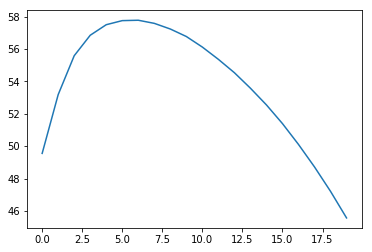

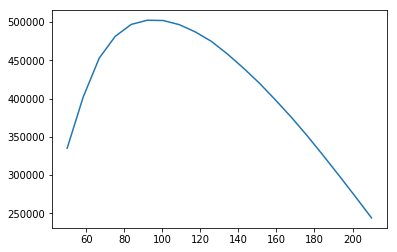

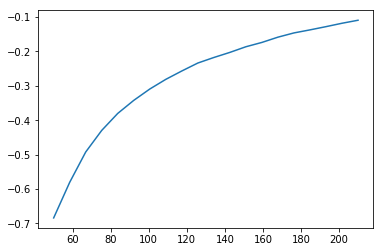

In [ ]:
#@title Plot debugging stuff
plt.plot(out_r_curv['v_a'])
# plt.plot(out_ele['v_a'][0:20]/(np.cos(incl_sweep[0:20])* out_ele['v_w'][0:20]))

plt.figure()
plt.plot(r_curvs, out_r_curv['power'])
plt.figure()
plt.plot(r_curvs, out_r_curv['lift_roll_angle'])

print 11.55*(2./3.)*7.5
print out_r_curv['v_a'][0]
print r_curvs[0]

72.0

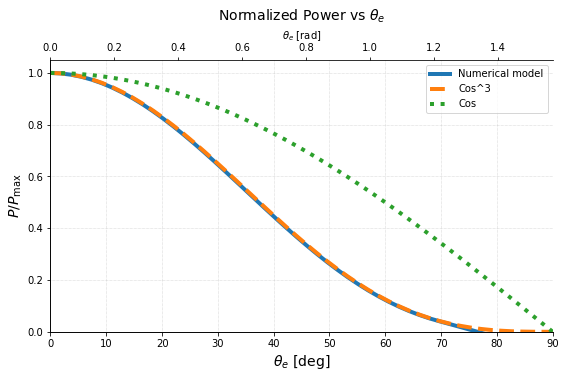

In [ ]:
#@title Plot Ele Sweep
tension_factor = (
    out_ele['tension'] * out_ele['v_w'] / out_ele['power'])

plt.figure(figsize=(9,5), frameon=False)
plt.title(r'Normalized Power vs $\theta_e$', size=14, y=1.125)
plt.ylabel(r'$P/P_\mathrm{max}$', size=14)
plt.xlabel(r'$\theta_e$ [deg]', size=14)
plt.ylim((0,1.05))
plt.xlim((0,90))
plt.plot(np.rad2deg(incl_sweep),
         np.array(out_ele['power'])/max(out_ele['power']),
         linewidth=4, label='Numerical model')
plt.plot(np.rad2deg(incl_sweep), map(lambda i: math.cos(i)**3, incl_sweep ),
         label='Cos^3', linestyle='--', linewidth=4)
plt.plot(np.rad2deg(incl_sweep), map(lambda i: math.cos(i), incl_sweep ),
         label='Cos', linestyle=':', linewidth=4)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend()
plt.grid(linewidth=0.5, linestyle=':')

secax = plt.twiny(ax)
secax.set_xlim(0., np.pi/2)
# secax = ax.secondary_xaxis('top', functions=(np.deg2rad, np.rad2deg))
secax.set_xlabel(r'$\theta_e$ [rad]')


secax.spines['right'].set_visible(False)
# secax.spines['left'].set_visible(False)

plt.gcf().get_dpi()


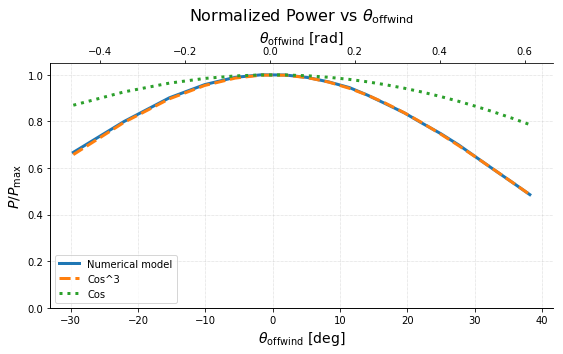

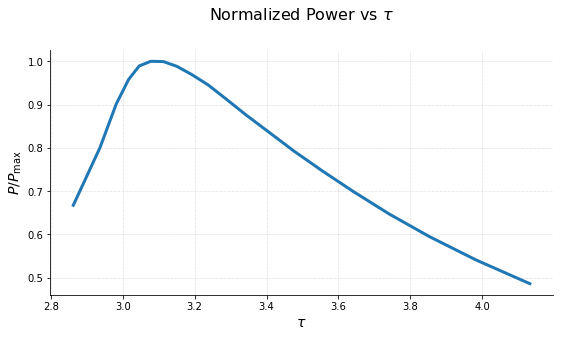

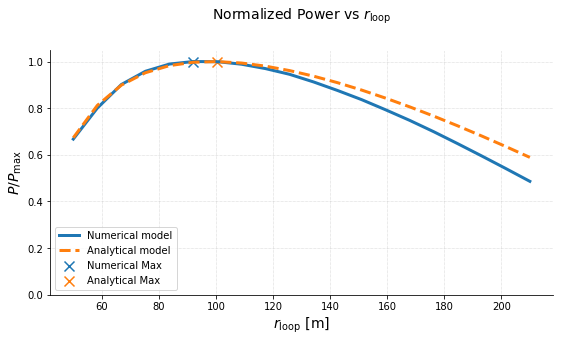

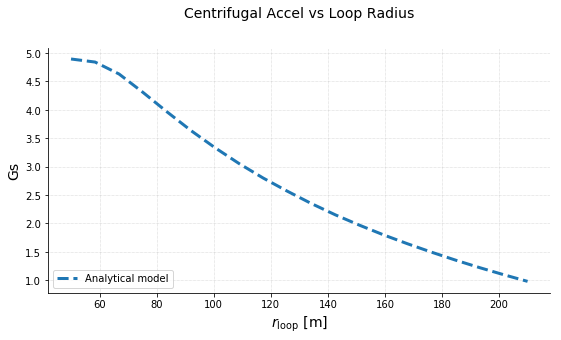

In [ ]:
#@title Plot R_curv Sweep
angle_to_wind = out_r_curv['lift_roll_angle'] + out_r_curv['azim']
tension_factor = (
    out_r_curv['tension'] * out_r_curv['v_w']
    / out_r_curv['power'])

c_turns = C_turn(simple_config, 0., 0., 1.225, r_curvs)
centrips = out_r_curv['v_k']**2/r_curvs

#-----------------------------------------------------------
plt.figure(figsize=(9,4.5))
plt.title(r'Normalized Power vs $\theta_\mathrm{offwind}$', size=16, y=1.15)
plt.ylabel(r'$P/P_\mathrm{max}$', size=14)
plt.xlabel(r'$\theta_\mathrm{offwind}$ [deg]', size=14)
plt.ylim((0,1.05))
# plt.xlim((-90,90))
plt.plot(np.rad2deg(angle_to_wind),
         np.array(out_r_curv['power'])/max(out_r_curv['power']),
         linewidth=3, label='Numerical model')
plt.plot(np.rad2deg(angle_to_wind),
         map(lambda i: math.cos(i)**3,
             out_r_curv['lift_roll_angle'] + out_r_curv['azim']),
         label='Cos^3', linestyle='--', linewidth=3)
plt.plot(np.rad2deg(angle_to_wind),
         map(lambda i: math.cos(i),
             out_r_curv['lift_roll_angle'] + out_r_curv['azim']),
         label='Cos', linestyle=':', linewidth=3)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend()
plt.grid(linewidth=0.5, linestyle=':')

secax = plt.twiny(ax)
secax.set_xlim(min(angle_to_wind), max(angle_to_wind))
secax.set_xlabel(r'$\theta_\mathrm{offwind}$ [rad]', size=14)
secax.spines['right'].set_visible(False)

#-----------------------------------------------------------
plt.figure(figsize=(9,4.5), frameon=False)
plt.title(r'Normalized Power vs $\tau$', size=16, y=1.1)
plt.ylabel(r'$P/P_\mathrm{max}$', size=14)
plt.xlabel(r'$\tau$', size=14)

plt.plot(tension_factor,
         np.array(out_r_curv['power'])/max(out_r_curv['power']),
         linewidth=3, label='Numerical model')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(linewidth=0.5, linestyle=':')

#-----------------------------------------------------------
plt.figure(figsize=(9,4.5), frameon=False)
plt.title(r'Normalized Power vs $r_\mathrm{loop}$', size=14, y=1.1)
plt.ylabel(r'$P/P_\mathrm{max}$', size=14)
plt.xlabel(r'$r_\mathrm{loop}$ [m]', size=14)
plt.ylim((0,1.05))
plt.plot(r_curvs,
         np.array(out_r_curv['power'])/max(out_r_curv['power']),
         linewidth=3, label='Numerical model')
plt.plot(r_curvs, c_turns,
        linewidth=3, linestyle='--', label='Analytical model')
max_power_num_idx = np.nonzero(out_r_curv['power']==max(out_r_curv['power']))
max_power_anal_idx = np.nonzero(c_turns==max(c_turns))
plt.scatter(r_curvs[max_power_num_idx], 1.,
         marker='x', s=100, c='C0', label='Numerical Max')
plt.scatter(r_curvs[max_power_anal_idx], 1.,
         marker='x', s=100, c='C1',label='Analytical Max')
         
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(loc=3)
plt.grid(linewidth=0.5, linestyle=':')

#-----------------------------------------------------------
plt.figure(figsize=(9,4.5), frameon=False)
plt.title(r'Centrifugal Accel vs Loop Radius', size=14, y=1.1)
plt.ylabel('Gs', size=14)
plt.xlabel(r'$r_\mathrm{loop}$ [m]', size=14)
plt.plot(r_curvs, centrips/utils.Const.G,
        linewidth=3, linestyle='--', label='Analytical model')
         
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(loc=3)
plt.grid(linewidth=0.5, linestyle=':')

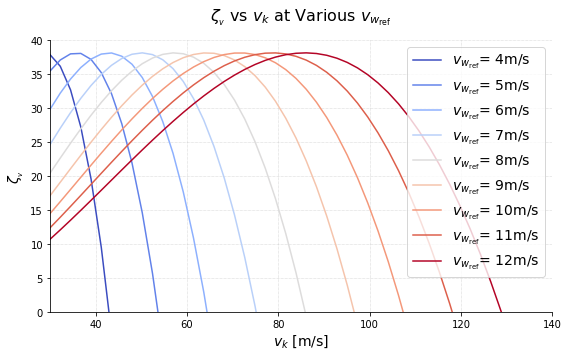

In [ ]:
#@title Plot Zeta_v

v_ks = np.linspace(30., 140.)
theta = 0.45
v_ws = np.linspace(4., 12., 9)
v_k_min = 30.
k_gravs = np.array((0.5, 0.75, 1.))
r_loop = 80.

plt.figure(figsize=(9,5))
plt.title('$\zeta_{_v}$ vs $v_k$ at Various $v_{w_\mathrm{ref}}$', size=16, y=1.05)
plt.xlabel('$v_k$ [m/s]', size=14)
plt.ylabel('$\zeta_{_v}$', size=14)

alpha, beta = 0., 0.
temp_o = {'z': [],
          'p': []}
for v_w in v_ws:
  v_w_theta = v_w * np.cos(theta)
  zeta = ZetaV(simple_config, alpha, beta, v_ks, v_w_theta)
  temp_o['z'].append(zeta)
  temp_o['p'].append(0.5 * 1.225 * simple_config['s'] * zeta * v_w_theta**3)
for ii, v_w in enumerate(v_ws):
  plt.plot(v_ks, temp_o['z'][ii],
           color=cm.coolwarm(float(ii)/(len(v_ws)-1)),
           label=r'$v_{w_{\mathrm{ref}}}$'+'= %dm/s'%v_w)
plt.ylim(0, 40)
plt.xlim(min(v_ks), max(v_ks))
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(linewidth=0.5, linestyle=':')
plt.legend(fontsize=14)

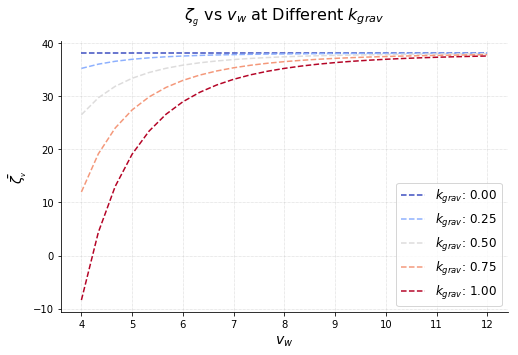

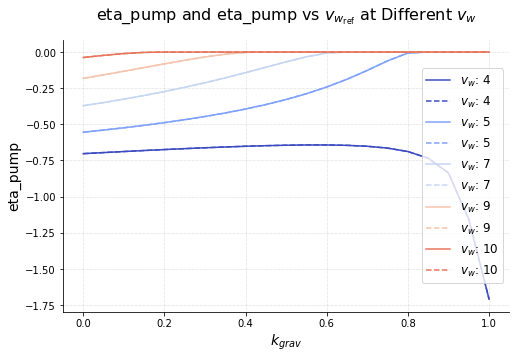

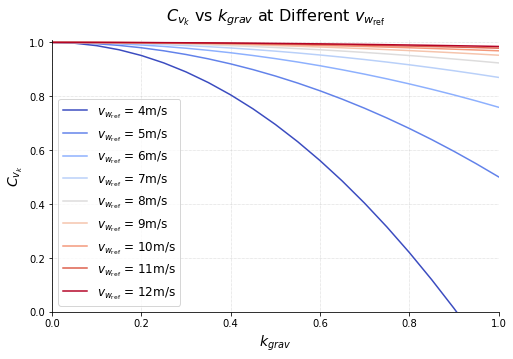

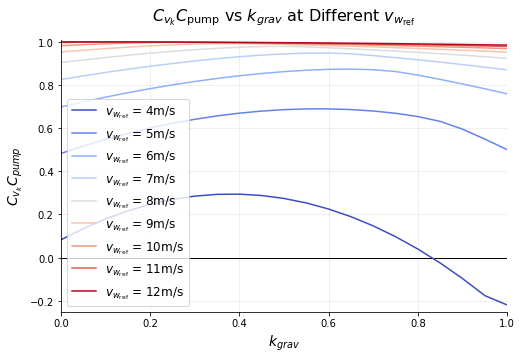

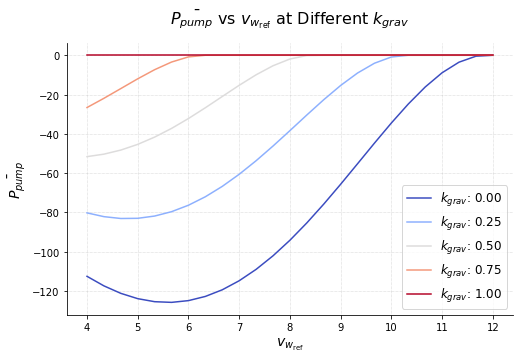

In [ ]:
#@title C_v_k

# def Dt_Dpsi(r_loop, loop_angle, v_km, k_grav, theta):
#   return (r_loop)/(v_k_from_loop_angle(v_km, loop_angles, r_loop, theta, k_grav))

r_loop = 80.
loop_angles = np.linspace(0., 2*math.pi, 50)
theta = 0.45
k_gravs = np.linspace(0., 1., 21)
v_ws = np.linspace(4., 12., 25)
alpha, beta = 0., 0.
g = 9.81
rho = 1.225
eta_t2g = 0.66
temp_kite = copy.deepcopy(simple_config)
temp_kite['v_a_min'] = 30.
shear = 0.

keys = ['zeta_vbars_a', 'C_v_k', 'C_pump', 'p0', 'C_TD', 'C_theta',
        'C_shear', 'C_turn', 'C_thrust', 'C_pump_max', 'eta_pump', 'P_pump_max', 'P_pump', 'P_thrust']
temp_out = {}
for k in keys:
  temp_out[k] = np.zeros((len(k_gravs), len(v_ws)))

# plt.figure(figsize=(9,6))
for ii, k_grav in enumerate(k_gravs):
  for jj, v_w in enumerate(v_ws):
    v_w_eff = VwEff(temp_kite, theta, shear, v_w)
    v_km = VkL(
        temp_kite, alpha, beta, v_w_eff)
    d_vk = DeltaVk(r_loop, g, k_grav, theta, v_km)

    # v_km = np.where(
    #   v_km - 0.5* d_vk <= temp_kite['v_a_min'],
    #    0.5 * (
    #       np.sqrt(
    #           temp_kite['v_a_min']**2 + 4. * r_loop * g
    #           * k_grav * np.cos(theta))
    #       + temp_kite['v_a_min']),
    #   v_km)
    
    # # Recompute Dv_k
    # d_vk = DeltaVk(r_loop, g, k_grav, theta, v_km)
    v_ks = Vk_from_Psi(
        v_km, d_vk, loop_angles)
    # plt.plot(loop_angles, v_ks)
    # times = Dt_Dpsi(r_loop, loop_angles, v_km, k_grav, theta)
    # times_int = scipy.integrate.cumtrapz(times, loop_angles)
    # time_tot = scipy.integrate.trapz(times, loop_angles)
    # times_int = np.insert(times_int, 0, 0.)
    # zeta_vs = ZetaV(
    #     temp_kite, alpha, beta, v_ks, v_w_eff)
    # zeta_l = ZetaL(temp_kite, alpha, beta)
    # zeta_0 = Zeta0(temp_kite, alpha, beta)
    # zeta_rs = zeta_vs / zeta_l
    # zeta_avg = scipy.integrate.trapz(zeta_vs, times_int)/time_tot
    # temp_out['zeta_vbars'][ii][jj] = zeta_avg
    zeta_vbar_a = ZetaVBar(
        temp_kite, alpha, beta, k_grav, v_km, d_vk, v_w_eff)
    temp_out['zeta_vbars_a'][ii][jj] = zeta_vbar_a
    c_v_k = C_v_k(temp_kite, alpha, beta, zeta_vbar_a)
    temp_out['C_v_k'][ii][jj] = c_v_k
    p0 = P0(temp_kite, alpha, beta, rho, v_w)
    temp_out['p0'][ii][jj] = p0
    temp_out['C_TD'][ii][jj] = C_TD(temp_kite, alpha, beta)
    temp_out['C_theta'][ii][jj] = C_theta_e(theta)
    temp_out['C_shear'][ii][jj] = C_shear(temp_kite, theta, shear, 80.)
    temp_out['C_turn'][ii][jj] = C_turn(temp_kite, alpha, beta, rho, r_loop)
    temp_out['C_thrust'][ii][jj] = C_thrust(
        temp_out['C_TD'][ii][jj], temp_out['C_theta'][ii][jj], temp_out['C_shear'][ii][jj],
        temp_out['C_turn'][ii][jj], temp_out['C_v_k'][ii][jj], 1.)
    temp_out['P_thrust'][ii][jj] = temp_out['C_thrust'][ii][jj] * p0
    temp_out['P_pump_max'][ii][jj] = PpumpMax(temp_kite, g, theta, k_grav, v_km)
    temp_out['eta_pump'][ii][jj] = EtaPump(
        eta_t2g, temp_out['P_thrust'][ii][jj], temp_out['P_pump_max'][ii][jj])
    temp_out['C_pump'][ii][jj] = C_pump(
        temp_kite, g, theta, temp_out['eta_pump'][ii][jj], k_grav,
        v_km, c_v_k, p0,)
    temp_out['P_pump'][ii][jj] = Ppump(temp_kite, g, theta, temp_out['eta_pump'][ii][jj], k_grav, v_km)

# print temp_out['C_thrust']
# print temp_out['P_pump_max']
# print np.round(temp_out['eta_pump'],2)
# print np.round(temp_out['C_pump'],2)
# print np.round(temp_out['C_v_k'],2)

plt.figure(figsize=(8,5))
plt.title('$\zeta_{_g}$ vs $v_w$ at Different $k_{grav}$',
          size=16, y=1.05)
plt.xlabel('$v_w$', size=14)
plt.ylabel(r'$\bar{\zeta_{_v}}$', size=14)
for ii, k_grav in enumerate(k_gravs):
  if ii % 5 == 0:
    # plt.plot(v_ws, temp_out['zeta_vbars'][ii],
    #         color=cm.coolwarm(float(ii)/(len(k_gravs)-1)),
    #         label='$k_{grav}$: %0.2f'%k_grav)
    plt.plot(v_ws, temp_out['zeta_vbars_a'][ii],
             '--',
            color=cm.coolwarm(float(ii)/(len(k_gravs)-1)),
            label='$k_{grav}$: %0.2f'%k_grav)
plt.legend(fontsize=12)
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(linewidth=0.5, linestyle=':')


# Custom Plot
var_to_plot = 'eta_pump'
var_to_plot2 = 'eta_pump'
plt.figure(figsize=(8,5))
plt.title(var_to_plot + ' and ' + var_to_plot2 + ' vs $v_{w_\mathrm{ref}}$ at Different $v_w$',
          size=16, y=1.05)
plt.xlabel('$k_{grav}$', size=14)
plt.ylabel(var_to_plot, size=14)
for ii, v_w in enumerate(v_ws):
  if ii % 5 == 0:
    plt.plot(k_gravs, temp_out[var_to_plot].T[ii],
             color=cm.coolwarm(float(ii)/(len(v_ws)-1)),
             label='$v_w$: %d'%v_w)
    plt.plot(k_gravs, temp_out[var_to_plot2].T[ii],
             color=cm.coolwarm(float(ii)/(len(v_ws)-1)),
             label='$v_w$: %d'%v_w, linestyle='--')
plt.legend(fontsize=12)
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(linewidth=0.5, linestyle=':')


plt.figure(figsize=(8,5))
plt.title('$C_{v_k}$ vs $k_{grav}$ at Different $v_{w_\mathrm{ref}}$',
          size=16, y=1.05)
plt.xlabel('$k_{grav}$', size=14)
plt.ylabel('$C_{v_k}$', size=14)
for ii, v_w in enumerate(v_ws):
  if ii % 3 == 0:
    plt.plot(k_gravs, temp_out['C_v_k'].T[ii],
             color=cm.coolwarm(float(ii)/(len(v_ws)-1)),
             label='$v_{w_\mathrm{ref}}$ = %dm/s'%v_w)
plt.legend(fontsize=12)
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(linewidth=0.5, linestyle=':')
plt.xlim((0, 1))
plt.ylim((0,1.01))

plt.figure(figsize=(8,5))
plt.title(r'$C_{v_k}C_\mathrm{pump}$ vs $k_{grav}$ at Different $v_{w_\mathrm{ref}}$',
          size=16, y=1.05)
plt.xlabel('$k_{grav}$', size=14)
plt.ylabel('$C_{v_k}C_\mathit{pump}$', size=14)
for ii, v_w in enumerate(v_ws):
  if ii % 3 == 0:
    plt.plot(k_gravs, temp_out['C_pump'].T[ii] * temp_out['C_v_k'].T[ii],
            color=cm.coolwarm(float(ii)/(len(v_ws)-1)),
            label=r'$v_{w_\mathrm{ref}}$ ='+' %dm/s'%v_w)
plt.legend(fontsize=12, loc=3)
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(linewidth=0.5, linestyle=':')
plt.hlines(0., 0., 1., 'k', linewidth=1.)
plt.xlim((0, 1))
plt.ylim((-0.25,1.01))

plt.figure(figsize=(8,5))
plt.title(r'$\bar{P_\mathit{pump}}$ vs $v_{w_\mathrm{ref}}$ at Different $k_{grav}$',
          size=16, y=1.05)
plt.xlabel(r'$v_{w_\mathrm{ref}}$', size=14)
plt.ylabel(r'$\bar{P_\mathit{pump}}$', size=14)
for ii, k_grav in enumerate(k_gravs):
  if ii % 5 == 0:
    # plt.plot(v_ws, temp_out['C_v_k'][ii] *  temp_out['p0'][ii] * (temp_out['C_pump'][ii]  - 1.)/1000.,
    plt.plot(v_ws, temp_out['P_pump'][ii]/1000.,
            color=cm.coolwarm(float(ii)/(len(k_gravs)-1)),
            label='$k_{grav}$: %0.2f'%k_grav)
plt.legend(fontsize=12)
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(linewidth=0.5, linestyle=':')

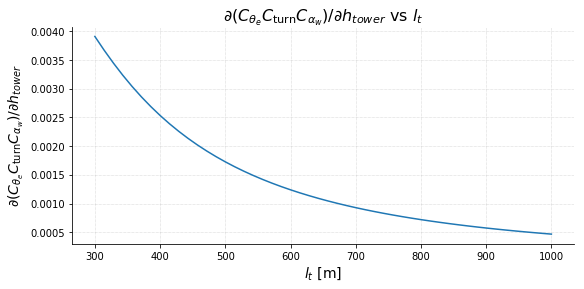

In [ ]:
#@title Tower Effect on Performance
plt.figure(figsize=(9,4))
plt.title(
    r'$\partial \left(C_{\theta_e} C_\mathrm{turn} C_{\alpha_w}\right)/\partial h_{tower}$ vs $l_t$', size=16)
plt.xlabel('$l_t$ [m]', size=14)
plt.ylabel(r'$\partial \left(C_{\theta_e} C_\mathrm{turn} C_{\alpha_w}\right)/ \partial h_{tower}$', size=14)
ds = []
ls = np.linspace(300., 1000., 50) #50
for l in ls:
  hs = np.linspace(-20, 20, 3)
  theta_es = ThetaEMin(80., l, 80., hs)
  c_thetas = C_theta_e(theta_es)
  ds.append((c_thetas[-1] - c_thetas[0])/(hs[-1] - hs[0]))
plt.plot(ls, ds)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(linewidth=0.5, linestyle=':')

In [ ]:
#@title C_turn C_theta_e C_shear vs R_loop & L_tether
#-------------------------------------------------------
r_loops = np.linspace(60., 180., 500)
l_tethers = np.linspace(250., 1000., 60) #60
shear = 1./7.
shear2 = 0.
k_grav = 0.8
out = np.zeros((len(r_loops), len(l_tethers)))
out2 = np.zeros((len(r_loops), len(l_tethers)))
for ii, r in enumerate(r_loops):
  for jj, l in enumerate(l_tethers):
    temp_config = copy.deepcopy(simple_config)
    # temp_config['m_kite'] = 1000.
    temp_config['l_tether'] = l
    # first shear
    theta = ThetaEBest(r, temp_config, shear)
    c_turn = C_turn(temp_config, 0., 0., 1.225, r)
    c_theta = C_theta_e(theta)
    c_shear = C_shear(temp_config, theta, shear, 80.)
    out[ii][jj] = c_turn * c_theta * c_shear
    # repeat for other shear
    theta = ThetaEBest(r, temp_config, shear2)
    c_turn = C_turn(temp_config, 0., 0., 1.225, r)
    c_theta = C_theta_e(theta)
    c_shear = C_shear(temp_config, theta, shear2, 80.)
    out2[ii][jj] = c_turn * c_theta * c_shear
best_rloops = [r_loops[np.argmax(x)] for x in out.T]
best_rloops2 = [r_loops[np.argmax(x)] for x in out2.T]
    


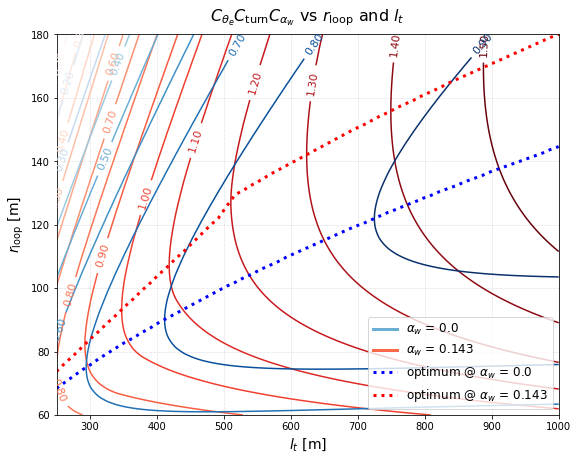

In [ ]:
#@markdown Must run creation cell immediately before this one
plt.figure(figsize=(9,7))
plt.title(r'$C_{\theta_e} C_\mathrm{turn} C_{\alpha_w}$ vs $r_\mathrm{loop}$ and $l_t$', y=1.02, size=16)
plt.xlabel('$l_t$ [m]', size=14)
plt.ylabel('$r_\mathrm{loop}$ [m]', size=14)
plt.plot(l_tethers, best_rloops, c='red', linestyle=':', linewidth=3)
plt.plot(l_tethers, best_rloops2, c='blue', linestyle=':', linewidth=3)
C = plt.contour(l_tethers, r_loops, out,
                levels=np.arange(0., 2.1, 0.1),
                linewidth=4, cmap=plt.cm.Reds)
C2 = plt.contour(l_tethers, r_loops, out2,
                levels=np.arange(0., 1.5, 0.1),
                linewidth=4, cmap=plt.cm.Blues)
ax.clabel(C, inline=1, fontsize=11, fmt='%1.2f')
ax.clabel(C2, inline=1, fontsize=11, fmt='%1.2f')
plt.grid(linewidth=0.5, linestyle=':')
custom_lines = [lines.Line2D([0], [0], color=plt.cm.Blues(0.5), lw=3),
                lines.Line2D([0], [0], color=plt.cm.Reds(0.5), lw=3),
                lines.Line2D([0], [0], color='blue', lw=3, ls=':'),
                lines.Line2D([0], [0], color='red', lw=3, ls=':')]
plt.legend(custom_lines,
           (r'$\alpha_w$ = %0.1f'% shear2,
            r'$\alpha_w$ = %0.3f'% shear,
            r'optimum @ $\alpha_w$ = %0.1f'%shear2,
            r'optimum @ $\alpha_w$ = %0.3f'%shear),
           loc=4, fontsize=12,)
# plt.tight_layout()

In [ ]:
np.linspace(0.0015, 0.0035, 6)

array([0.0015, 0.0019, 0.0023, 0.0027, 0.0031, 0.0035])

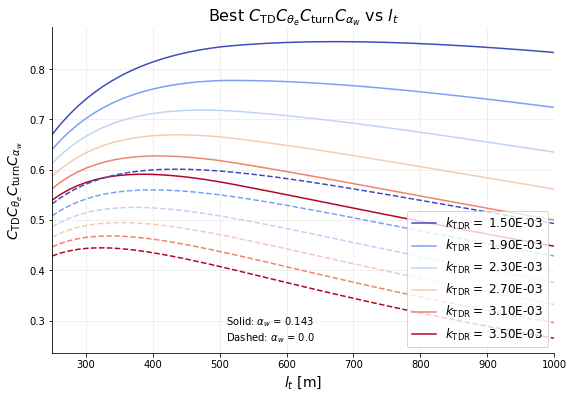

In [ ]:
#@title Best power vs tether length, no induced
l_tethers = np.linspace(250., 1000., 60) #60
k_tethers = np.linspace(0.0015, 0.0035, 6)
shear = 1./7.
#--------------------------------------------------------
plt.figure(figsize=(9,6))
ax = plt.gca()
# ax2 = plt.twinx()
plt.title(r'Best $C_\mathrm{TD} C_{\theta_e} C_\mathrm{turn} C_{\alpha_w}$ vs $l_t$', size=16)
plt.xlabel(r'$l_t$ [m]', size=14)
plt.ylabel(r'$C_\mathrm{TD} C_{\theta_e} C_\mathrm{turn} C_{\alpha_w}$', size=14)

for cc, k in enumerate(k_tethers):
  out = np.zeros(len(l_tethers))
  rs = np.zeros(len(l_tethers))
  c = cm.coolwarm(float(cc) / (len(k_tethers)-1))
  for ii, l in enumerate(l_tethers):
    temp_config = copy.deepcopy(simple_config)
    temp_config['l_tether'] = l
    # temp_config['h_min'] = 40.

    def f(r):
      theta = ThetaEBest(r, temp_config, shear)
      c_td = C_TD(temp_config, 0., 0., k_tdr=k)
      c_turn = C_turn(temp_config, 0., 0., 1.225, r)
      c_theta = C_theta_e(theta)
      c_shear = C_shear(temp_config, theta, shear, 80.)
      return -c_td * c_turn * c_theta * c_shear

    rs[ii] = scipy.optimize.minimize_scalar(
        f, bounds=(50., 300.), bracket=(100., 130.),
        method='bounded')['x']
    out[ii] = -f(rs[ii])
    
  ax.plot(l_tethers, out, label=r'$k_\mathrm{TDR}=$ %0.2E'%k, c=c)
  # ax2.plot(l_tethers, rs, label='')
shear = 0.
for cc, k in enumerate(k_tethers):
  out = np.zeros(len(l_tethers))
  rs = np.zeros(len(l_tethers))
  c = cm.coolwarm(float(cc) / (len(k_tethers)-1))
  for ii, l in enumerate(l_tethers):
    temp_config = copy.deepcopy(simple_config)
    temp_config['l_tether'] = l
    # temp_config['h_min'] = 40.

    def f(r):
      theta = ThetaEBest(r, temp_config, shear)
      c_td = C_TD(temp_config, 0., 0., k_tdr=k)
      c_turn = C_turn(temp_config, 0., 0., 1.225, r)
      c_theta = C_theta_e(theta)
      c_shear = C_shear(temp_config, theta, shear, 80.)
      return -c_td * c_turn * c_theta * c_shear

    rs[ii] = scipy.optimize.minimize_scalar(
        f, bounds=(50., 300.), bracket=(100., 130.),
        method='bounded')['x']
    out[ii] = -f(rs[ii])
    
  # ax.plot(l_tethers, out, label='k_t_drag: %0.1E'%k)
  # if k == 0.003:
  #   old_out = np.array(out)
  ax.plot(l_tethers, out, '--', c=c)#, label='k_t_drag: %0.3f @ zero shear'%k)
  # ax2.plot(l_tethers, rs, ':', label='')

plt.xlim((min(l_tethers), max(l_tethers)))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linewidth=0.5, linestyle=':')
ax.text(510, 0.26, r'Solid: $\alpha_w$ = 0.143'+'\n'+ r'Dashed: $\alpha_w$ = 0.0')
ax.legend(loc=4, fontsize=12)

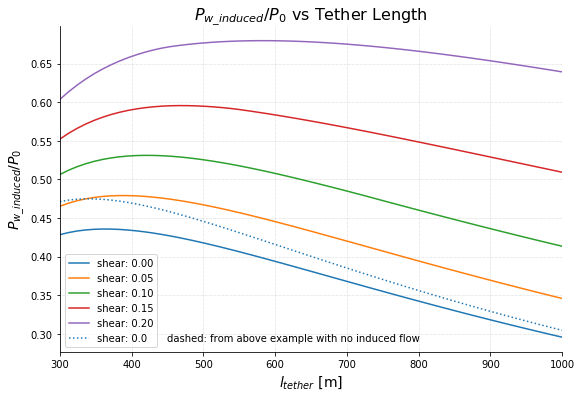

In [ ]:
#@title Best power vs tether length, with induced
#--------------------------------------------------------
plt.figure(figsize=(9,6))
ax = plt.gca()
# ax2 = plt.twinx()
plt.title(r'$P_{w\_induced}/P_0$ vs Tether Length', size=16)
plt.xlabel(r'$l_{tether}$ [m]', size=14)
plt.ylabel(r'$P_{w\_induced}/P_0$', size=14)

out = np.zeros(len(l_tethers))
rs = np.zeros(len(l_tethers))
shears = np.arange(0., 0.25, 0.05)
l_tethers = np.linspace(300., 1000., 60)
for shear in shears:
  for ii, l in enumerate(l_tethers):
    temp_config = copy.deepcopy(simple_config)
    temp_config['cD_eff_tether'] = (
        0.25 * l * 0.019961 / temp_config['s']) # force the k_tdr to be 0.003
    temp_config['l_tether'] = l
    zeta = makani_FBL.calc_loyd(
      temp_config, 0., 0.)[0]
    zeta_0 = makani_FBL.calc_loyd(
      temp_config, 0., 0., model_tether_drag=False)[0]

    def f(r):
      theta = best_elevation(r, temp_config, shear)
      p_f = C_turn(r, temp_config, 0., 0., theta,
                      80., shear, 1.225)
      s_swept = S_swept(theta, r, temp_config['b'])

      return -P_ratio_with_induced(
          s_swept, p_f, 1., zeta, zeta_0, temp_config['s'])

    rs[ii] = scipy.optimize.minimize_scalar(
        f, bounds=(60., 300.), bracket=(100., 130.),
        method='bounded')['x']
    out[ii] = -f(rs[ii])
    
  ax.plot(l_tethers, out, label='shear: %0.2f'%shear)
ax.plot(l_tethers, old_out, color='C0', linestyle=':', label='shear: 0.0')
ax.text(450, 0.29, 'dashed: from above example with no induced flow')
plt.xlim((min(l_tethers), max(l_tethers)))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linewidth=0.5, linestyle=':')
ax.legend()

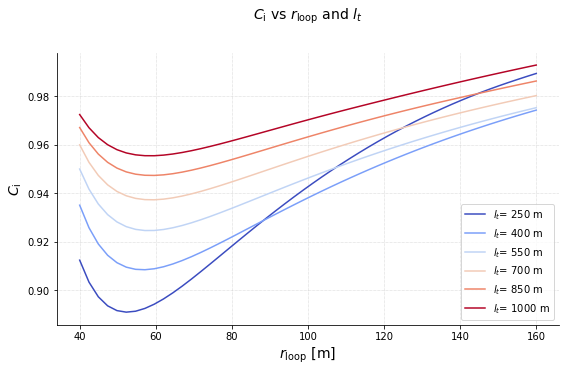

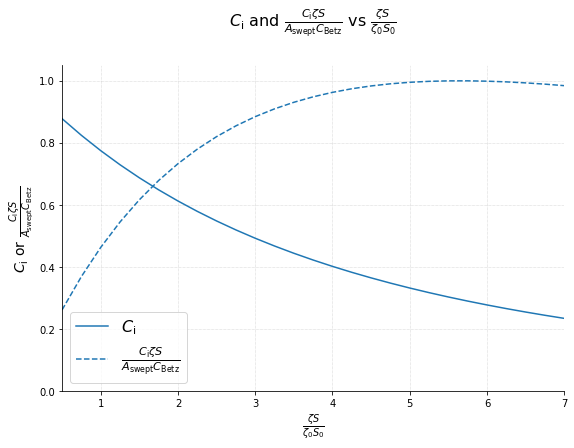

In [ ]:
#@title Power w/Induced flow

rho = 1.225
eta_hawt = 0.85


plt.figure(figsize=(9,5), frameon=False)
plt.title(r'$C_\mathrm{i}$ vs $r_\mathrm{loop}$ and $l_t$', size=14, y=1.1)
plt.ylabel(r'$C_\mathrm{i}$', size=14)
plt.xlabel(r'$r_\mathrm{loop}$ [m]', size=14)
r_loops = np.linspace(40., 160., 50)
l_tethers = np.linspace(250., 1000., 6)
for ii, l in enumerate(l_tethers):
  temp_config = copy.deepcopy(simple_config)
  temp_config['l_tether'] = l
  o = []
  for r in r_loops:
    result = P(temp_config, 0., 0., r, 80., 0., 1.225, 9.81, 9., 0.66, 1., induced=True,)
    o.append(result['C_i'])
  o = np.array(o)
  c = cm.coolwarm(float(ii)/(len(l_tethers)-1.))
  plt.plot(r_loops, o, color=c, label=r'$l_t$= %d m'%l)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend()
plt.grid(linewidth=0.5, linestyle=':')

#--------------------------------------------------------
plt.figure(figsize=(9,6), frameon=False)
plt.title(r'$C_\mathrm{i}$ and $\frac{C_\mathrm{i}\zeta S}{A_\mathrm{swept} C_\mathrm{Betz}}$ vs $\frac{\zeta S}{\zeta_0 S_0}$', size=16, y=1.1)
plt.ylabel(r'$C_\mathrm{i}$ or $\frac{C_\mathrm{i}\zeta S}{A_\mathrm{swept} C_\mathrm{Betz}}$', size=14)
plt.xlabel(r'$\frac{\zeta S}{\zeta_0 S_0}$', size=14)
ax = plt.gca()
num_wings = np.arange(0.5, 7.25, 0.25)
m, cc = 1., 1
o = []
for ii, num_wing in enumerate(num_wings):
  r = 80. - temp_config['b']
  temp_config = copy.deepcopy(simple_config)
  temp_config['l_tether'] = 0.
  temp_config['s'] *= num_wing * m
  temp_config['gs_position'][2] = 80.
  result = P_HAWT(temp_config, alpha, beta, eta_hawt, r, rho, 0., 80., 9.)
  o.append(result)
  c = 'C0'#cm.coolwarm(float(cc)/(len(perf_idxs)-1.))
o = utils.ld_to_dl(o)
for k, v in o.iteritems():
  o[k] = np.array(v)

plt.plot(num_wings, o['C_i'],
          color=c, label='$C_\mathrm{i}$')
plt.plot(num_wings, o['C_iZS/C_betz'],
          color=c, linestyle='--',
          label=r'$\frac{C_\mathrm{i}\zeta S}{A_\mathrm{swept} C_\mathrm{Betz}}$')
plt.ylim(0., 1.05)
plt.xlim((min(num_wings), max(num_wings)))
ax.grid(linewidth=0.5, linestyle=':')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(fontsize=16)




Text(2.6,0.05,'Solid: w/$C_\\mathrm{i}$\nDashed: w/o $C_\\mathrm{i}$')

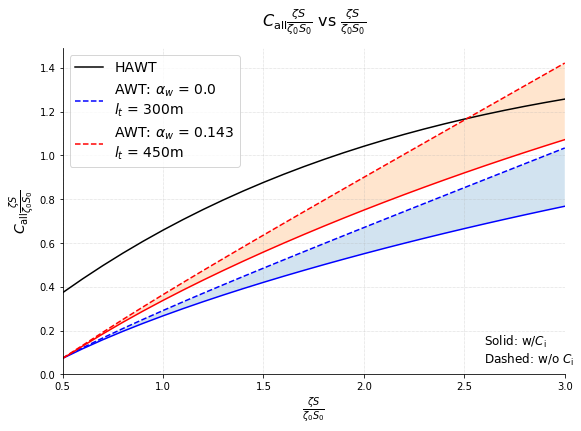

In [ ]:

rho = 1.225
eta_hawt = 0.85
r_loop = 80.

shear = 1./7.

#--------------------------------------------------------

num_wings = np.arange(0.5, 3.1, 0.1)
o = {'hawt': [],
     'awt': [],
     'awt_i': [],
     'awt_shear': [],
     'awt_shear_i': []}
for ii, num_wing in enumerate(num_wings):
  # HAWT result
  temp_config = copy.deepcopy(simple_config)
  r = 80. - temp_config['b']
  temp_config['l_tether'] = 0.
  temp_config['s'] *= num_wing
  temp_config['gs_position'][2] = 80.
  result_hawt = P_HAWT(temp_config, alpha, beta, eta_hawt, r, rho, 0., 80., 9.)
  o['hawt'].append(result_hawt)

  # AWT result no shear no induced
  temp_config = copy.deepcopy(simple_config)
  temp_config['s'] *= num_wing
  temp_config['tension_max'] *= num_wing
  temp_config['t_tether'] *= np.sqrt(num_wing)

  result_awt = P(
      temp_config, 0., 0., r_loop, 80., 0., rho, 9.81, 9., 0.66, 1.,
      induced=False)
  o['awt'].append(result_awt)

  # AWT result no shear yes induced
  result_awt = P(
      temp_config, 0., 0., r_loop, 80., 0., rho, 9.81, 9., 0.66, 1.,
      induced=True)
  o['awt_i'].append(result_awt)

  # AWT result yes shear no induced
  temp_config['l_tether'] = 450.
  result_awt = P(
      temp_config, 0., 0., r_loop, 80., shear, rho, 9.81, 9., 0.66, 1.,
      induced=False)
  o['awt_shear'].append(result_awt)

  # AWT result yes shear yes induced
  result_awt = P(
      temp_config, 0., 0., r_loop, 80., shear, rho, 9.81, 9., 0.66, 1.,
      induced=True)
  o['awt_shear_i'].append(result_awt)
  c = 'C0'#cm.coolwarm(float(cc)/(len(perf_idxs)-1.))

for k, v in o.iteritems():
  o[k] = utils.ld_to_dl(v)
  for kk, vv in o[k].iteritems():
    o[k][kk] = np.array(vv)

plt.figure(figsize=(9,6), frameon=False)
plt.title(r'$C_\mathrm{all}\frac{\zeta S}{\zeta_0 S_0}$ vs $\frac{\zeta S}{\zeta_0 S_0}$', size=16, y=1.05)
plt.ylabel(r'$C_\mathrm{all}\frac{\zeta S}{\zeta_0 S_0}$', size=14)
plt.xlabel(r'$\frac{\zeta S}{\zeta_0 S_0}$', size=14)
ax = plt.gca()
plt.plot(num_wings, o['hawt']['C_all']*num_wings,
         label='HAWT', color='k')
plt.plot(num_wings, o['awt']['C_all']*num_wings,
         label=r'AWT: $\alpha_w$ = 0.0'+'\n'+'$l_t$ = 300m', linestyle='--', color='b')
plt.plot(num_wings, o['awt_i']['C_all']*num_wings,
         linestyle='-', color='b')
plt.fill_between(num_wings, o['awt_i']['C_all']*num_wings, o['awt']['C_all']*num_wings, alpha=0.2)
plt.plot(num_wings, o['awt_shear']['C_all']*num_wings,
         label=r'AWT: $\alpha_w$ = 0.143'+'\n'+'$l_t$ = 450m', linestyle='--', color='r')
plt.plot(num_wings, o['awt_shear_i']['C_all']*num_wings,
         linestyle='-', color='r')
plt.fill_between(num_wings, o['awt_shear_i']['C_all']*num_wings, o['awt_shear']['C_all']*num_wings, alpha=0.2)

plt.ylim(0.,None)#2.05)
plt.xlim((min(num_wings), max(num_wings)))
ax.grid(linewidth=0.5, linestyle=':')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(fontsize=14)
plt.text(2.6, 0.05, r'Solid: w/$C_\mathrm{i}$'+'\n' + r'Dashed: w/o $C_\mathrm{i}$', size=12)


[1. 2. 3. 4.]


Text(2.1,0.05,'Solid: w/$C_\\mathrm{i}$\nDashed: w/o $C_\\mathrm{i}$\n$\\alpha_w$ = 0.143')

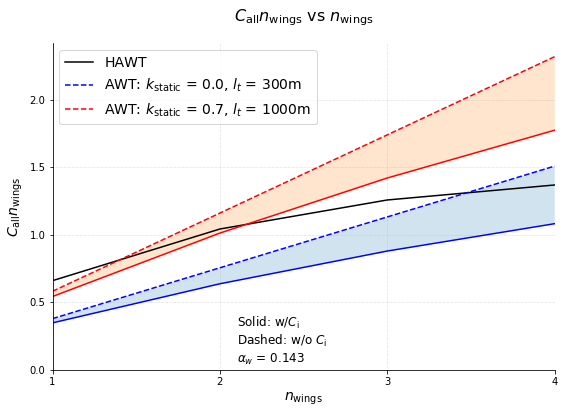

In [ ]:
#@title Multikites
rho = 1.225
eta_hawt = 0.85
r_loop = 100.

shear = 1./7.
l_t = 1000.
static_tether_ratio = 1. - 300./l_t

#--------------------------------------------------------

num_wings = np.arange(1., 5., 1.)
o = {'hawt': [],
     'awt': [],
     'awt_i': [],
     'awt_static': [],
     'awt_static_i': []}
for ii, num_wing in enumerate(num_wings):
  # HAWT result
  temp_config = copy.deepcopy(simple_config)
  r = 80. - temp_config['b']
  temp_config['l_tether'] = 0.
  temp_config['s'] *= num_wing
  temp_config['gs_position'][2] = 80.
  result_hawt = P_HAWT(temp_config, alpha, beta, eta_hawt, r, rho, 0., 80., 9.)
  o['hawt'].append(result_hawt)

  # AWT result no static no induced
  r_loop = 80.
  temp_config = copy.deepcopy(simple_config)
  # temp_config['l_tether'] = l_t

  result_awt = P(
      temp_config, 0., 0., r_loop, 80., shear, rho, 9.81, 9., 0.66, 1.,
      induced=False, multi=num_wing)
  o['awt'].append(result_awt)

  # AWT result no static yes induced
  result_awt = P(
      temp_config, 0., 0., r_loop, 80., shear, rho, 9.81, 9., 0.66, 1.,
      induced=True, multi=num_wing)
  o['awt_i'].append(result_awt)

  # AWT result yes static no induced
  r_loop = 100.
  temp_config['l_tether'] = l_t#450.
  result_awt = P(
      temp_config, 0., 0., r_loop, 80., shear, rho, 9.81, 9., 0.66, 1.,
      induced=False, static_tether_ratio=static_tether_ratio, multi=num_wing)
  o['awt_static'].append(result_awt)

  # AWT result yes static yes induced
  result_awt = P(
      temp_config, 0., 0., r_loop, 80., shear, rho, 9.81, 9., 0.66, 1.,
      induced=True, static_tether_ratio=static_tether_ratio, multi=num_wing)
  o['awt_static_i'].append(result_awt)
  c = 'C0'#cm.coolwarm(float(cc)/(len(perf_idxs)-1.))

for k, v in o.iteritems():
  o[k] = utils.ld_to_dl(v)
  for kk, vv in o[k].iteritems():
    o[k][kk] = np.array(vv)

plt.figure(figsize=(9,6), frameon=False)
plt.title(r'$C_\mathrm{all} n_\mathrm{wings}$ vs $n_\mathrm{wings}$', size=16, y=1.05)
plt.ylabel(r'$C_\mathrm{all}n_\mathrm{wings}$', size=14)
plt.xlabel(r'$n_\mathrm{wings}$', size=14)
ax = plt.gca()
plt.plot(num_wings, o['hawt']['C_all']*num_wings,
         label='HAWT', color='k')
plt.plot(num_wings, o['awt']['C_all']*num_wings,
         label='AWT: '+r'$k_\mathrm{static}$ = 0.0'+', $l_t$ = 300m', linestyle='--', color='b')
plt.plot(num_wings, o['awt_i']['C_all']*num_wings,
         linestyle='-', color='b')
print(num_wings)
plt.fill_between(num_wings, o['awt_i']['C_all']*num_wings, o['awt']['C_all']*num_wings, alpha=0.2)
plt.plot(num_wings, o['awt_static']['C_all']*num_wings,
         label='AWT: '+r'$k_\mathrm{static}$ = 0.7, '+'$l_t$ = 1000m', linestyle='--', color='r')
plt.plot(num_wings, o['awt_static_i']['C_all']*num_wings,
         linestyle='-', color='r')
plt.fill_between(num_wings, o['awt_static_i']['C_all']*num_wings, o['awt_static']['C_all']*num_wings, alpha=0.2)

plt.ylim(0.,None)#2.05)
plt.xlim((min(num_wings), max(num_wings)))
ax.grid(linewidth=0.5, linestyle=':')
ax.set_xticks(num_wings)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(fontsize=14)
plt.text(2.1, 0.05, r'Solid: w/$C_\mathrm{i}$'+'\n' + r'Dashed: w/o $C_\mathrm{i}$' + '\n' + r'$\alpha_w$ = 0.143', size=12)


#************************************************************
# plt.figure(figsize=(9,6))
# plt.title(r'$C_\mathrm{all}\frac{\zeta S}{\zeta_0 S_0}$ vs $\frac{\zeta S}{\zeta_0 S_0}$', size=16, y=1.05)
# plt.ylabel(r'$C_\mathrm{all}\frac{\zeta S}{\zeta_0 S_0}$', size=14)
# plt.xlabel(r'$\frac{\zeta S}{\zeta_0 S_0}$', size=14)
# ax = plt.gca()

# plt.plot(num_wings, o['awt_shear']['v_w_eff_Tmax'],
#          label=r'AWT: $\alpha_w$ = 0.143'+'\n'+'$l_t$ = 450m', linestyle='--', color='r')
# plt.plot(num_wings, o['awt_shear']['v_w_eff'],
#          linestyle='-', color='r')

# plt.ylim(0.,None)#2.05)
# plt.xlim((min(num_wings), max(num_wings)))
# ax.grid(linewidth=0.5, linestyle=':')
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.legend(fontsize=14)
# plt.text(2.6, 0.05, r'Solid: w/$C_\mathrm{i}$'+'\n' + r'Dashed: w/o $C_\mathrm{i}$', size=12)

0.45 0.4543089868693684


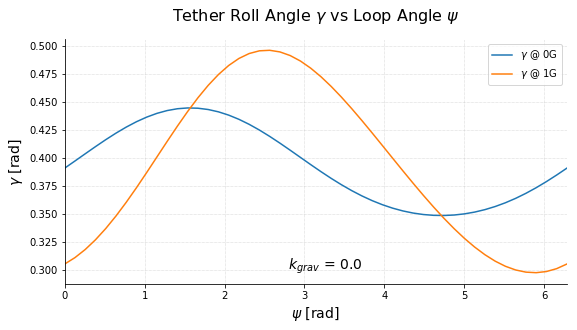

In [ ]:
#@title Roll - tether angle plot
loop_angles = np.linspace(0., 2*math.pi, 50)
shear = 0.
v_w_ref = 8.
r_loop = 80.
k_grav = 0.0
theta = 0.45 #best_elevation(r_loop, simple_config, shear)

print theta, ThetaEMin(r_loop, simple_config['l_tether'], simple_config['h_min'], simple_config['gs_position'][2])
v_w_eff = VwEff(simple_config, theta, shear, v_w_ref)
v_w_vh = VwVH(simple_config, theta, shear, v_w_ref)
v_km = VkL(simple_config, 0., 0., v_w_eff)
d_vk = DeltaVk(r_loop, 9.81, k_grav, theta, v_km)

v_ks = Vk_from_Psi(v_km, d_vk, loop_angles)
v_as = Va_from_VkVw(v_ks, v_w_vh, theta, loop_angles)

rolls = roll_angle_sa(
    simple_config, 0., 0., 1.225, 9.81, v_ks, theta, r_loop, loop_angles, v_w_vh=v_w_vh)
rolls_no_g = roll_angle_sa(
    simple_config, 0., 0., 1.225, 0., v_ks, theta, r_loop, loop_angles, v_w_vh=v_w_vh)


plt.figure(figsize=(9,4.5), frameon=False)
plt.title('Tether Roll Angle $\gamma$ vs Loop Angle $\psi$', size=16, y=1.05)
plt.text(2.8, 0.3,'$k_{grav}$ = %0.1f'%k_grav, size=14)
plt.ylabel(r'$\gamma$ [rad]', size=14)
plt.xlabel(r'$\psi$ [rad]', size=14)
plt.xlim((0., math.pi*2))
ax = plt.gca()
plt.plot(loop_angles, rolls_no_g, label='$\gamma$ @ 0G')
plt.plot(loop_angles, rolls, label='$\gamma$ @ 1G')
ax.grid(linewidth=0.5, linestyle=':')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()


In [ ]:
#@title Roll - speed plot
loop_angles = np.linspace(0., 2*math.pi, 50)
shear = 0.
v_w = 8.
r_loop = 80.
k_grav = 0.5
theta = 0.45 #best_elevation(r_loop, simple_config, shear)
print theta, ThetaEMin(r_loop, simple_config['l_tether'], simple_config['h_min'], simple_config['gs_position'][2])
v_km = v_km_from_config(simple_config, 0., 0., theta, v_w)
v_ks = v_k_from_loop_angle(v_km, loop_angles, r_loop, theta, k_grav)
v_as = va_from_vkvw(v_ks, v_w, theta, loop_angles)
rolls = roll_angle_sa(simple_config, 0., 0., 1.225, 9.81, v_ks, theta, r_loop, loop_angles, v_w=v_w)
rolls_no_g = roll_angle_sa(simple_config, 0., 0., 1.225, 0., v_ks, theta, r_loop, loop_angles, v_w=v_w)

plt.figure(figsize=(9,5), frameon=False)
plt.title('Kite Speed vs Loop Angle', size=14, y=1.05)
plt.ylabel(r'Kite speed [m/s]', size=14)
plt.xlabel(r'Loop angle', size=14)
plt.text(2.8, 66,'$k_{grav}$ = %0.1f'%k_grav, size=14)
ax = plt.gca()
plt.plot(loop_angles, v_ks, label='$v_k$')
plt.plot(loop_angles, v_as, label='$v_a$')
ax.grid(linewidth=0.5, linestyle=':')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(fontsize=14)

 0.45 0.4543089868693684


NameError: ignored

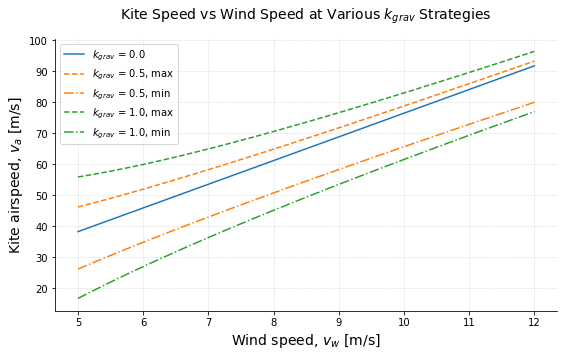

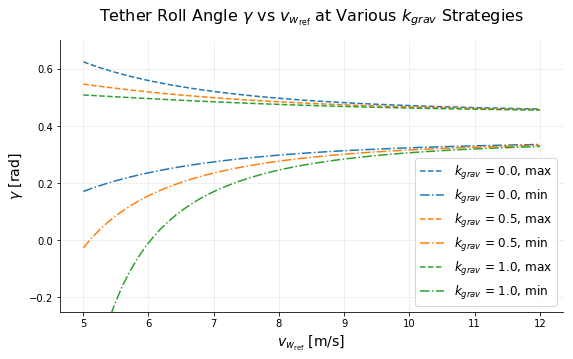

In [ ]:
loop_angles = np.linspace(0., 2*math.pi, 1000)
v_w_refs = np.linspace(5., 12., 60)
r_loop = 80.
theta = 0.45
v_w_effs = VwEff(simple_config, theta, 0., v_w_refs)
v_kms = VkL(simple_config, 0., 0., v_w_effs)

plt.figure(figsize=(9,5), frameon=False)
plt.title('Kite Speed vs Wind Speed at Various $k_{grav}$ Strategies',
          size=14, y=1.05)
plt.ylabel(r'Kite airspeed, $v_a$ [m/s]', size=14)
plt.xlabel(r'Wind speed, $v_w$ [m/s]', size=14)
ax = plt.gca()
for cc, k in enumerate([0., 0.5, 1.]):
  temp_o = []
  for v_w_ref, v_km in zip(v_w_refs, v_kms):
    d_vks = DeltaVk(r_loop, 9.81, k, theta, v_km)
    v_ks = Vk_from_Psi(v_km, d_vks, loop_angles)
    v_as = Va_from_VkVw(v_ks, v_w_ref, theta, loop_angles)
    temp_o.append(v_as)
  if k == 0.:
    plt.plot(v_w_refs, np.max(temp_o, axis=1),
           color='C%d'%cc, label='$k_{grav}$ = %0.1f'%k)
  else:
    plt.plot(v_w_refs, np.max(temp_o, axis=1),
            color='C%d'%cc, linestyle='--',
            label='$k_{grav}$ = %0.1f, max'%k)
    plt.plot(v_w_refs, np.min(temp_o, axis=1),
            color='C%d'%cc, linestyle='-.',
            label='$k_{grav}$ = %0.1f, min'%k)
ax.grid(linewidth=0.5, linestyle=':')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend()

plt.figure(figsize=(9,5), frameon=False)
plt.title('Tether Roll Angle $\gamma$ vs $v_{w_\mathrm{ref}}$ at Various $k_{grav}$ Strategies',
          size=16, y=1.05)
plt.ylabel(r'$\gamma$ [rad]', size=14)
plt.xlabel(r'$v_{w_\mathrm{ref}}$ [m/s]', size=14)
ax = plt.gca()
# ax2 = plt.twinx()
for cc, k in enumerate([0., 0.5, 1.]):
  temp_o = []
  for v_w_ref, v_km in zip(v_w_refs, v_kms):
    d_vks = DeltaVk(r_loop, 9.81, k, theta, v_km)
    v_ks = Vk_from_Psi(v_km, d_vks, loop_angles)
    rolls = roll_angle_sa(simple_config, 0., 0., 1.225, 9.81, v_ks, theta, r_loop, loop_angles, v_w_ref)
    temp_o.append(rolls)
  # loop_angles_max = [loop_angles[np.argmax(rolls)] for rolls in temp_o]
  # loop_angles_min = [loop_angles[np.argmin(rolls)] for rolls in temp_o]
  # ax2.plot(v_ws, loop_angles_max, color='C%d'%cc)
  # ax2.plot(v_ws, loop_angles_min, color='C%d'%cc)
  ax.plot(v_w_refs, np.max(temp_o, axis=1),
           color='C%d'%cc, linestyle='--',
           label='$k_{grav}$ = %0.1f, max'%k)
  ax.plot(v_w_refs, np.min(temp_o, axis=1),
           color='C%d'%cc, linestyle='-.',
           label='$k_{grav}$ = %0.1f, min'%k)
ax.set_ylim((-0.25, 0.7))
ax.grid(linewidth=0.5, linestyle=':')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(fontsize=12)


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:142: RuntimeWarning: invalid value encountered in sqrt
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


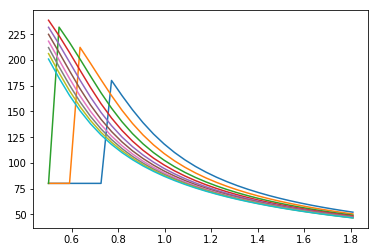

In [ ]:
#@title Numerical Find Min Turn

c_ls = np.linspace(0.5, 1.81, 30)
gamma_max = 0.785
k_grav = 0.5
loop_angles = np.linspace(0., 2*math.pi, 200)
v_ws = np.linspace(5., 12., 10)
r_loop = 80.
theta = 0.45


for v_w in v_ws:
  temp_o = []
  for c_l in c_ls:
    alpha, beta = GetConfigAlphaBetaAtAero(simple_config, c_l, 0., beta_bounds=(0., 0.))
    v_km = v_km_from_config(simple_config, alpha, beta, theta, v_w)
    v_ks = v_k_from_loop_angle(v_km, loop_angles, r_loop, theta, k_grav)

    def roll_err(r):
      return max(roll_angle_sa(simple_config, alpha, beta, 1.225, 9.81, v_ks, theta, r, loop_angles, v_w, r)) - gamma_max
  
    temp_o.append(fsolve(roll_err, x0=r_loop)[0])
  plt.plot(c_ls, temp_o)


In [ ]:
#@title Roll - minimum turn MX2
c_ls = np.linspace(0.75, 1.81, 15)
gamma_max = 0.785
k_grav = 0.75
loop_angles = np.linspace(math.pi/2., math.pi, 10)
v_w_refs = np.linspace(4., 16., 4)
r_loop = 80.
theta = 0.45
alphas, betas = zip(*[GetConfigAlphaBetaAtAero(simple_config, c_l, 0.) for c_l in c_ls])

print 'Calculating wind speed...',
temp_o = {'min_turn': [],
          'roll': []}
for v_w_ref in v_w_refs:
  print '%0.1f,'%v_w_ref,
  row = {key: [] for key in temp_o.iterkeys()}
  for a, b, c_l in zip(alphas, betas, c_ls):
    v_w_eff = VwEff(simple_config, theta, 0., v_w_ref)
    v_km = VkL(simple_config, 0., 0., v_w_eff)

    d_vks = DeltaVk(r_loop, 9.81, k_grav, theta, v_km)
    v_ks = Vk_from_Psi(v_km, d_vks, loop_angles)

    min_turns = MinTurn(
        simple_config, a, b, 1.225, 9.81, v_ks,
        theta, r_loop, loop_angles, gamma_max, v_w_ref)
    min_turn = max(min_turns)
    
    row['min_turn'].append(min_turn)
  for k in row.iterkeys():
    temp_o[k].append(row[k])


Calculating wind speed... 4.0, 8.0, 12.0, 16.0,


In [ ]:
#@title Roll - minimum turn M600
assert False # MX2 is the nominal plot, this overwrites the above
c_ls = np.linspace(0.75, 2.4, 15)
gamma_max = 0.698
k_grav = 0.5
loop_angles = np.linspace(math.pi/2., math.pi, 10)
v_ws = np.linspace(5., 12., 3)
r_loop = 120.
theta = 0.45

alphas, betas = zip(*[GetConfigAlphaBetaAtAero(simple_config, c_l, 0.) for c_l in c_ls])

print 'Calculating wind speed...',
temp_o = {'min_turn': [],
          'alpha': []}
for v_w in v_ws:
  print '%0.1f,'%v_w,
  row = {key: [] for key in temp_o.iterkeys()}
  for a, b, c_l in zip(alphas, betas, c_ls):
    v_km = v_km_from_config(m600, a, b, theta, v_w)
    v_ks = v_k_from_loop_angle(v_km, loop_angles, r_loop, theta, k_grav)

    row['alpha'].append(alpha)
    min_turns = MinTurn(
        m600, a, b, 1.225, 9.81, v_ks,
        theta, r_loop, loop_angles, gamma_max, v_w)
    min_turn = max(min_turns)
    row['min_turn'].append(min_turn)
  for k in row.iterkeys():
    temp_o[k].append(row[k])

Calculating wind speed... 5.0, 8.5, 12.0,


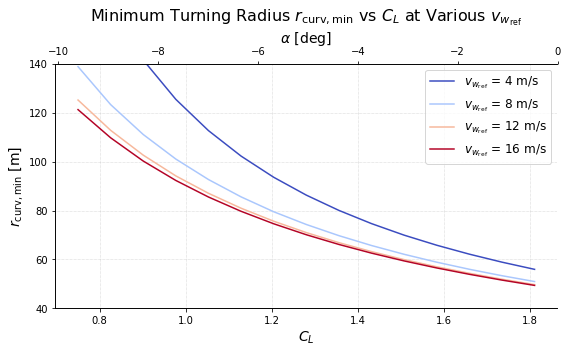

In [ ]:
#@title Roll - min turn plot vs CL & v_w
plt.figure(figsize=(9,4.5))
plt.title(r'Minimum Turning Radius $r_\mathrm{curv, min}$ vs $C_L$ at Various $v_{w_\mathrm{ref}}$', y=1.15, size=16)
plt.xlabel('$C_L$', size=14)
plt.ylabel(r'$r_\mathrm{curv, min}$ [m]', size=14)
for ii, (v_w_ref, min_turns) in enumerate(zip(v_w_refs, temp_o['min_turn'])):
  plt.plot(c_ls, min_turns,
           color=cm.coolwarm(float(ii)/(len(v_w_refs)-1)),
           label='$v_{w_\mathrm{ref}}$ = %d m/s'%v_w_ref)
plt.legend(fontsize=12)
plt.ylim((40., 140)) # for MX2
# plt.ylim((60., 200)) # for M600
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax2 = plt.twiny()
ax2.set_xlim((min(alphas), max(alphas)))
ax2.set_xlabel(r'$\alpha$ [deg]', size=14)
ax2.spines['right'].set_visible(False)
ax.grid(linewidth=0.5, linestyle=':')

In [ ]:
#@title Roll - minimum turn MX2
c_ls = np.linspace(0.75, 1.81, 15)
gamma_maxes = np.append(np.linspace(0.3, 0.7, 5),0.785)
k_grav = 0.7
loop_angles = np.linspace(math.pi/2., math.pi, 10)
v_w = 8.
r_loops = 80.
theta = 0.45
alphas, betas = zip(*[GetConfigAlphaBetaAtAero(simple_config, c_l, 0.) for c_l in c_ls])

print 'Calculating r_loop...',
temp_o = {'min_turn': [],
          'roll': []}
for gamma_max in gamma_maxes:
  print '%0.2f,'%gamma_max,
  row = {key: [] for key in temp_o.iterkeys()}
  for a, b, c_l in zip(alphas, betas, c_ls):
    v_km = v_km_from_config(simple_config, a, b, theta, v_w)
    v_ks = v_k_from_loop_angle(v_km, loop_angles, r_loop, theta, k_grav)

    min_turns = MinTurn(
        simple_config, a, b, 1.225, 9.81, v_ks,
        theta, r_loop, loop_angles, gamma_max, v_w_vh=v_w_ref)
    min_turn = max(min_turns)
    
    row['min_turn'].append(min_turn)
  for k in row.iterkeys():
    temp_o[k].append(row[k])

Calculating r_loop... 0.30,

NameError: ignored

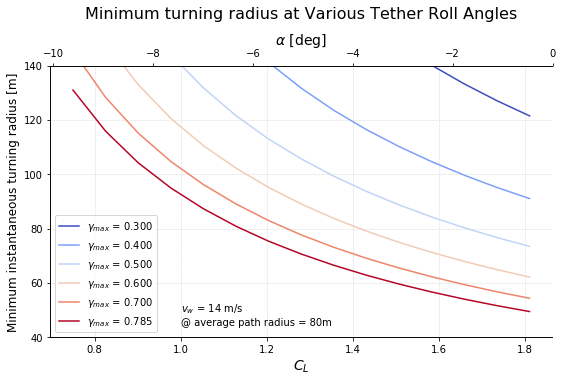

In [ ]:
#@title Roll - min turn plot vs cL and roll max
plt.figure(figsize=(9,5))
plt.title('Minimum turning radius at Various Tether Roll Angles', y=1.15, size=16)
plt.xlabel('$C_L$', size=14)
plt.ylabel('Minimum instantaneous turning radius [m]', size=12)
for ii, (gamma_max, min_turns) in enumerate(zip(gamma_maxes, temp_o['min_turn'])):
  plt.plot(c_ls, min_turns,
           color=cm.coolwarm(float(ii)/(len(gamma_maxes)-1)),
           label='$\gamma_{max}$ = %0.3f'%gamma_max)
plt.legend()
plt.ylim((40., 140)) # for MX2
# plt.ylim((60., 200)) # for M600
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.text(1, 45, '$v_w$ = 14 m/s'+'\n@ average path radius = %dm'%r_loop)
ax2 = plt.twiny()
ax2.set_xlim((min(alphas), max(alphas)))
ax2.set_xlabel(r'$\alpha$ [deg]', size=14)
ax2.spines['right'].set_visible(False)
ax.grid(linewidth=0.5, linestyle=':')

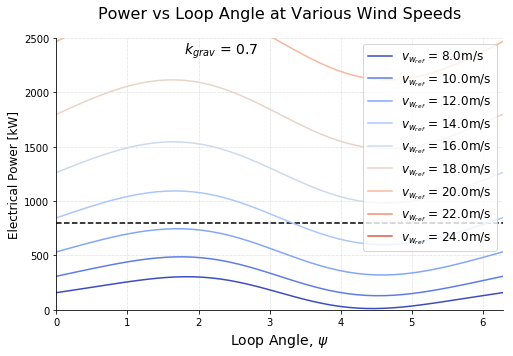

In [ ]:
#@title Very Simple Power vs Loop Angle
loop_angles = np.linspace(0., 2*math.pi, 50)
v_ws = np.linspace(8., 24., 9)
p_to_p0 = 0.25
theta = 0.45
k_grav = 0.7
r_loop = 80.
eta_t2g = 0.66

temp_kite = copy.deepcopy(simple_config)
temp_alpha, temp_beta = -7., 0.

plt.figure(figsize=(8,5))
plt.title('Power vs Loop Angle at Various Wind Speeds', size=16, y=1.05)
plt.xlabel('Loop Angle, $\psi$', size=14)
plt.ylabel('Electrical Power [kW]', size=12)
for ii, v_w in enumerate(v_ws):
  p = p_to_p0 * P0(temp_kite, temp_alpha, temp_beta, 1.225, v_w)
  v_w_eff = VwEff(temp_kite, theta, 0., v_w)
  v_kbar = VkL(temp_kite, temp_alpha, temp_beta, v_w_eff)
  d_vks = DeltaVk(r_loop, 9.81, k_grav, theta, v_kbar)
  v_ks = Vk_from_Psi(v_kbar, d_vks, loop_angles)
  p_gravs = P_grav(loop_angles, M_eff_g(temp_kite), 9.81, theta, k_grav, v_ks, eta_t2g)

  # plt.plot(loop_angles, v_ks, label=v_w)
  plt.plot(loop_angles, (p + p_gravs)/1000.,
           color=cm.coolwarm(float(ii)/len(v_ws)), label='$v_{w_{ref}}$ = '+ '{:0.1f}m/s'.format(v_w))
plt.hlines(800., 0., 2*math.pi, linestyle='--')
plt.xlim(0., 2*math.pi)
# plt.ylim((0,None))
plt.ylim((0,2500))
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(linewidth=0.5, linestyle=':')
plt.text(1.8, 2350, '$k_{grav}$'+' = {:0.1f}'.format(k_grav), size=14)
plt.legend(fontsize=12, loc=1)


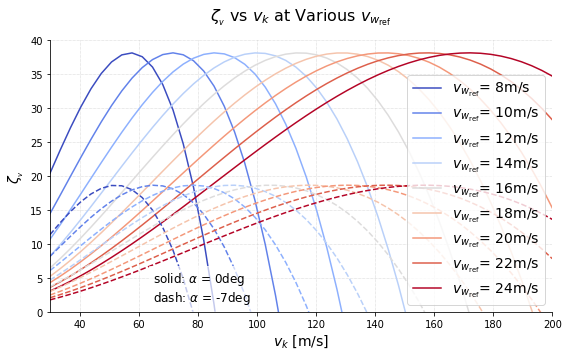

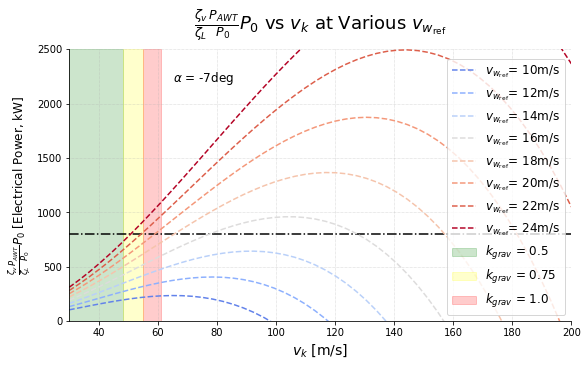

In [ ]:
#@title Power vs Wind Speed with slow kite strategy

v_ks = np.linspace(30., 200., 50)
theta = 0.45
v_ws = np.linspace(8., 24., 9)
v_k_min = 30.
k_gravs = np.array((0.5, 0.75, 1.))
r_loop = 80.
p_to_p0 = 0.25


v_k_maxes = np.sqrt(v_k_min**2 + 4. * r_loop * np.cos(theta) * 9.81 * k_gravs)
v_k_ranges = [v_k_min] + v_k_maxes.tolist()

plt.figure(figsize=(9,5))
plt.title('$\zeta_{_v}$ vs $v_k$ at Various $v_{w_\mathrm{ref}}$', size=16, y=1.05)
plt.xlabel('$v_k$ [m/s]', size=14)
plt.ylabel('$\zeta_{_v}$', size=14)

alpha, beta = 0., 0.
temp_o = {'z': [],
          'p': []}
for v_w in v_ws:
  v_w_theta = v_w * np.cos(theta)
  zeta = ZetaV(simple_config, alpha, beta, v_ks, v_w_theta)
  zeta_ratio = zeta / ZetaL(simple_config, 0, beta)
  p0 = P0(simple_config, 0, beta, 1.225, v_w)
  temp_o['z'].append(zeta)
  temp_o['p'].append(zeta_ratio * p_to_p0 * p0)
for ii, v_w in enumerate(v_ws):
  plt.plot(v_ks, temp_o['z'][ii],
           color=cm.coolwarm(float(ii)/(len(v_ws)-1)),
           label=r'$v_{w_{\mathrm{ref}}}$'+'= %0.0fm/s'%v_w)

alpha, beta = -7., 0.
temp_o = {'z': [],
          'p': []}
for v_w in v_ws:
  v_w_theta = v_w * np.cos(theta)
  zeta = ZetaV(simple_config, alpha, beta, v_ks, v_w_theta)
  zeta_ratio = zeta / ZetaL(simple_config, 0, beta)
  p0 = P0(simple_config, 0, beta, 1.225, v_w)
  temp_o['z'].append(zeta)
  temp_o['p'].append(zeta_ratio * p_to_p0 * p0)
for ii, v_w in enumerate(v_ws):
  plt.plot(v_ks, temp_o['z'][ii],
           color=cm.coolwarm(float(ii)/(len(v_ws)-1)),
           linestyle='--')

plt.ylim(0, 40)
plt.xlim(min(v_ks), max(v_ks))
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(linewidth=0.5, linestyle=':')
plt.text(65, 1.5, r'solid: $\alpha$ = 0deg'+ '\ndash: ' + r'$\alpha$ = -7deg', size=12,
         bbox={'facecolor':'white', 'alpha':0.7, 'edgecolor':'white'})
plt.legend(fontsize=14)

plt.figure(figsize=(9,5))
plt.title(r'$\frac{\zeta_v}{\zeta_{L}}\frac{P_{AWT}}{P_0}P_0$ vs $v_k$ at Various $v_{w_\mathrm{ref}}$', size=18, y=1.05)
plt.xlabel('$v_k$ [m/s]', size=14)
plt.ylabel(r'$\frac{\zeta_v}{\zeta_{L}}\frac{P_{AWT}}{P_0}P_0$ [Electrical Power, kW]', size=12)
plt.ylim(0, 2500)
for ii, v_w in enumerate(v_ws):
  if ii >= 1:
    plt.plot(v_ks, temp_o['p'][ii]/1000.,
            color=cm.coolwarm(float(ii)/(len(v_ws)-1)),
            label=r'$v_{w_{\mathrm{ref}}}$'+'= %0.0fm/s'%v_w,
             linestyle='--')
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(linewidth=0.5, linestyle=':')
plt.xlim(min(v_ks), max(v_ks))
colors = ['green', 'yellow', 'red']
for ii in range(len(v_k_ranges) - 1):
  ax.axvspan(v_k_ranges[ii], v_k_ranges[ii+1], color=colors[ii], alpha=0.2)
swatches = []
for color in colors:
  swatches.append(patches.Patch(color=color, alpha=0.2))
handles, labels = ax.get_legend_handles_labels()
handles.extend(swatches)
labels.extend(('$k_{grav}$ = 0.5', '$k_{grav}$ = 0.75', '$k_{grav}$ = 1.0'))
plt.hlines(800, min(v_ks), max(v_ks), color='black', linestyle='-.')
plt.text(65, 2200, r'$\alpha$ = -7deg', size=12)
plt.legend(handles, labels, fontsize=12, loc=4)

In [ ]:
#@title Numerical model for azimuth
v_w = 11.
r_loop = 80.
alpha = 0.
beta = 0.

azis = np.arange(0., -0.4, -0.1)
# eles = np.arange(0.45, 1.05, 0.1)
eles = [0.45]
num_poses = 18

solutions = []

print 'Solving...',
keys_loop = ['power_avg_time']
keys_poses = ['power', 'k_grav', 'v_k', 'v_a',
              'aero_power', 'tether_power',
              'no_g_or_path_accel_power']
temp_o = {'no_g': {'loop':{}, 'poses': {}},
          'g': {'loop':{}, 'poses': {}}}
for k in keys_loop:
  for kk, d in temp_o.iteritems():
    temp_o[kk]['loop'][k] = []
for k in keys_poses:
  for kk, d in temp_o.iteritems():
    temp_o[kk]['poses'][k] = []
for azi in azis:
  for ele in eles:
    print azi, ele, '... ',
    temp_path_location_params = {'azim': azi,
                                 'incl': ele}
    temp_path_shape_params = {'r_loop': r_loop,
                              'type': 'circle',
                              'num_pos': num_poses}
    temp_kwargs = {'path_shape_params': temp_path_shape_params,
                   'path_location_params': temp_path_location_params}
    # temp_kwargs['verbose'] = True
    temp_kwargs['pose_states_param'] = {
        'alpha': {'param_type': 'constant',
                  'values': alpha},
        'beta': {'param_type': 'constant',
                 'values': beta}}
    temp_kwargs['vars_to_opt'] = {
        'lift_roll_angle': {'param_type': 'each',
                            'values': [
                                -0.35, -0.36, -0.38, -0.39, -0.39,
                                -0.39, -0.39, -0.37, -0.36, -0.35,
                                -0.33, -0.32, -0.31, -0.31, -0.31,
                                -0.31, -0.32, -0.33],
                            'max_step': -0.1},
        'v_a': {'param_type': 'spline',
                'values': [67.04, 71.35, 76.11, 75.96 , 70.85, 67.28],
                'max_step': 4.}}
    temp_kwargs['opt_params'] = opt_params_accurate_no_converge_data
    temp_kwargs['opt_params']['flap_m_mult'] = [1./0.089, 1./0.94, 1./0.065]
    temp_kwargs['opt_params']['flap_penalty_factor'] = 2.
    temp_kwargs['pose_solve_options'] = {'contol_norm': 0.0125}
    temp_loop = kite_loop.KiteLoop(
        sea_level_no_shear, simple_config2,
        v_w_at_h_ref=v_w, #grav_mult=1e-6,
        **temp_kwargs)
    temp_loop.solve()
    # temp_loop.plot_convergence_data()
    for k in temp_o['g']['loop'].iterkeys():
      temp_o['g']['loop'][k].append(temp_loop.data_loop[k])
    for k in temp_o['g']['poses'].iterkeys():
      temp_o['g']['poses'][k].append(temp_loop.data_poses[k])

    solution = {
        'pose_states': temp_loop.pose_states,
        'path_shape_params': temp_path_shape_params,
        'path_location_params': temp_path_location_params}
    solutions.append(solution)

    temp_loop = kite_loop.KiteLoop(
        sea_level_no_shear, simple_config2,
        v_w_at_h_ref=v_w, grav_mult=1e-6, verbose=True,
        **solution)
    temp_loop.solve()
    for k in temp_o['no_g']['loop'].iterkeys():
      temp_o['no_g']['loop'][k].append(temp_loop.data_loop[k])
    for k in temp_o['no_g']['poses'].iterkeys():
      temp_o['no_g']['poses'][k].append(temp_loop.data_poses[k])

Solving... 0.0 0.45 ... Solving poses in loop...solved. Time is 0.0130s
Loop solved, now calculating loop data.
Loop Valid: False 
Type of constraints violated:
['net_margin']
Loop Mean Power is: 761487.8 W
Extracting pose data into DataFrame.
 -0.1 0.45 ... Solving poses in loop...solved. Time is 0.0125s
Loop solved, now calculating loop data.
Loop Valid: False 
Type of constraints violated:
['net_margin']
Loop Mean Power is: 750000.9 W
Extracting pose data into DataFrame.
 -0.2 0.45 ... Solving poses in loop...solved. Time is 0.0132s
Loop solved, now calculating loop data.
Loop Valid: False 
Type of constraints violated:
['net_margin']
Loop Mean Power is: 717694.3 W
Extracting pose data into DataFrame.
 -0.30000000000000004 0.45 ... Solving poses in loop...solved. Time is 0.0143s
Loop solved, now calculating loop data.
Loop Valid: False 
Type of constraints violated:
['net_margin']
Loop Mean Power is: 665039.1 W
Extracting pose data into DataFrame.



In [ ]:
#@title Numerical model for azimuth - Constant v_k
v_w = 11.
r_loop = 98.
alpha = 0.
beta = 0.

azis = np.arange(0., -0.4, -0.1)
# eles = np.arange(0.45, 0.9, 0.2)
eles = [0.45]
num_poses = 18

solutions = []

print 'Solving...',
keys_loop = ['power_avg_time']
keys_poses = ['power', 'k_grav', 'v_k', 'v_a',
              'aero_power', 'tether_power',
              'no_g_or_path_accel_power']
temp_o2 = {'no_g': {'loop':{}, 'poses': {}},
           'g': {'loop':{}, 'poses': {}}}
for k in keys_loop:
  for kk, d in temp_o.iteritems():
    temp_o2[kk]['loop'][k] = []
for k in keys_poses:
  for kk, d in temp_o.iteritems():
    temp_o2[kk]['poses'][k] = []
for azi in azis:
  for ele in eles:
    print azi, ele, '... ',
    temp_path_location_params = {'azim': azi,
                                 'incl': ele}
    temp_path_shape_params = {'r_loop': r_loop,
                              'type': 'circle',
                              'num_pos': num_poses}
    temp_kwargs = {'path_shape_params': temp_path_shape_params,
                   'path_location_params': temp_path_location_params}
    # temp_kwargs['verbose'] = True
    temp_kwargs['pose_states_param'] = {
        'alpha': {'param_type': 'constant',
                  'values': alpha},
        'beta': {'param_type': 'constant',
                 'values': beta},
        'v_k': {'param_type': 'constant',
                'values': VkL(simple_config2, alpha, beta, np.cos(ele) * v_w)}}
    temp_kwargs['vars_to_opt'] = {
        'lift_roll_angle': {'param_type': 'each',
                            'values': [
                                -0.35, -0.36, -0.38, -0.39, -0.39,
                                -0.39, -0.39, -0.37, -0.36, -0.35,
                                -0.33, -0.32, -0.31, -0.31, -0.31,
                                -0.31, -0.32, -0.33],
                            'max_step': -0.1}}
    temp_kwargs['opt_params'] = opt_params_accurate_no_converge_data
    temp_kwargs['opt_params']['flap_m_mult'] = [1./0.089, 1./0.94, 1./0.065]
    temp_kwargs['opt_params']['flap_penalty_factor'] = 2.
    temp_kwargs['pose_solve_options'] = {'contol_norm': 0.0125}
    temp_loop = kite_loop.KiteLoop(
        sea_level_no_shear, simple_config2,
        v_w_at_h_ref=v_w, #grav_mult=1e-6,
        **temp_kwargs)
    temp_loop.solve()
    # temp_loop.plot_convergence_data()
    for k in temp_o2['g']['loop'].iterkeys():
      temp_o2['g']['loop'][k].append(temp_loop.data_loop[k])
    for k in temp_o2['g']['poses'].iterkeys():
      temp_o2['g']['poses'][k].append(temp_loop.data_poses[k])

    solution = {
        'pose_states': temp_loop.pose_states,
        'path_shape_params': temp_path_shape_params,
        'path_location_params': temp_path_location_params}
    solutions.append(solution)

    temp_loop = kite_loop.KiteLoop(
        sea_level_no_shear, simple_config2,
        v_w_at_h_ref=v_w, grav_mult=1e-6, verbose=True,
        **solution)
    temp_loop.solve()
    for k in temp_o2['no_g']['loop'].iterkeys():
      temp_o2['no_g']['loop'][k].append(temp_loop.data_loop[k])
    for k in temp_o2['no_g']['poses'].iterkeys():
      temp_o2['no_g']['poses'][k].append(temp_loop.data_poses[k])

Solving... 0.0 0.45 ... Solving poses in loop...solved. Time is 0.0150s
Loop solved, now calculating loop data.
Loop Valid: False 
Type of constraints violated:
['net_margin']
Loop Mean Power is: 767006.9 W
Extracting pose data into DataFrame.
 -0.1 0.45 ... Solving poses in loop...solved. Time is 0.0130s
Loop solved, now calculating loop data.
Loop Valid: False 
Type of constraints violated:
['net_margin']
Loop Mean Power is: 754625.9 W
Extracting pose data into DataFrame.
 -0.2 0.45 ... Solving poses in loop...solved. Time is 0.0188s
Loop solved, now calculating loop data.
Loop Valid: False 
Type of constraints violated:
['net_margin']
Loop Mean Power is: 718000.3 W
Extracting pose data into DataFrame.
 -0.30000000000000004 0.45 ... Solving poses in loop...solved. Time is 0.0120s
Loop solved, now calculating loop data.
Loop Valid: False 
Type of constraints violated:
['net_margin']
Loop Mean Power is: 657565.5 W
Extracting pose data into DataFrame.



(0, 6.283185307179586)

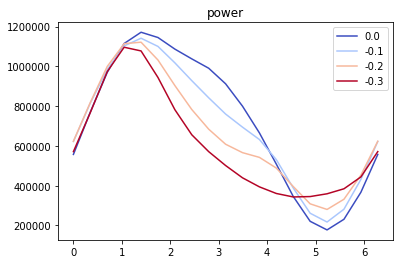

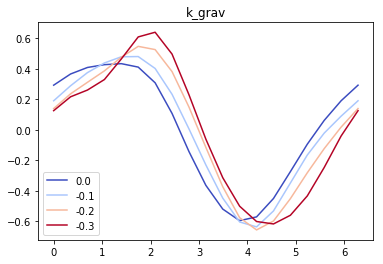

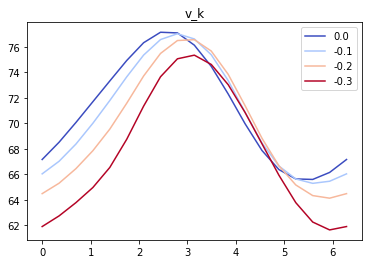

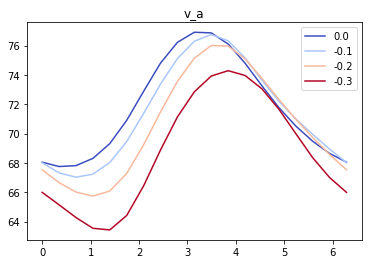

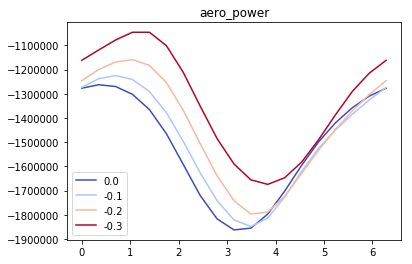

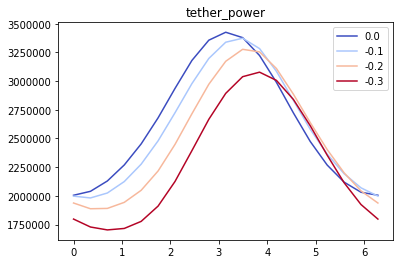

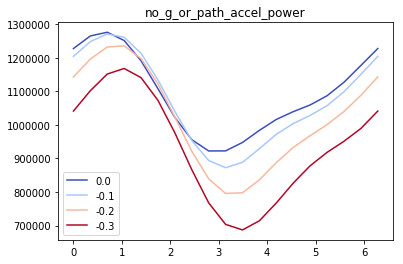

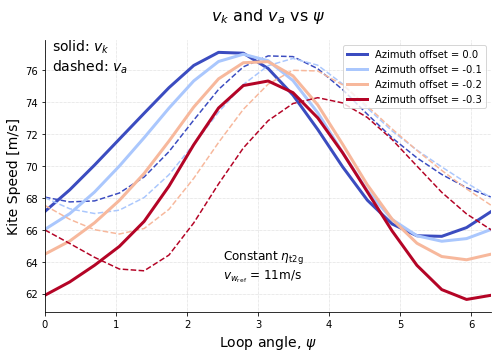

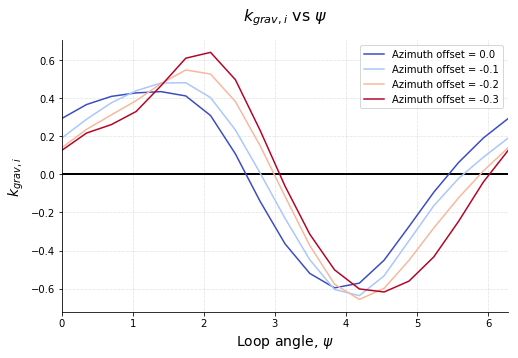

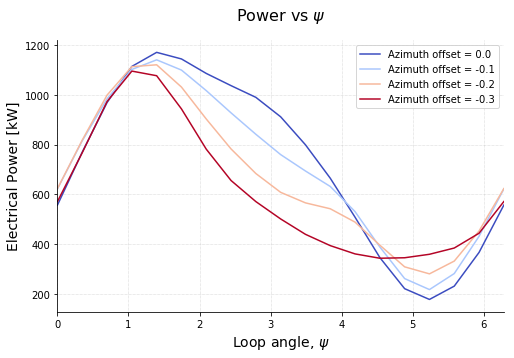

In [ ]:

for k in keys_poses:
  plt.figure()
  plt.title(k)
  for ii, vs in enumerate(temp_o['g']['poses'][k]):
    color = cm.coolwarm(float(ii)/(len(azis)-1))
    loop_angles = temp_loop.data_poses['loop_angle'].tolist()
    loop_angles.append(2.*math.pi)
    vs = vs.tolist()
    vs.append(vs[0])
    plt.plot(loop_angles, vs,
            color=color, label=round(azis[ii],1))
  plt.legend()

plt.figure(figsize=(8,5))
plt.xlabel('Loop angle, $\psi$', size=14)
plt.ylabel('Kite Speed [m/s]', size=14)
plt.title('$v_k$ and $v_a$ vs $\psi$', size=16, y=1.05)
plt.text(0.1, 76, 'solid: $v_k$'+'\n'+'dashed: $v_a$', size=14)
for ii, (vks, vas) in enumerate(
    zip(temp_o['g']['poses']['v_k'], temp_o['g']['poses']['v_a'])):
  color = cm.coolwarm(float(ii)/(len(azis)-1))
  loop_angles = temp_loop.data_poses['loop_angle'].tolist()
  loop_angles.append(2.*math.pi)
  vks, vas = vks.tolist(), vas.tolist()
  vks.append(vks[0])
  vas.append(vas[0])
  plt.plot(loop_angles, vks,
           color=color, label='Azimuth offset = %0.1f'%azis[ii],
           linewidth=3)
  plt.plot(loop_angles, vas,
           color=color, linestyle='--')
plt.legend(loc=1)
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(linewidth=0.5, linestyle=':')
plt.xlim(0, 2*math.pi)
plt.text(2.5, 63.,'Constant $\eta_\mathrm{t2g}$' + '\n'+ '$v_{w_\mathrm{ref}}$ = 11m/s', size=12)

plt.figure(figsize=(8,5))
plt.xlabel('Loop angle, $\psi$', size=14)
plt.ylabel('$k_{grav, i}$', size=14)
plt.title('$k_{grav, i}$ vs $\psi$', size=16, y=1.05)
for ii, vs in enumerate(temp_o['g']['poses']['k_grav']):
  color = cm.coolwarm(float(ii)/(len(azis)-1))
  loop_angles = temp_loop.data_poses['loop_angle'].tolist()
  loop_angles.append(2.*math.pi)
  vs = vs.tolist()
  vs.append(vs[0])
  plt.plot(loop_angles, vs,
           color=color, label='Azimuth offset = %0.1f'%azis[ii])
plt.legend()
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(linewidth=0.5, linestyle=':')
plt.hlines(0., 0, 2*math.pi, linewidth=2)
plt.xlim(0, 2*math.pi)


plt.figure(figsize=(8,5))
plt.title('Power vs $\psi$', size=16, y=1.05)
plt.xlabel('Loop angle, $\psi$', size=14)
plt.ylabel('Electrical Power [kW]', size=14)
for ii, vs in enumerate(temp_o['g']['poses']['power']):
  color = cm.coolwarm(float(ii)/(len(azis)-1))
  loop_angles = temp_loop.data_poses['loop_angle'].tolist()
  loop_angles.append(2.*math.pi)
  vs = vs.tolist()
  vs.append(vs[0])
  plt.plot(loop_angles, np.array(vs)/1000.,
           color=color, label='Azimuth offset = %0.1f'%azis[ii])
plt.legend()
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(linewidth=0.5, linestyle=':')
plt.xlim(0, 2*math.pi)

(0, 6.283185307179586)

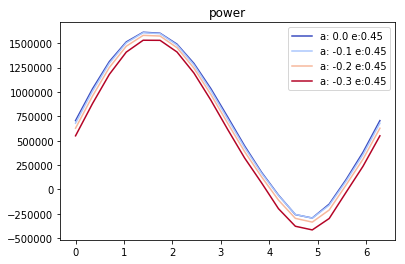

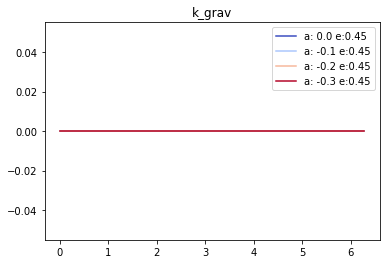

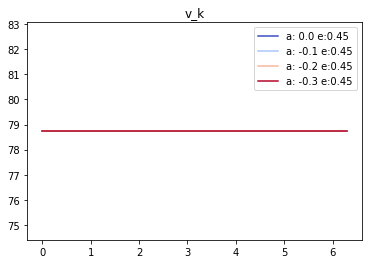

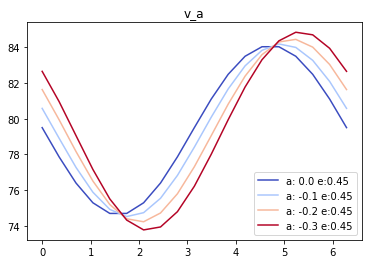

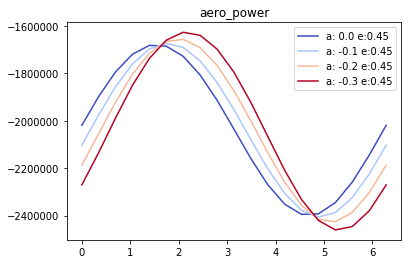

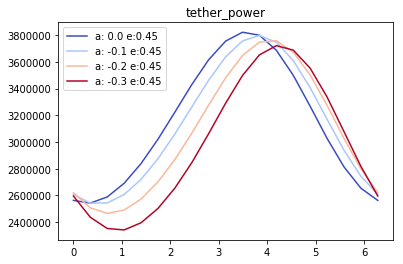

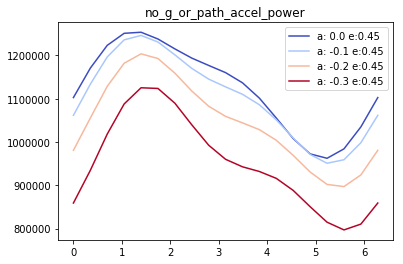

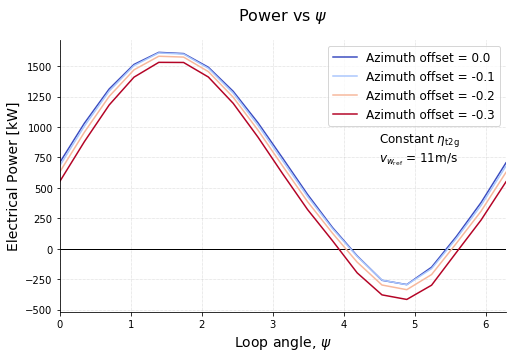

In [ ]:
for k in keys_poses:
  plt.figure()
  plt.title(k)
  for ii, vs in enumerate(temp_o2['g']['poses'][k]):
    azi = azis[ii%len(azis)]
    ele = eles[ii/len(azis)]
    color = cm.coolwarm(float(ii)/(len(azis)-1))
    loop_angles = temp_loop.data_poses['loop_angle'].tolist()
    loop_angles.append(2.*math.pi)
    vs = vs.tolist()
    vs.append(vs[0])
    plt.plot(loop_angles, vs,
            color=color, label='a: %0.1f e:%0.2f'%(azi, ele))
  plt.legend()

plt.figure(figsize=(8,5))
plt.title('Power vs $\psi$', size=16, y=1.05)
plt.xlabel('Loop angle, $\psi$', size=14)
plt.ylabel('Electrical Power [kW]', size=14)
for ii, vs in enumerate(temp_o2['g']['poses']['power']):
  color = cm.coolwarm(float(ii%len(azis))/(len(azis)-1))
  loop_angles = temp_loop.data_poses['loop_angle'].tolist()
  loop_angles.append(2.*math.pi)
  vs = vs.tolist()
  vs.append(vs[0])
  plt.plot(loop_angles, np.array(vs)/1000.,
           color=color, label='Azimuth offset = %0.1f'%azis[ii])
plt.legend(fontsize=12)
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(linewidth=0.5, linestyle=':')
plt.hlines(0, 0, 2*math.pi, linewidth=1)
plt.text(4.5, 720.,'Constant $\eta_\mathrm{t2g}$' + '\n'+ '$v_{w_\mathrm{ref}}$ = 11m/s', size=12)
plt.xlim(0, 2*math.pi)

Max zeta 44.38 for cL of 2.69, cL/cD is 10.56 at alpha 5.00 and beta -2.84.
Max zeta 58.13 for cL of 1.81, cL/cD is 14.73 at alpha 0.00 and beta 1.32.
Max zeta 57.66 for cL of 1.81, cL/cD is 14.67 at alpha 0.00 and beta 1.32.
Max zeta 57.88 for cL of 1.81, cL/cD is 14.69 at alpha 0.00 and beta 0.00.
M600 Intent
('h_min', 85.0)
('gs_position', [0.0, 0.0, 6.122])
('s', 32.9)
('b', 25.66)
('l_tether', 400.0)
('t_tether', 0.025)
('cD_tether', 0.7)
('v_a_min', 30.0)
('m_kite', 1310.0)
('m_tether', 315.0)
('cL', 2.8175025704063814)
('cDk', 0.20658543709888402)
('cD', 0.25977692646058614)

M600 As Built
('h_min', 110.0)
('gs_position', [0.0, 0.0, 5.0])
('s', 32.9)
('b', 25.66)
('l_tether', 439.2)
('t_tether', 0.0295)
('cD_tether', 0.7)
('v_a_min', 35.0)
('m_kite', 1692.2999999999997)
('m_tether', 390.45)
('cL', 2.5597138683390486)
('cDk', 0.2436650257696073)
('cD', 0.31258204704620307)

(30.69063021950525, 2.9166892846730925, 8.427712399476857)
(25.652014002157436, 2.5597138683390486, 8.22464

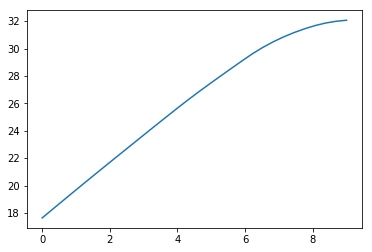

In [ ]:
#@title Get system zetas & props

makani_FBL.calc_loyd_optimums(m600, model_tether_drag=False, alpha_range=(0., 5.))
makani_FBL.calc_loyd_optimums(override_config, model_tether_drag=False, alpha_range=(-5., 0.))
makani_FBL.calc_loyd_optimums(BSF_TLG, model_tether_drag=False, alpha_range=(-5., 0.))
makani_FBL.calc_loyd_optimums(simple_config, model_tether_drag=False, alpha_range=(-5., 0.), beta_range=(0., 0.))

keys = ['h_min', 'gs_position', 's', 'b', 'l_tether', 't_tether', 'cD_tether',
        'v_a_min', 'A_rotors', 'm_kite', 'm_tether']

print('M600 Intent')
temp_k = m600_intent
for k in keys:
  if k in temp_k:
    print(k, temp_k[k])
aero = GetAeroCoeff(temp_k, 5., 0., False)
print('cL', aero['cL'])
print('cDk', aero['cD'])
aero = GetAeroCoeff(temp_k, 5., 0., True)
print('cD', aero['cD'])
print

print('M600 As Built')
temp_k = m600
for k in keys:
  if k in temp_k:
    print(k, temp_k[k])
aero = GetAeroCoeff(temp_k, 4., 0., False)
print('cL', aero['cL'])
print('cDk', aero['cD'])
aero = GetAeroCoeff(temp_k, 4., 0., True)
print('cD', aero['cD'])
print

plt.figure()
v = []
for a in np.linspace(0., 9., 30):
  v.append(makani_FBL.calc_loyd(m600, a, 0.)[0])
plt.plot(np.linspace(0., 9., 30), v)

print(makani_FBL.calc_loyd(m600, 7., 0.))
print(makani_FBL.calc_loyd(m600, 4., 0.))

print('MX2')
temp_k = override_config
for k in keys:
  if k in temp_k:
    print(k, temp_k[k])
aero = GetAeroCoeff(temp_k, 0., 0., False)
print('cL', aero['cL'])
print('cDk', aero['cD'])
aero = GetAeroCoeff(temp_k, 0., 0., True)
print('cD', aero['cD'])
print

print override_config['m_kite'], override_config['m_tether']
print override_config['torque_shaft_max']
print
print simple_config['b']
# print simple_config['h_min']
print simple_config['s']
print simple_config['l_tether']
print simple_config['gs_position']
print simple_config['m_kite']+simple_config['m_tether']/3.

print
print m600['h_min']
print m600['gs_position']
print m600['s']
print m600['b']
print m600['l_tether']

In [ ]:
def PlotRotor(shaft_power_from_drag_power, plot_spacing=False, **kwargs):
  """Plot the rotor table for a given rotor and config.

  args:
    shaft_power_from_drag_power: The rotor function for/from a kite config.
    plot_spacing: If true, also plots the grid of points from v_axs and
      rotor_forces so the user can judge if it has a reasonable density for
      generating the contour plots.
  main kwargs:
    v_axs, rotor_forces: Tuples that get passed to linspace to make the
      underlying grid. Note that rotor_forces is total force for all rotors,
      so if passing a rotor function for a single rotor setup, the values here
      should be set accordingly.
    power/torque_shaft_max: If passed, their constraint lines will be added
      to the plot. Note that the torque_shaft_max is defined per motor but the
      power_shaft_max limit is total for all rotors combined.
    x, y, zs: String (or list of strings for zs) of the variable name to plot.
      Must be variables that are in the state_update dictionary that the rotor
      function returns, or the 'rotor_force' or 'v_a_along_rotor_axis' that
      were passed into the rotor function.



  """

  rho = kwargs.get('rho', 1.225)
  c_sound = kwargs.get('c_sound', 343.0)
  v_axs = np.linspace(*kwargs.get('v_axs', (30., 90., 301)))
  rotor_forces = np.linspace(*kwargs.get(
      'rotor_forces', (-6000.*8, 4000.*8, 300)))
  power_shaft_max = kwargs.get('power_shaft_max', None)
  torque_shaft_max = kwargs.get('torque_shaft_max', None)
  x = kwargs.get('x', 'omega_rotor')
  y = kwargs.get('y', 'v_a_along_rotor_axis')
  zs = kwargs.get('zs', ['c_t', 'c_p', 'eta_rotors'])
  levels = kwargs.get('levels', 12)
  colormap = kwargs.get('colormap', 'summer')
  color = kwargs.get('color', 'C0')
  title = kwargs.get('title', '')
  legend_loc = kwargs.get('legend_loc', 'upper left')
  figsize = kwargs.get('figsize', (9,7))
  only_valids = kwargs.get('only_valids', True)
  only_positive_eta = kwargs.get('only_positive_eta', True)
  no_duplicate_powers = kwargs.get('no_duplicate_powers', True)

  rotor_force_grid, v_ax_grid = np.meshgrid(rotor_forces, v_axs)
  table = shaft_power_from_drag_power(rho, c_sound, v_ax_grid, rotor_force_grid)
  table['rotor_force'] = rotor_force_grid
  table['v_a_along_rotor_axis'] = v_ax_grid

  fig, axes = plt.subplots(figsize=(figsize[0],figsize[1] * len(zs)),
                               nrows=len(zs), ncols=1, dpi=100)
  if len(zs) == 1:
    # Axes must be iterable to be later zipped with the zs.
    axes = [axes]

  # Convert list of constraints to dictionary.
  constraints = {
      constraint.pop('name'):constraint for constraint in table['constraints']}
  # Power and torque constraints are part of the kite config, not the rotor,
  # so if these limits were passed then add the constraint entries needed to
  # add to the plot.
  if power_shaft_max is not None:
    power_shaft_abs = np.abs(table['power_shaft'])
    constraints['power_shaft_max'] = {
        'limit': power_shaft_max,
        'value': power_shaft_abs,
        'margin_norm': (power_shaft_abs - power_shaft_max) / power_shaft_max}
  if torque_shaft_max is not None:
    torque_shaft_abs = np.abs(table['torque_shaft'])
    constraints['torque_shaft_max'] = {
        'limit': torque_shaft_max,
        'value': torque_shaft_abs,
        'margin_norm': (torque_shaft_abs - torque_shaft_max) / torque_shaft_max}
  constraint_colors = ['purple', 'blue', 'red', 'magenta', 'orange']
  # All the points of the look-up grid that are within the valid region of the
  # fit.
  fit_mask = constraints['rotor_fit_margin']['value'] >= 0.0
  valid_mask = np.zeros(np.shape(fit_mask)) == 0.
  for k, v in constraints.items():
    valid_mask *= v['margin_norm'] >= 0.0
  if only_valids:
    fit_mask *= valid_mask

  dup_power_mask = np.zeros(np.shape(fit_mask)) == 0.
  if no_duplicate_powers:
    for ii, row in enumerate(table['power_shaft']):
      for jj in range(len(row)-1):
        if abs(row[jj+1] - row[jj]) < abs(0.005*row[jj]):
          table['power_shaft'][ii][jj] = np.nan
          dup_power_mask[ii][jj] = False
  eta_rotor_mask = table['eta_rotors'] >= 0.

  for ax, z in zip(axes, zs):
    # Filled countor of the valid fit region with high res levels.
    color_levels = 3*(levels if type(levels) is int else len(levels))
    if z == 'eta_rotors' and only_positive_eta:
      temp_mask = fit_mask * eta_rotor_mask
    else:
      temp_mask = fit_mask
    IM = ax.tricontourf(
      table[x][temp_mask].flatten(),
      table[y][temp_mask].flatten(),
      table[z][temp_mask].flatten(),
      levels*3, alpha=0.9,
      cmap=colormap,
      )
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # Use the range of only the fitted region for setting the levels, unless
    # an actual list of levels was passed.
    line_levels = (np.linspace(np.min(table[z][fit_mask].flatten()),
                      np.max(table[z][fit_mask].flatten()), levels+2)
                  if type(levels) is int else levels)
    # Add contour lines
    z_sort = np.argsort(table[z][fit_mask * dup_power_mask])
    pp(z_sort)
    CS = ax.tricontour(
      table[x][fit_mask * dup_power_mask][z_sort],
      table[y][fit_mask * dup_power_mask][z_sort],
      table[z][fit_mask * dup_power_mask][z_sort],
      line_levels,
      colors='k',
      linewidths=1,
      )
    # Make an explicit 0 contour line and make it more visible.
    CS0 = ax.tricontour(
      table[x][fit_mask * dup_power_mask].flatten(),
      table[y][fit_mask * dup_power_mask].flatten(),
      table[z][fit_mask * dup_power_mask].flatten(),
      [0.],
      colors='k',
      linewidths=3,
      )
    for ii, (k, v) in enumerate(constraints.items()):
      # Add contour line for each constraint.
      if k != 'rotor_fit_margin':
        ax.tricontour(
          table[x][fit_mask*dup_power_mask].flatten(),
          table[y][fit_mask*dup_power_mask].flatten(),
          v['value'][fit_mask*dup_power_mask].flatten(),
          levels=[v['limit']],
          colors=constraint_colors[ii],
          linewidths=3,
        )
        # Add constraint limits to legend.
        ax.plot(np.nan, np.nan, color=constraint_colors[ii], label=k)
    # Set the limits to slightly larger than the fitted region.
    lim_margin = 0.05
    ax.set_xlim((xlim[0] - lim_margin * (xlim[1] - xlim[0])),
                (xlim[1] + lim_margin * (xlim[1] - xlim[0])))
    ax.set_ylim((ylim[0] - lim_margin * (ylim[1] - ylim[0])),
                (ylim[1] + lim_margin * (ylim[1] - ylim[0])))
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title(z)
    fig.colorbar(IM, ax=ax)
    ax.clabel(CS, inline=1, fmt='%.2f')
    ax.clabel(CS0, inline=1, fmt='%.0f', fontsize='x-large')
    ax.legend(loc=legend_loc)
  fig.suptitle(title + '\nNotes: Colored region is where the fit is valid;' +
    '\n Coefficients are defined using wind turbine notation.')

  # Plot the points on the underlying grid that is going into the contour plots.
  # Just needed to inspect/debug if the contour plot is doing something odd.
  if plot_spacing:
    spacing_fig, spacing_ax = plt.subplots(1,1, figsize=figsize)
    spacing_ax.plot(
          table[x].flatten(),
          table[y].flatten(),
          '.', markersize=1)
    spacing_ax.set_xlim(xlim)
    spacing_ax.set_ylim(ylim)

  return fig, table

array([30320, 36399, 36400, ...,     3,     1,     2])


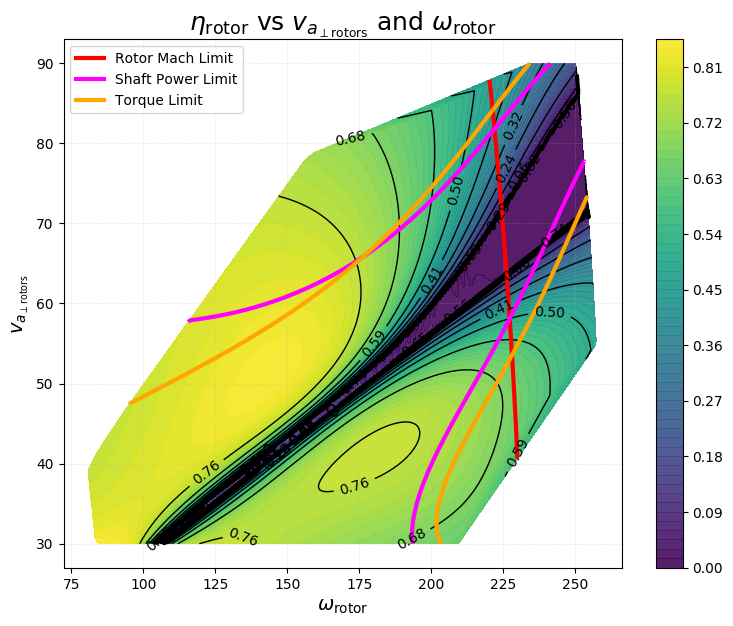

In [ ]:
# f, table = PlotRotor(
#     override_config['shaft_power_from_drag_power'],
#     x='power_shaft', zs=['thrust'], levels=4,
#     only_valids=False, torque_shaft_max=1000.)
f, table = PlotRotor(
    override_config['shaft_power_from_drag_power'],
    zs=['eta_rotors'], levels=20,
    power_shaft_max=1200000., torque_shaft_max=850.,
    colormap='viridis', only_valids=False, no_duplicate_powers=False)
# f.set_figheight(6)
ax = f.gca()
ax.grid(linewidth=0.5, linestyle=':', alpha=0.5)
f.suptitle('')
ax.set_title(r'$\eta_\mathrm{rotor}$ vs $v_{a_{\perp\mathrm{rotors}}}$ and $\omega_\mathrm{rotor}$', size=18)
ax.set_ylabel('$v_{a_{\perp\mathrm{rotors}}}$', size=14)
ax.set_xlabel('$\omega_\mathrm{rotor}$', size=14)

handles = [lines.Line2D([0], [0], color='red', lw=3),
           lines.Line2D([0], [0], color='magenta', lw=3),
           lines.Line2D([0], [0], color='orange', lw=3)]

plt.legend(handles, ('Rotor Mach Limit', 'Shaft Power Limit', 'Torque Limit'),
           loc=2)
# ax.set_yscale()
# f.gca().plot()

In [ ]:
def HoverMass(P_hover, eta_power, rho, k_rf, k_twr, g, A_rotors):
  return (
      np.power(2. * np.power(P_hover * k_rf * eta_power, 2.) * rho * k_rf * A_rotors, 1./3.)
       / (k_twr * g))

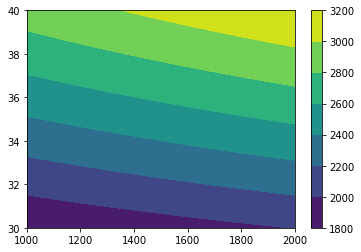

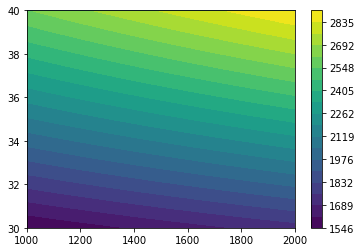

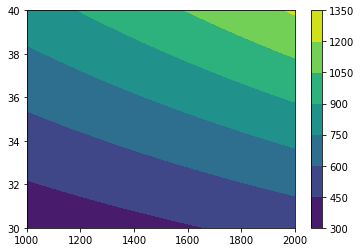

In [ ]:
p_hovers = np.linspace(1e6, 2e6, 20)
A_rotors = np.linspace(30., 40., 20)
eta_rotors = 0.64
rho_min = 0.95
k_rf = 0.75
k_twr = 1.2
g = 9.81

baseline_Qprop = (2.3**5*1200000.**2)**(1./3.)

grid = np.meshgrid(p_hovers, A_rotors)
masses = np.zeros((len(p_hovers), len(A_rotors)))
kite_masses = np.zeros((len(p_hovers), len(A_rotors)))
powertrain_masses = np.zeros((len(p_hovers), len(A_rotors)))

for idx, p_hover in enumerate(p_hovers):
  for idy, a_rotors in enumerate(A_rotors):
    masses[idx][idy] = HoverMass(p_hover, eta_rotors, rho_min, k_rf, k_twr, g, a_rotors)
    D_rotor = math.sqrt(4.*a_rotors/8./math.pi)
    powertrain_masses[idx][idy] = 375. * ((D_rotor**5 * p_hover**2)**(1./3.)/baseline_Qprop)**2 + p_hover * 0.000104
    kite_masses[idx][idy] = masses[idx][idy] - motor_masses[idx][idy] - 275.

plt.contourf(p_hovers/1000., A_rotors, masses)
plt.colorbar()

plt.figure()
plt.contourf(p_hovers/1000., A_rotors, kite_masses, levels=np.linspace(np.min(kite_masses), np.max(kite_masses), 20))
plt.colorbar()
plt.plot(p_hovers/1000., A_rotors[np.argmax(kite_masses, axis=0)])

plt.figure()
plt.contourf(p_hovers/1000., A_rotors, powertrain_masses)
plt.colorbar()

In [ ]:
(2.3**5 * 1200000**2)**(1./3.)/baseline_Qprop

0.9579872339436735

In [ ]:
print os.getcwd()
with open('Code/makani/database/m600/rotor_rev4.json', 'r') as f:
  rotor_db = json.load(f)

def find_nearest_arg(array, value):
  array = np.asarray(array)
  idx = (np.abs(array - value)).argmin()
  return idx


/Users/ntucker/Documents


0.8546822221637118


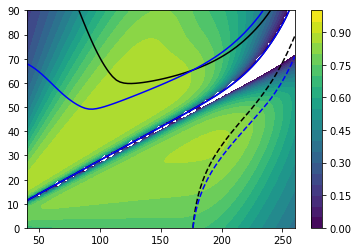

In [ ]:
rho = 1.225

for k, v in rotor_db.iteritems():
  rotor_db[k] = np.array(v)

rotor_db['area'] = math.pi * (rotor_db['diameter']/2.)**2
rotor_db['power_perfect'] = -(
    0.5 * rotor_db['thrust'] * rotor_db['v_freestreams']
    * (np.sqrt(2. * rotor_db['thrust']/(rotor_db['area'] * rho * rotor_db['v_freestreams']**2) + 1.)
       + 1.))
rotor_db['eta'] = np.zeros(rotor_db['power'].shape)
p_mask = np.where(rotor_db['power'] >= 0.)
rotor_db['eta'][p_mask] = rotor_db['power'][p_mask] / rotor_db['power_perfect'][p_mask]
p_mask = np.where(rotor_db['power'] < 0.)
rotor_db['eta'][p_mask] = rotor_db['power_perfect'][p_mask] / rotor_db['power'][p_mask]
rotor_db['torque'] = rotor_db['power']/rotor_db['omegas'][:, None]

plot_key = 'eta'
num_levels = 21
levels = np.linspace(0., 1., num_levels) if plot_key == 'eta' else np.linspace(np.min(rotor_db[plot_key]), np.max(rotor_db[plot_key]), num_levels)

plt.figure()
plt.contourf(rotor_db[u'omegas'], rotor_db['v_freestreams'], rotor_db[plot_key].T, levels=levels)
plt.colorbar()
plt.contour(rotor_db[u'omegas'], rotor_db['v_freestreams'], rotor_db['power'].T,
            levels=[-150000., 0., 150000.], colors='k')
plt.contour(rotor_db[u'omegas'], rotor_db['v_freestreams'], rotor_db['torque'].T,
            levels=[-850., 0., 850.], colors='b')

print rotor_db['eta'].T[find_nearest_arg(rotor_db['v_freestreams'], 30.)][find_nearest_arg(rotor_db['power'].T[0], -150000.)]


In [ ]:
print (2.*(900000*0.71)**2 * 0.95 * 0.75 * 33.)**(1./3.)/(1.25 * 9.81) - 275.
print ((1905.+275.) * 9.81 * 30. * 1.1 * math.cos(0.45))/0.85 + 110000.
print 0.85 * 900000./(30. * math.cos(0.45) * 9.81)
print 0.5*1.225*0.055*54.*30.**3
print 0.5*1.225*0.123*54.*30.**3

1908.72436503
857616.228434
2886.7752169
49116.375
109842.075


0.4205343352839651 0.9822022682648156
0.4205343352839651 1.1637100519335501
0.4205343352839651 1.327993458584072


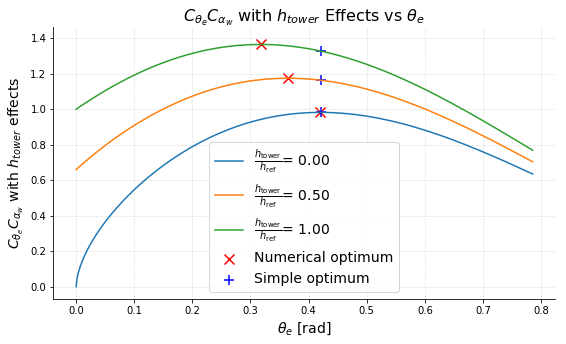

In [ ]:
#@title Theta and H_tower investigation
thetas = np.linspace(0., np.pi/4., 500)
h_ref = 80.
h_ts = np.linspace(0., 80., 3)
shear = 0.2
# ele_factor = np.cos(thetas)**3 * ((430. * np.sin(thetas) + h_ts)/h_ref)**(shear * 3)
l = 300.

plt.figure(figsize=(9,5))
plt.title(r'$C_{\theta_e}C_{\alpha_w}$ with $h_{tower}$ Effects vs $\theta_e$', size=16)
plt.xlabel(r'$\theta_e$ [rad]', size=14)
plt.ylabel(r'$C_{\theta_e}C_{\alpha_w}$ with $h_{tower}$ effects', size=14)
  
best_fs = []
best_thetas = []
all_fs = []
for h_t in h_ts:
  ele_factor = np.cos(thetas)**3 * ((l * np.sin(thetas) + h_t)/h_ref)**(shear * 3)
  all_fs.append(ele_factor)
  plt.plot(thetas, ele_factor, label=r'$\frac{h_\mathrm{tower}}{h_\mathrm{ref}}$'+'= %0.2f'%(h_t/h_ref))
  best_fs.append(max(ele_factor))
  best_thetas.append(thetas[np.argmax(ele_factor)])
for ii in range(len(h_ts)):
  label = 'Numerical optimum' if ii == 0 else None
  plt.scatter(best_thetas[ii], best_fs[ii], color='r', marker='x', label=label, s=100)
best_theta_simple = np.arctan(np.sqrt(shear))
for ii, h_t in enumerate(h_ts):
  label = 'Simple optimum' if ii == 0 else None
  print best_theta_simple, np.interp(best_theta_simple, thetas, all_fs[ii])
  plt.scatter([best_theta_simple],
              [np.interp(best_theta_simple, thetas, all_fs[ii])],
              label=label, color='b', marker='+', s=100)
a = shear
# best_thetas_a = 2*np.arctan(
#     -np.sqrt(-4 + (h_ts + np.sqrt(4*a**2*l**2 + 4*a*l**2 + h_ts**2))**2/(a**2*l**2))/2
#     + h_ts/(2*a*l)
#     + np.sqrt(4*a**2*l**2 + 4*a*l**2 + h_ts**2)/(2*a*l))
# plt.plot(best_thetas_a, best_fs)
plt.grid(linestyle=':', linewidth=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(fontsize=14)
# print 'best numerical: ', np.round(best_thetas, 3)
# print 'best analytical:', np.round(best_thetas_a, 3)
# best_thetas_a2 = np.arctan(np.sqrt(a - h_ts/ (a *l)))
# print np.rad2deg(best_thetas_a[-1]) - np.rad2deg(best_thetas_a[0])
# print np.cos(best_thetas_a[0])**3 * ((l * np.sin(best_thetas_a[0]) + h_t)/h_ref)**(shear * 3)
# print (
#     (np.cos(best_thetas_a[-1])**3 * ((l * np.sin(best_thetas_a[-1]) + h_t)/h_ref)**(shear * 3))
#     / (np.cos(best_thetas_a[0])**3 * ((l * np.sin(best_thetas_a[0]) + h_t)/h_ref)**(shear * 3)))


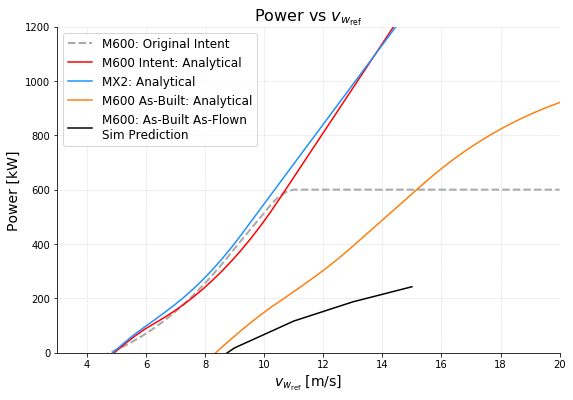

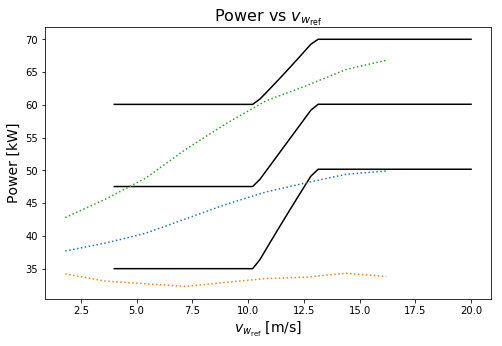

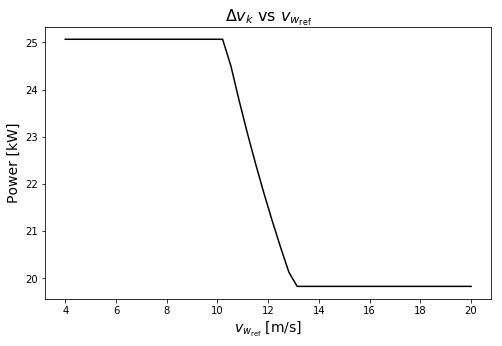

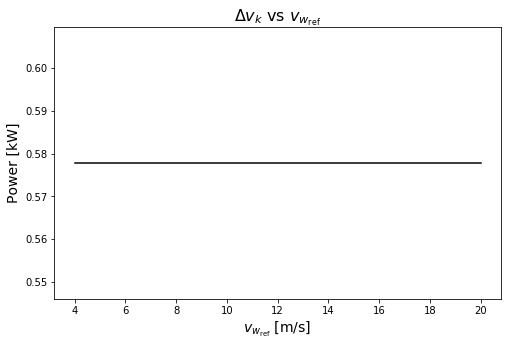

In [ ]:
#@title M600 Comparison
#@markdown 90m radius, no shear, fixed k_grav
alpha, beta = 0., 0.
r_loop = 90.
k_grav = 0.7
rho = 1.225
h_ref = 80.
shear = 0.
g = 9.81
eta_t2g = 0.66
v_w_refs = np.linspace(4., 20., 50)
temp_kite = copy.deepcopy(simple_config)
MX2_result = P(temp_kite, alpha, beta, r_loop, h_ref, shear, rho, g, v_w_refs, eta_t2g, k_grav)
m600_intent_result = P(m600_intent, 5., 0., 75., 80., shear, rho, g, v_w_refs, eta_t2g, 0.7)

rho = 1.075
m600_test_result = P(m600, 5., 0., 145., 80., shear, rho, g, v_w_refs, eta_t2g, 0.5)
m600_test_result2 = P(m600, 5., 0., 145., 80., shear, rho, g, v_w_refs, eta_t2g, 0.5, v_a_max=70.)

plt.figure(figsize=(9,6))
plt.title('Power vs $v_{w_\mathrm{ref}}$', size=16)
plt.xlabel('$v_{w_\mathrm{ref}}$ [m/s]', size=14)
plt.ylabel('Power [kW]', size=14)
plt.plot([4.5, 4.75, 5, 5.25, 5.5, 5.75, 6, 6.25, 6.5, 6.75, 7, 7.25, 7.5, 7.75, 8, 8.25, 8.5, 8.75, 9, 9.25, 9.5, 9.75, 10, 10.25, 10.5, 10.75, 11, 11.25, 11.5, 11.75, 12, 12.25, 12.5, 12.75, 13, 13.25, 13.5, 13.75, 14, 14.25, 14.5, 14.75, 20],
         [-12.181, -1.1115, 10.813, 23.9778, 38.3322, 53.9528, 70.8541, 89.0468, 108.5894, 129.5329, 151.9083, 175.7534, 201.0859, 227.928, 256.2802, 286.2086, 317.5053, 350.2011, 383.5133, 416.5715, 449.4908, 482.288, 514.3971, 548.114, 575.0075, 591.9277, 600., 600., 600., 600., 600., 600., 600., 600., 600., 600., 600., 600., 600., 600., 600., 600., 600.],
         label='M600: Original Intent', linestyle='--', color='darkgray', linewidth=2)
plt.plot(
    v_w_refs,
    (m600_intent_result['p']/1000.),
    label='M600 Intent: Analytical',
    color='r')
plt.plot(
    v_w_refs,
    (MX2_result['p']/1000.),
    label='MX2: Analytical',
    color='dodgerblue')
# plt.plot(
#     v_w_refs,
#     (m600_test_result['p']/1000.),
#     label='$P_\mathrm{AWT}$',
#     color='g')
plt.plot(
    v_w_refs,
    (m600_test_result2['p']/1000.),
    label='M600 As-Built: Analytical',
    color='tab:orange')

# plt.plot([4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0],
#          [-98.0, -23.0, 68.0, 164.0, 271.0, 394.0, 511.0, 628.0, 726.0, 829.0, 904.0, 962.0, 987.0, 999.0, 1003.0, 1004.0, 1005.0, 1006.0],
#          label='Numerical', color='green', linestyle='--', linewidth=3, alpha=0.5)

plt.plot([3, 5, 7, 9, 11, 13, 15],
         [-299.6811449, -223.8670547, -127.3775014, 18.01140935, 116.5224721, 187.1638056, 242.7529493],
         label='M600: As-Built As-Flown\nSim Prediction', color='k')
# plt.plot([1.8, 3.6, 5.4, 7.2, 9, 10.8, 12.6, 14.4],
#          [-384.094, -327.526, -249.855, -137.095, -15.223, 83.221, 137.777, 149.396],
#          label='FBL Flight Test')
plt.ylim((0.,1200))
plt.xlim((3., 20))
plt.legend(fontsize=12)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(linewidth=0.5, linestyle=':')

plt.figure(figsize=(8,5))
plt.title('Power vs $v_{w_\mathrm{ref}}$', size=16)
plt.xlabel('$v_{w_\mathrm{ref}}$ [m/s]', size=14)
plt.ylabel('Power [kW]', size=14)
plt.plot(v_w_refs, m600_test_result2['v_k_bar'],
         label='$P_0$', color='k')
plt.plot(v_w_refs, m600_test_result2['v_k_bar']+0.5*m600_test_result2['Dv_k'],
         label='$P_0$', color='k')
plt.plot(v_w_refs, m600_test_result2['v_k_bar']-0.5*m600_test_result2['Dv_k'],
         label='$P_0$', color='k')
plt.plot([1.8, 3.6, 5.4, 7.2, 9.0, 10.8, 12.6, 14.4, 16.2], [37.7, 38.9, 40.4, 42.6, 44.8, 46.7, 48.1, 49.4, 49.9],':')
plt.plot([1.8, 3.6, 5.4, 7.2, 9.0, 10.8, 12.6, 14.4, 16.2], [34.2, 33.1, 32.7, 32.3, 32.9, 33.5, 33.7, 34.3, 33.8],':')
plt.plot([1.8, 3.6, 5.4, 7.2, 9.0, 10.8, 12.6, 14.4, 16.2], [42.8, 45.6, 48.8, 53.2, 57.1, 60.6, 62.9, 65.4, 66.8],':')

plt.figure(figsize=(8,5))
plt.title('$\Delta v_k$ vs $v_{w_\mathrm{ref}}$', size=16)
plt.xlabel('$v_{w_\mathrm{ref}}$ [m/s]', size=14)
plt.ylabel('Power [kW]', size=14)
plt.plot(v_w_refs, m600_test_result2['Dv_k'],
         label='$P_0$', color='k')

plt.figure(figsize=(8,5))
plt.title('$\Delta v_k$ vs $v_{w_\mathrm{ref}}$', size=16)
plt.xlabel('$v_{w_\mathrm{ref}}$ [m/s]', size=14)
plt.ylabel('Power [kW]', size=14)
plt.plot(v_w_refs, m600_test_result2['theta_e'],
         label='$P_0$', color='k')



In [ ]:
m600['gs_position']

[0.0, 0.0, 6.122]

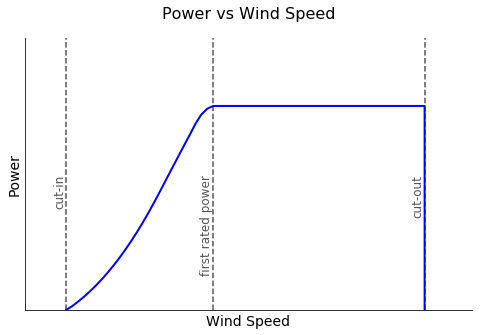

In [ ]:
#@title Notional Power Curve
plt.figure(figsize=(8,5))
plt.title('Power vs Wind Speed', size=16, y=1.05)
plt.xlabel('Wind Speed', size=14)
plt.ylabel('Power', size=14)
plt.plot((4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.0, 7.25, 7.5, 7.75, 8.0, 8.25, 8.5, 8.75, 9.0, 9.25, 9.5, 9.75, 10.0, 10.25, 10.5, 10.75, 11.0, 20.0, 20.0),
         (0.0, 10.81, 23.98, 38.33, 53.95, 70.85, 89.05, 108.59, 129.53, 151.91, 175.75, 201.09, 227.93, 256.28, 286.21, 317.51, 350.2, 383.51, 416.57, 449.49, 482.29, 514.4, 548.11, 575.01, 591.93, 600.0, 600.0, 0.0),
         color='b', linewidth=2.)#, label='Notional Power Curve',)
plt.ylim((0.,800))
plt.xlim((3., 22))
plt.vlines(4.75, 0, 800, linestyle='--', color='#555555')
plt.text(4.75, 400, 'cut-in',rotation=90, horizontalalignment='right', verticalalignment='top', size=12, color='#555555')
plt.vlines(11, 0, 800, linestyle='--', color='#555555')
plt.text(11, 400, 'first rated power',rotation=90, horizontalalignment='right', verticalalignment='top', size=12, color='#555555')
plt.vlines(20, 0, 800, linestyle='--', color='#555555')
plt.text(20, 400, 'cut-out',rotation=90, horizontalalignment='right', verticalalignment='top', size=12, color='#555555')

# plt.legend(fontsize=12, bbox_to_anchor=(1.02, 1))
ax = plt.gca()
ax.axes.get_xaxis().set_ticks([])
ax.axes.get_yaxis().set_ticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


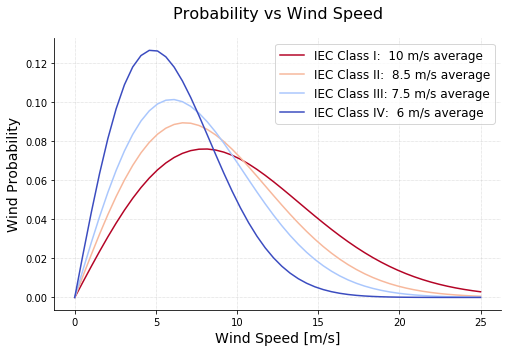

In [ ]:
wind_avgs = np.array([6., 7.5, 8.5, 10.])
wind_range = np.linspace(0., 25., 50)

legend_text = {
    6.: 'IEC Class IV:  6 m/s average',
    7.5:'IEC Class III: 7.5 m/s average',
    8.5:'IEC Class II:  8.5 m/s average',
    10.:'IEC Class I:  10 m/s average'
}

plt.figure(figsize=(8,5))
plt.title('Probability vs Wind Speed', size=16, y=1.05)
plt.xlabel('Wind Speed [m/s]', size=14)
plt.ylabel('Wind Probability', size=14)
for ii, avg in enumerate(wind_avgs[::-1]):
  color=cm.coolwarm_r(norm_idx(ii, len(wind_avgs)))
  wind_pdf = math.pi * wind_range / (2. * avg**2) * math.e**(-(math.pi * wind_range**2)/(4.*avg**2))
  plt.plot(wind_range, wind_pdf, color=color, label=legend_text[avg])
plt.legend(fontsize=12)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(linewidth=0.5, linestyle=':')
# wind_=(PI()*$A3)/(2*B$2^2)*EXP(-(PI()*$A3^2)/(4*B$2^2))

# System Scale

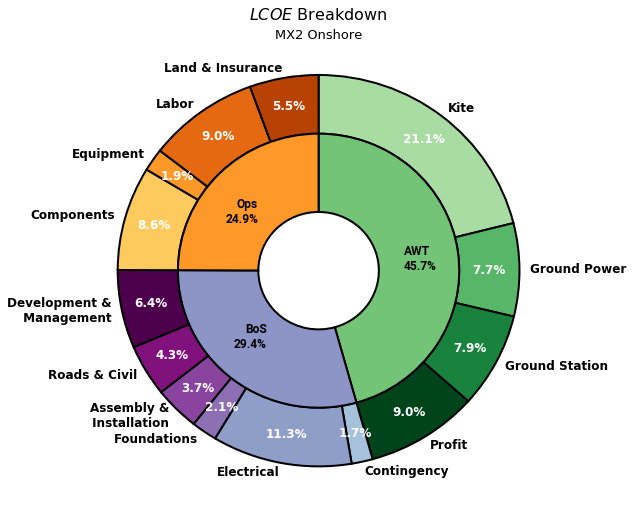

In [ ]:
sys_keys = ['Kite','Ground Power','Ground Station','Profit']
ops_keys = ['Components','Equipment','Labor','Land & Insurance']
bos_keys = ['Contingency','Electrical','Foundations','Assembly &\n Installation','Roads & Civil','Development &\n Management']

pie_order = sys_keys + bos_keys + ops_keys
overall_pi_order = ['AWT', 'BoS', 'Ops']

lcoe_data = {
    'Contingency':	0.0170079350747511,
    'Electrical':	0.112535964305743,
    'Foundations':	0.0206849789552311,
    'Assembly &\n Installation':	0.0365786202191901,
    'Roads & Civil':	0.0426537202216458,
    'Development &\n Management':	0.064480459962748,
    'Kite':	0.210899219975984,
    'Ground Power':	0.0767886779569235,
    'Ground Station':	0.0785599213865685,
    'Profit':	0.0903734129853453,
    'Components':	0.0858309809370708,
    'Equipment':	0.0186878825614297,
    'Labor':	0.0895081998423345,
    'Land & Insurance':	0.0554100256150348,}

overall = {'AWT': sum([onshore_lcoe_data[k] for k in sys_keys]),
           'BoS': sum([onshore_lcoe_data[k] for k in bos_keys]),
           'Ops': sum([onshore_lcoe_data[k] for k in ops_keys]),}

pie_colors = []
for k in pie_order:
  if k in sys_keys:
    pie_colors.append(cm.Greens(
        trim_norm(norm_idx(sys_keys.index(k),len(sys_keys)), 0.35, 1.)))
  if k in ops_keys:
    pie_colors.append(cm.YlOrBr(
        trim_norm(norm_idx(ops_keys.index(k),len(ops_keys)), 0.35, 0.8)))
  if k in bos_keys:
    pie_colors.append(cm.BuPu(
        trim_norm(norm_idx(bos_keys.index(k),len(bos_keys)), 0.35, 1.)))
    
pie_colors_o = [cm.Greens(0.5), cm.BuPu(0.5), cm.YlOrBr(0.5)]

w_props = {'linewidth': 2,
           'ec': 'k',
           'width': 0.3}
t_props = {'fontsize': 12,
           'weight': 'bold',
           'color': 'white'}

plt.figure(figsize=(9,9))
plt.title('$LCOE$ Breakdown', size=16)
plt.text(0, 1.2,'MX2 Onshore', size=13,
         horizontalalignment='center', verticalalignment='center')
wedges, texts, autotexts = plt.pie(
    [onshore_lcoe_data[k] for k in pie_order],
    labels=pie_order, colors=pie_colors, startangle=90.,
    counterclock=False, autopct='%0.1f%%', wedgeprops=w_props,
    pctdistance=0.85, textprops=t_props, labeldistance=1.05)
for t in texts:
  t.set_color('k')
  t.set_fontsize(12)
  # t.set_weight('bold')
  # t.set_fontname('Roboto')

w_props_inner = {'linewidth': 2,
           'ec': 'k',
           'width': 0.4,
           'radius':0.7}
wedges, texts = plt.pie(
    [overall[k] for k in overall_pi_order],
    labels=[l + '\n%0.1f%%'%(overall[l]*100.) for l in overall_pi_order], colors=pie_colors_o, startangle=90.,
    counterclock=False, wedgeprops=w_props_inner, radius=0.7,
    textprops=t_props, labeldistance=0.61)
for t in texts:
  t.set_color('k')
  t.set_fontsize(12)
  t.set_weight('bold')
  t.set_fontname('Roboto')

In [ ]:
def norm_idx(idx, num_id):
  return float(idx)/(num_id - 1.)
def trim_norm(v, clip_l, clip_r):
  return np.interp(v, [0., 1.], [clip_l, clip_r])

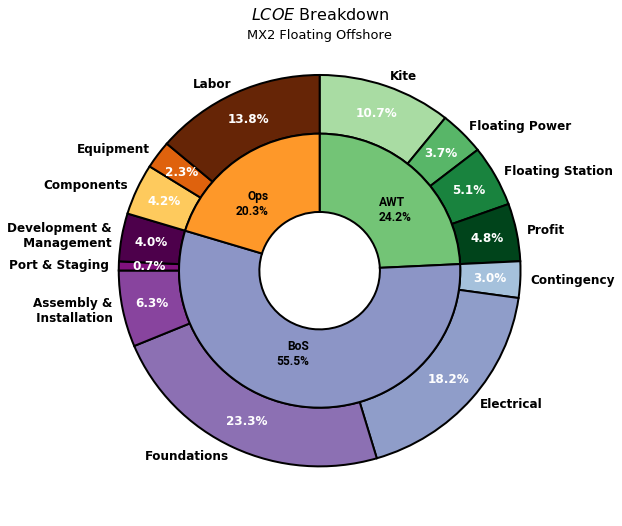

In [ ]:
pie_cats = {'AWT': ['Kite','Floating Power','Floating Station','Profit'],
            'Ops': ['Components','Equipment','Labor'],
            'BoS': ['Contingency','Electrical','Foundations',
                    'Assembly &\n Installation','Port & Staging',
                    'Development &\n Management']}


inner_pie_order = ['AWT', 'BoS', 'Ops']
outer_pie_order = [kk for l in [pie_cats[k] for k in inner_pie_order] for kk in l]

lcoe_data = {
    'Contingency':	0.0300186611127408,
    'Electrical':	0.181738234634111,
    'Foundations':	0.233066679590495,
    'Assembly &\n Installation':	0.0630258080409591,
    'Port & Staging':	0.00746358253118091,
    'Development &\n Management':	0.0395265086561526,
    'Kite':	0.107479756234686,
    'Floating Power':	0.0365643386231507,
    'Floating Station':	0.050648939757097,
    'Profit':	0.0476188898438993,
    'Components':	0.0422781105758178,
    'Equipment':	0.0229819018745415,
    'Labor':	0.137588588525168,}

inner_pie_sums = {}
for k_o, k_is in pie_cats.iteritems():
  inner_pie_sums[k_o] = sum([lcoe_data[k] for k in k_is])

outer_pie_colormaps = {'AWT': cm.Greens,
                       'Ops': cm.YlOrBr,
                       'BoS': cm.BuPu}
outer_pie_colors = []
for k in outer_pie_order:
  kk = [kk for kk in pie_cats.keys() if k in pie_cats[kk]][0]

  pie_colors.append(outer_pie_colormaps[kk](
      trim_norm(norm_idx(pie_cats[kk].index(k),len(pie_cats[kk])), 0.35, 0.9)))
    
pie_colors_inner = [outer_pie_colormaps[k](0.5) for k in inner_pie_order]

w_props = {'linewidth': 2,
           'ec': 'k',
           'width': 0.3}
t_props = {'fontsize': 12,
           'weight': 'bold',
           'color': 'white'}

plt.figure(figsize=(9,9))
plt.title('$LCOE$ Breakdown', size=16)
plt.text(0, 1.2,'MX2 Floating Offshore', size=13,
         horizontalalignment='center', verticalalignment='center')
wedges, texts, autotexts = plt.pie(
    [lcoe_data[k] for k in outer_pie_order],
    labels=outer_pie_order, colors=pie_colors, startangle=90.,
    counterclock=False, autopct='%0.1f%%', wedgeprops=w_props,
    pctdistance=0.85, textprops=t_props, labeldistance=1.05)
for t in texts:
  t.set_color('k')
  t.set_fontsize(12)
  # t.set_weight('bold')
  # t.set_fontname('Roboto')

w_props_inner = {'linewidth': 2,
           'ec': 'k',
           'width': 0.4,
           'radius':0.7}
wedges, texts = plt.pie(
    [inner_pie_sums[k] for k in inner_pie_order],
    labels=[l + '\n%0.1f%%'%(inner_pie_sums[l]*100.) for l in inner_pie_order], colors=pie_colors_inner, startangle=90.,
    counterclock=False, wedgeprops=w_props_inner, radius=0.7,
    textprops=t_props, labeldistance=0.61)
for t in texts:
  t.set_color('k')
  t.set_fontsize(12)
  t.set_weight('bold')
  t.set_fontname('Roboto')

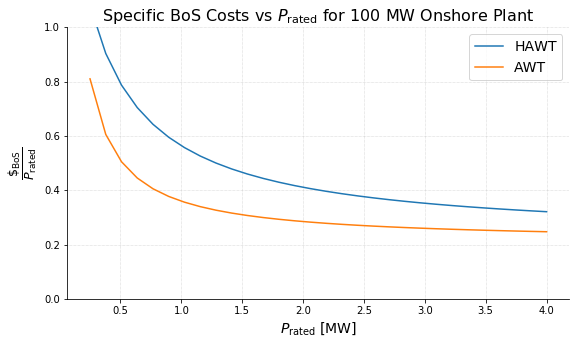

In [ ]:
#@title BoS Plot
specific_bos_x = np.linspace(250., 4000., 30)
specific_bos_hawt = 430./(specific_bos_x+250.) + 0.22
specific_bos_awt = 210./(specific_bos_x*1.4) + 0.21

plt.figure(figsize=(9,5))
plt.title(r'Specific BoS Costs vs $P_\mathrm{rated}$ for 100 MW Onshore Plant', size=16)
plt.xlabel(r'$P_\mathrm{rated}$ [MW]', size=14)
plt.ylabel(r'$\frac{\$_\mathrm{BoS}}{P_\mathrm{rated}}$', size=18)
plt.plot(specific_bos_x/1000., specific_bos_hawt, label='HAWT')
# plt.plot([250., 500., 750., 1000., 2000., 3000., 4000.], [1.15, 0.77, 0.65, 0.56, 0.43, 0.36, 0.31])
# plt.plot([250.,500, 1000, 2000, 4000.], [0.8,0.5,0.36, 0.285, 0.25])
plt.plot(specific_bos_x/1000., specific_bos_awt, label='AWT')
plt.ylim((0,1))
plt.grid(linestyle=':', linewidth=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(fontsize=14)

[ 600000.  800000. 1000000. 1200000. 1400000. 1600000.]


Text(400000,150000,'Specific cost lines to achieve an LCOE\nof \\$40/MWhr @ $k_\\mathrm{fcr}$ = 0.1, $k_\\mathrm{CF}$=0.5')

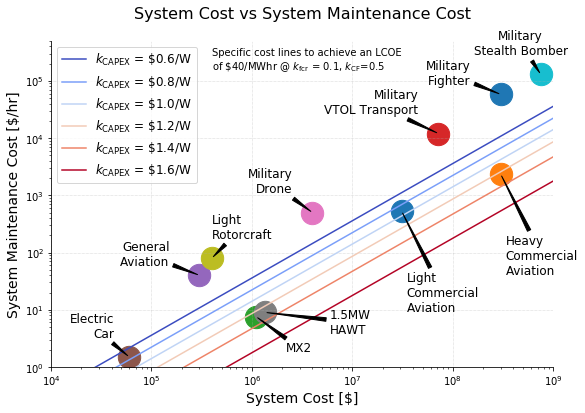

In [ ]:
m_costs = {
    '1.5MW\nHAWT':	(9,1350000, {'xytext': (65,-10), 'va': 'center'}),
    # '1.5MW kite':	(20.4118357142903,750000),
    'Heavy\nCommercial\nAviation':	(2333.33333333333,300000000,
                                    {'xytext': (5,-60),'va':'top'}),
    'Electric\nCar':	(1.5,60000,{'xytext': (-15,20),'ha':'right'}),
    'Light\nCommercial\nAviation':	(524,31000000, {'xytext': (5,-60),'va':'top'}),
    'Military\nDrone':	(500,4000000, {'xytext': (-20,20), 'ha':'right'}),
    'General\nAviation':	(40,300000, {'xytext': (-30,10), 'ha':'right'}),
    'Military\nVTOL Transport':	(12000,72000000, {'xytext': (-20,20), 'ha':'right'}),
    'Light\nRotorcraft':	(80,400000, {'xytext': (0,20)}),
    'Military\nStealth Bomber':	(130000,750000000, {'xytext': (-20,20), 'ha':'center'}),
    'Military\nFighter':	(58000,300000000, {'xytext': (-30,10), 'ha':'right'}),
    'MX2':	(7.6,1100000, {'xytext': (30,-25), 'va': 'top'}),}


c_specifics = np.linspace(600000., 1600000., 6)
# c_specifics = np.append(c_specifics, 1800000.)
lcoe = 40.
k_cf = 0.5
k_fcr = 0.1
t = 365. * 24.
k_level = 0.61
costs = np.linspace(10000., 1e9, 20)

print c_specifics

plt.figure(figsize=(9,6))
plt.title('System Cost vs System Maintenance Cost', size=16, y=1.05)
plt.xlabel('System Cost [$]', size=14)
plt.ylabel('System Maintenance Cost [$/hr]', size=14)
ax = plt.gca()
# ax.loglog()
for k, (maint, cost, anno) in m_costs.iteritems():
  plt.scatter([cost], [maint], s=500)
  ax.annotate(k, xy=(cost, maint),
              textcoords="offset points",
              arrowprops={'arrowstyle':'wedge','color':'k'},
              fontsize=12, **anno)
for ii, c_specific in enumerate(c_specifics):
  maint_cost_hour = (costs / c_specific) / k_level * (lcoe * k_cf - c_specific * k_fcr/t)
  color = cm.coolwarm(float(ii) / (len(c_specifics) - 1.))
  plt.plot(costs, maint_cost_hour,
           label='$k_\mathrm{CAPEX}$ = \$%0.1f/W'%(c_specific/1e6),
           color=color)
plt.grid(linestyle=':', linewidth=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlim((10000,1e9))
plt.ylim((1,5e5))
plt.legend(fontsize=12)
plt.text(4e5,1.5e5,'Specific cost lines to achieve an LCOE\n'+r'of \$40/MWhr @ $k_\mathrm{fcr}$ = 0.1, $k_\mathrm{CF}$=0.5')



In [ ]:
c_specific = 875000.
maint_cost_hour = 750000. / c_specific / k_level * (lcoe * k_cf - c_specific * k_fcr/t)
print maint_cost_hour

14.0675627988


In [ ]:
print loop_angles

[0.         0.12822827 0.25645654 0.38468481 0.51291309 0.64114136
 0.76936963 0.8975979  1.02582617 1.15405444 1.28228272 1.41051099
 1.53873926 1.66696753 1.7951958  1.92342407 2.05165235 2.17988062
 2.30810889 2.43633716 2.56456543 2.6927937  2.82102197 2.94925025
 3.07747852 3.20570679 3.33393506 3.46216333 3.5903916  3.71861988
 3.84684815 3.97507642 4.10330469 4.23153296 4.35976123 4.48798951
 4.61621778 4.74444605 4.87267432 5.00090259 5.12913086 5.25735913
 5.38558741 5.51381568 5.64204395 5.77027222 5.89850049 6.02672876
 6.15495704 6.28318531]


-1.2929574494148521 -1.23738790514494
-1.2608407609217642 -1.2131708650087851
-1.2288834172027125 -1.188600499120923
-1.1974046050347615 -1.1637010557321825
-1.1659257928668114 -1.138497107856721
-1.1353564036765256 -1.113013529021158
-1.1049630677902285 -1.087275468717139
-1.0749936167865475 -1.061308327581552
-1.0451430190410766 -1.035137732328889
-1.0159462540260666 -1.0087895104604954
-0.9871811325622497 -0.9822896647756656
-0.9586872540745889 -0.9556643477097371
-0.9304648707515987 -0.9289398355245115
-0.9026411024738543 -0.9021425023764705
-0.8755041954325177 -0.8752987942883845
-0.8485029729263873 -0.8484352030499918
-0.8219088040258775 -0.8215782400735154
-0.7954587582209484 -0.7947544102298123
-0.7699500656020917 -0.7679901856909785
-0.7444414990774928 -0.7413119798052251
-0.7194755445994628 -0.7147461210298062
-0.6945095901214331 -0.6883188269477245
-0.6705180173354233 -0.6620561783938592
-0.6466375391390471 -0.6359840937160477
-0.6231472832712949 -0.6101283031965249
-0.59980

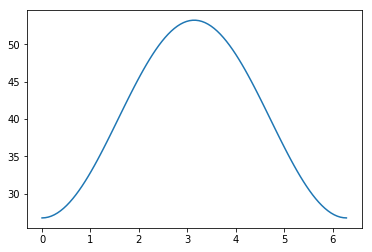

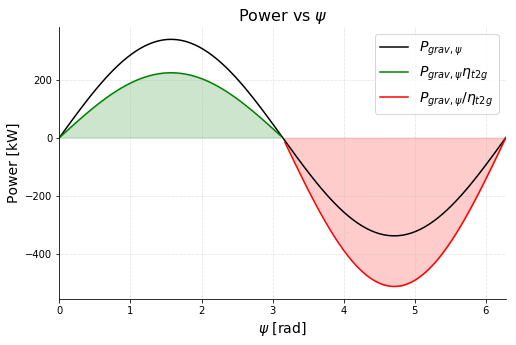

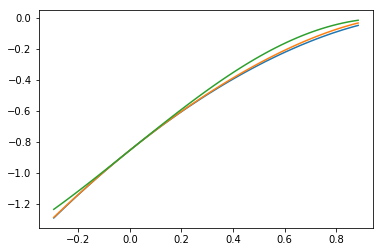

In [ ]:
loop_angles = np.linspace(0., math.pi*2., 100)
p_thrusts = np.linspace(-100000., 300000., 60)
v_kbar = 40.
theta = 0.45
m = 1850. + 0.25 * 275.
k_grav = 0.5
d_vk = DeltaVk(120., 9.81, k_grav, theta, v_kbar)
v_ks = Vk_from_Psi(v_kbar, d_vk, loop_angles)
p_pumps = m * 9.81 * (1. - k_grav) * v_ks * np.sin(loop_angles) * np.cos(theta)
p_pump_max = m * 9.81 * (1. - k_grav) * v_kbar * np.cos(theta)
eta_t2g = 0.66

plt.figure()
plt.plot(loop_angles, v_ks)

o = {'ratios_n': [],
     'ratios_a': [],
     'ratios_ns': []}

zero_p = p_pumps
zero_p_simple = p_pump_max * np.sin(loop_angles)
zero_p_eta = np.where(zero_p >=0., eta_t2g * zero_p, zero_p / eta_t2g)
zero_p_eta_simple = np.where(zero_p_simple >=0., eta_t2g * zero_p_simple, zero_p_simple / eta_t2g)


for p_thrust in p_thrusts:
  
  offset_p = zero_p + p_thrust
  offset_p_simple = zero_p_simple + p_thrust
  offset_p_eta = np.where(offset_p >= 0., eta_t2g * offset_p, offset_p / eta_t2g)
  offset_p_eta_simple = np.where(offset_p_simple >= 0., eta_t2g * offset_p_simple, offset_p_simple / eta_t2g)
  # map(lambda x: eta_t2g * x if x>0. else x/eta_t2g, offset_p)

  no_p_offset_eta = np.broadcast_to(p_thrust * eta_t2g, offset_p.shape)
  no_p_offset_eta_simple = np.broadcast_to(p_thrust * eta_t2g, offset_p_simple.shape)

  e_potential = scipy.integrate.trapz(np.abs(zero_p)/2., loop_angles)
  e_actual = scipy.integrate.trapz(zero_p_eta, loop_angles)

  e_pot_simple = scipy.integrate.trapz(np.abs(zero_p_simple)/2., loop_angles)
  e_actual_simple = scipy.integrate.trapz(zero_p_eta_simple, loop_angles)
  # print e_actual / e_potential

  e_actual_offset = scipy.integrate.trapz(offset_p_eta, loop_angles)
  e_no_p_offset_actual = scipy.integrate.trapz(no_p_offset_eta, loop_angles)

  e_actual_offset_simple = scipy.integrate.trapz(offset_p_eta_simple, loop_angles)
  e_no_p_offset_actual_simple = scipy.integrate.trapz(no_p_offset_eta_simple, loop_angles)
  o['ratios_n'].append((e_actual_offset - e_no_p_offset_actual)/e_potential)
  o['ratios_ns'].append((e_actual_offset_simple - e_no_p_offset_actual_simple)/e_pot_simple)

  eta_pump = (eta_t2g - 1./eta_t2g) * (1. - np.sin(math.pi/2.*p_thrust/p_pump_max))
  # eta_pump = (eta_t2g - 1./eta_t2g) * (1. - (p_thrust/p_pump))
  # eta_pump = (eta_t2g - 1./eta_t2g) * (1. - (p_thrust/p_pump))
  o['ratios_a'].append(np.minimum(eta_pump, 0.))

  print (e_actual_offset - e_no_p_offset_actual)/e_potential, np.minimum(eta_pump, 0.)


plt.figure(figsize=(8,5))
plt.title(r'Power vs $\psi$', size=16)
plt.xlabel(r'$\psi$ [rad]', size=14)
plt.ylabel(r'Power [kW]', size=14)
# plt.plot(loop_angles, zero_p)
shade_idx = len(loop_angles)/2
plt.plot(loop_angles, zero_p_simple/1000., label=r'$P_\mathit{grav,\psi}$', c='k')
plt.plot(loop_angles[:shade_idx], zero_p_eta_simple[:shade_idx]/1000., label=r'$P_\mathit{grav,\psi} \eta_{t2g}$', c='g')
plt.plot(loop_angles[shade_idx:], zero_p_eta_simple[shade_idx:]/1000., label=r'$P_\mathit{grav,\psi}/\eta_{t2g}$', c='r')

plt.fill_between(loop_angles[:shade_idx], zero_p_eta_simple[:shade_idx]/1000., alpha=0.2, color='g')
plt.fill_between(loop_angles[shade_idx:], zero_p_eta_simple[shade_idx:]/1000., alpha=0.2, color='r')
plt.xlim((0,2*math.pi))
plt.grid(linestyle=':', linewidth=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(fontsize=14)

# plt.figure(figsize=(8,5))
# plt.title(r'Power vs $\psi$', size=16)
# plt.xlabel(r'$\psi$ [rad]', size=14)
# plt.ylabel(r'Power [kW]', size=14)
# # plt.plot(loop_angles, zero_p)
# plt.plot(loop_angles, offset_p_simple/1000., label=r'$P_\mathrm{pump}$')
# plt.plot(loop_angles, offset_p_eta_simple/1000., label=r'$P_\mathrm{pump} \eta$')
# shade_idxs = loop_angles >
# plt.fill_between(loop_angles[:shade_idx], offset_p_eta_simple[:shade_idx]/1000., alpha=0.2, color='g')
# plt.fill_between(loop_angles[shade_idx:], offset_p_eta_simple[shade_idx:]/1000., alpha=0.2, color='r')
# plt.xlim((0,2*math.pi))
# plt.grid(linestyle=':', linewidth=0.5)
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
# plt.legend(fontsize=14)

plt.figure()
plt.plot(p_thrusts/p_pump_max, o['ratios_n'])
plt.plot(p_thrusts/p_pump_max, o['ratios_ns'])
plt.plot(p_thrusts/p_pump_max, o['ratios_a'])

print max(np.array(o['ratios_ns']) - np.array(o['ratios_n']))


13.555592543780929
13.55559254378093
12.5663706144
1.0787197799411874


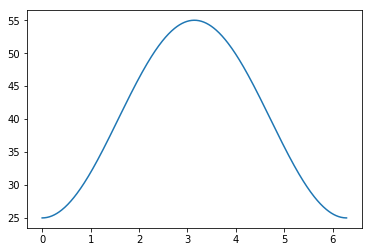

In [ ]:
r_loop = 80.
d_vk = 30.
v_km = 40.
loop_angles = np.linspace(0., math.pi*2., 500)
d_d = (loop_angles[1] - loop_angles[0])*r_loop

v_ks = Vk_from_Psi(v_km, d_vk, loop_angles)
plt.plot(loop_angles, v_ks)

t = scipy.integrate.trapz(r_loop/v_ks, loop_angles)
print t

t2 = 2.* math.pi * r_loop / (np.sqrt(1. - (0.5*d_vk/v_km)**2) * v_km)
print t2
print 2.* math.pi * r_loop / v_km
print t2 / (2.* math.pi * r_loop / v_km)